# Analyse exploratoire des données du cabinet d'expertise comptable

## Import des librairies et lecture des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Data/dataset-ML.csv")

## Premier aperçu de la donnée

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35583 entries, 0 to 35582
Columns: 197 entries, code_mission to snc
dtypes: float64(4), int64(184), object(9)
memory usage: 53.5+ MB


In [10]:
df.columns[166:]

Index(['ass', 'coop', 'divers', 'earl', 'eirl', 'eurl', 'gaec', 'gfa', 'gfo',
       'gfr', 'gie', 'ind', 'indiv', 'particulier', 'sa', 'sadir', 'sarl',
       'sas', 'sasu', 'sc', 'scea', 'scf', 'sci', 'scm', 'scp', 'sdf',
       'selarl', 'selas', 'sem', 'sep', 'snc'],
      dtype='object')

0        Fabrication de charpentes et d'autres menuiseries
1                                 Activités d'architecture
2                           Activités des sociétés holding
3                Enregistrement sonore et édition musicale
4        Travaux de terrassement courants et travaux pr...
                               ...                        
35578    Travaux de maçonnerie générale et gros œuvre d...
35579             Transports routiers de fret de proximité
35580    Travaux d'installation électrique dans tous lo...
35581               Vente à distance sur catalogue général
35582            Vente à distance sur catalogue spécialisé
Name: secteur, Length: 35583, dtype: object

In [5]:
df.iloc[:,:15]

code_mission type_mission  exercice code_client  total_assistant  \
0      AAGS2017010396900          AGS      2017        5782              2.0   
1      AAGS2017010397000          AGS      2017        6565              1.0   
2      ACOM2017007712400          COM      2017        6635              4.0   
3      ACOM2017007718600          COM      2017        6718              1.0   
4      ACOM2017007719900          COM      2017        6720              3.0   
...                  ...          ...       ...         ...              ...   
35578  ATB 2020013408500           TB      2020        7942              1.0   
35579  ATB 2020013461000           TB      2020       A0863              1.0   
35580  ATB 2020013462900           TB      2020       A2885              1.0   
35581  ATB 2020013967000           TB      2020       A1254              1.0   
35582  ATB 2020014179000           TB      2020        5101              1.0   

      manager                                       code_article  \
0         JOP                                            ['029']   
1         FRL                                            ['001']   
2         GSO  ['010', '012', '001', '016', '011', '019', '013']   
3         DAC                                     ['011', '013']   
4         VAL                ['016', '001', '011', '013', '019']   
...       ...                                                ...   
35578     GSO                                            ['043']   
35579     GSO                                            ['043']   
35580     GSO                                            ['043']   
35581     JOP                                            ['043']   
35582     GSO                                            ['043']   

                                         libelle_article  temps  \
0                               autres travaux en social  43.00   
1                                  renseignements client   1.00   
2      saisie et centralisation, declarations tva, re...  22.75   
3      controle et revision, comptes annuels  et decl...   7.50   
4      autres declarations fiscales, renseignements c...  17.75   
...                                                  ...    ...   
35578                                    tableau de bord   0.75   
35579                                    tableau de bord   0.75   
35580                                    tableau de bord   1.50   
35581                                    tableau de bord   0.00   
35582                                    tableau de bord   2.50   

       valorisation_temps             site  facturation  entrée_clt  \
0                 5231.25       PITHIVIERS       4550.0           0   
1                   68.00             GIEN        750.0           0   
2                 1372.50     VILLEMANDEUR       1430.0           0   
3                  555.00  MEUNG SUR LOIRE        550.0           0   
4                 1168.75           BRIARE       1640.0           0   
...                   ...              ...          ...         ...   
35578              123.75     VILLEMANDEUR        315.0           0   
35579              123.75     VILLEMANDEUR        405.0           0   
35580              247.50     VILLEMANDEUR        650.0           1   
35581                0.00       PITHIVIERS          0.0           0   
35582              412.50     VILLEMANDEUR        200.0           0   

       sortie_clt                                            secteur  
0               1  Fabrication de charpentes et d'autres menuiseries  
1               0                           Activités d'architecture  
2               0                     Activités des sociétés holding  
3               0          Enregistrement sonore et édition musicale  
4               0  Travaux de terrassement courants et travaux pr...  
...           ...                                                ...  
35578           0  Travaux de maçonnerie générale et gros œuvre d...  
35579   

In [35]:
df[df['type_mission'] == "SOP"]

code_mission type_mission  exercice code_client  total_assistant  \
6616   ASOP2017009735100          SOP      2017       A0011              4.0   
6617   ASOP2017010032800          SOP      2017        7293              7.0   
6618   ASOP2017010067400          SOP      2017        7263              1.0   
6619   ASOP2017010073500          SOP      2017        2890              2.0   
6620   ASOP2017010075500          SOP      2017       A0489              3.0   
...                  ...          ...       ...         ...              ...   
35565  ASOP2020013964600          SOP      2020        7182              3.0   
35566  ASOP2020013970300          SOP      2020       A1799              7.0   
35567  ASOP2020013993100          SOP      2020       A3216              3.0   
35568  ASOP2020014032100          SOP      2020       A1925              2.0   
35569  ASOP2020014175600          SOP      2020       A3162              2.0   

      manager                                       code_article  \
6616      FRL  ['029', '030', '020', 'F0200', 'F0205', '021',...   
6617      NAB     ['029', '020', 'F0200', 'F0211', '021', '022']   
6618      NAB                     ['020', 'F0200', '029', '021']   
6619      VAL  ['030', '029', '020', 'F0200', '021', 'F0211',...   
6620      VAL     ['030', '029', 'F0200', '020', '021', 'F0211']   
...       ...                                                ...   
35565     CBA  ['030', '029', 'F0207', 'F0205', '001', 'F0206...   
35566     EMG  ['030', 'F0207', 'F0205', 'F02081', '020', '00...   
35567     VAL  ['030', '020', '021', 'F02081', 'F0207', 'F0205']   
35568     DAC                                  ['F02081', '030']   
35569     DAC    ['F0200', 'F02031', 'F0207', 'F0205', 'F02081']   

                                         libelle_article  temps  \
6616   autres travaux en social, cration  migration s...  70.75   
6617   autres travaux en social, fiche de paie, bulle...  32.90   
6618   fiche de paie, bulletin de paie, autres travau...  19.75   
6619   cration  migration silae, autres travaux en so...  64.25   
6620   cration  migration silae, autres travaux en so...  40.75   
...                                                  ...    ...   
35565  cration  migration silae, autres travaux en so...   8.00   
35566  cration  migration silae, forfait demarrage , ...   9.25   
35567  cration  migration silae, fiche de paie, decla...   8.00   
35568  forfait mensuel   salaries , cration  migratio...   3.50   
35569  bulletin de paie, remontee des bulletins de sa...  20.00   

       valorisation_temps  ... scf  sci  scm  scp sdf selarl  selas  sem  sep  \
6616              2924.25  ...   0    0    0    0   0      0      0    0    0   
6617              1603.85  ...   0    0    0    0   0      0      0    0    0   
6618               819.00  ...   0    0    0    0   0      0      0    0    0   
6619              2672.00  ...   0    0    0    0   0      0      0    0    0   
6620              1766.50  ...   0    0    0    0   0      0      0    0    0   
...                   ...  ...  ..  ...  ...  ...  ..    ...    ...  ...  ...   
35565              644.39  ...   0    0    0    0   0      0      0    0    0   
35566              694.28  ...   0    0    0    0   0      0      0    0    0   
35567              651.26  ...   0    0    0    0   0      0      0    0    0   
35568              197.50  ...   0    0    0    0   0      0      0    0    0   
35569              764.00  ...   0    0    0    0   0      0      0    0    0   

       snc  
6616     0  
6617     0  
6618     0  
6619     0  
6620     0  
...    ...  
35565    0  
35566    0  
35567    0  
35568    0  
35569    0  

[4924 rows x 197 columns]

In [7]:
df.iloc[:,:14].describe()

exercice  total_assistant         temps  valorisation_temps  \
count  35583.000000     35583.000000  35583.000000        35583.000000   
mean    2018.582582         3.544642     45.219825         1656.745699   
std        1.114378         2.079425    570.992930         2666.712615   
min     2017.000000         1.000000      0.000000           -1.500000   
25%     2018.000000         2.000000      3.500000          261.500000   
50%     2019.000000         3.000000     10.000000          736.500000   
75%     2020.000000         5.000000     33.250000         2036.200000   
max     2020.000000        25.000000  36328.500000        91573.750000   

         facturation    entrée_clt    sortie_clt  
count   35583.000000  35583.000000  35583.000000  
mean     1595.180793      0.089874      0.077397  
std      3496.031262      0.286006      0.267223  
min      -600.000000      0.000000      0.000000  
25%       360.000000      0.000000      0.000000  
50%       670.000000      0.000000      0.000000  
75%      1905.000000      0.000000      0.000000  
max    383660.000000      1.000000      1.000000

- La moyenne du nombre d'assistants par mission approche entre 3 et 4 assistants par dossier
- Sans équivoque, le dossier "organisation interne" (code client 9240) correspond aux activités réalisées au nom du cabinet. Cette activité sera non facturable d'où la suppression de ces données.
- Le temps passé moyen est à nuancer car il semble y avoir beaucoup d'outliers, la médiane étant à 10H par dossier alors que la moyenne avoisine les 45H.
- Idem pour la facturation avec une médiane à 670€ HT, nous avons une moyenne à 1595€ HT facturés par client

##  <span style="color:red">* Analyse univariée</span>

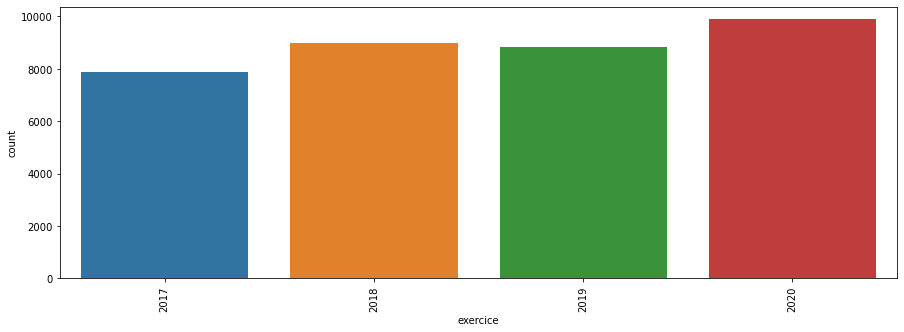

In [8]:
fig=plt.figure(figsize=(15,5))
ax = sns.countplot(x='exercice', data=df)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Il y a eu plus de missions sur les années 2018 et 2020

### Chiffre d'affaires par année

In [9]:
df_ca = df.groupby(['exercice'])['valorisation_temps','facturation'].sum()

<ipython-input-9-576a49433b3b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ca = df.groupby(['exercice'])['valorisation_temps','facturation'].sum()


In [10]:
df_ca.reset_index(inplace=True)

In [11]:
df_ca

exercice  valorisation_temps  facturation
0      2017        1.389338e+07  13513629.41
1      2018        1.366354e+07  13249963.21
2      2019        1.501220e+07  14930998.91
3      2020        1.638287e+07  15066726.63

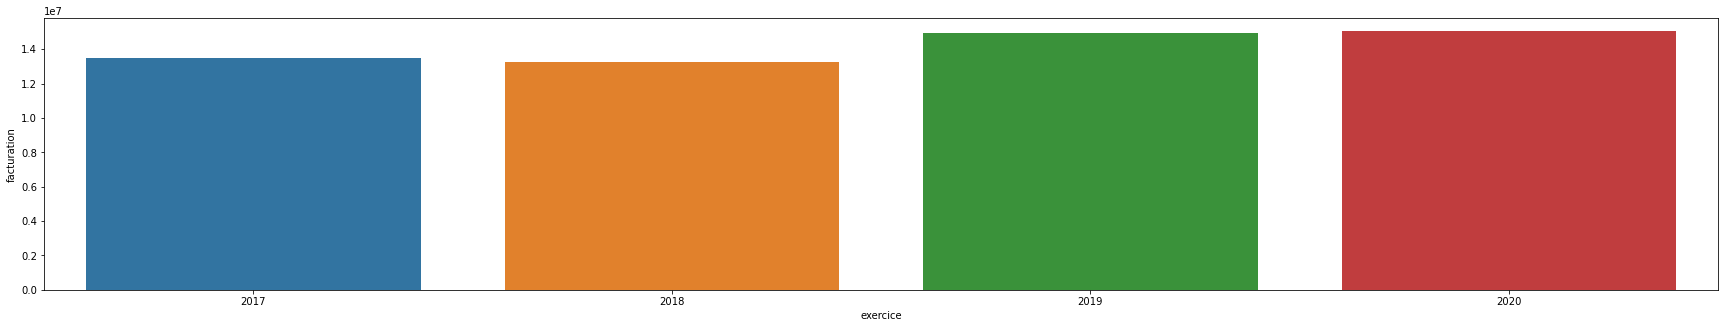

In [12]:
fig=plt.figure(figsize=(30,5))
ax = sns.barplot(x="exercice", y="facturation", data=df_ca)   
plt.show()

### Coût du cabinet sur les missions par année

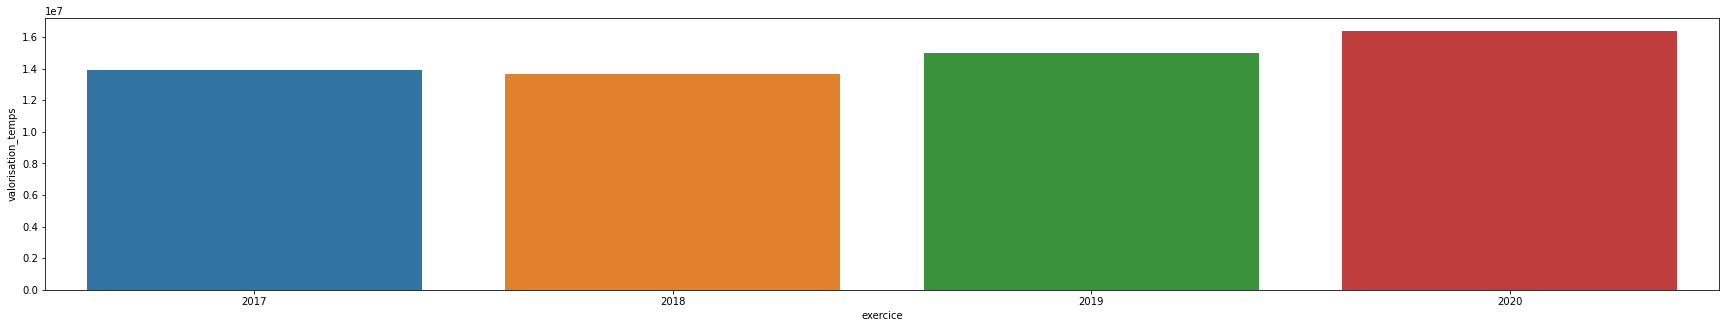

In [13]:
fig=plt.figure(figsize=(30,5))
ax = sns.barplot(x="exercice", y="valorisation_temps", data=df_ca)   
plt.show()

### Clients

In [14]:
df.code_client.value_counts()

77254    29
4794     28
7149     27
7402     26
3295     26
         ..
A2461     1
A2398     1
A0715     1
7121      1
A2651     1
Name: code_client, Length: 6362, dtype: int64

<AxesSubplot:>

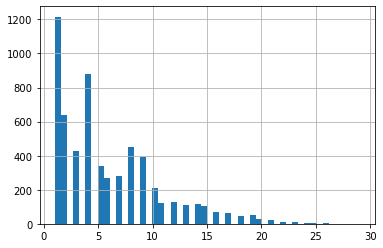

In [15]:
df.code_client.value_counts().head(6000).hist(bins=50)

La plupart des clients n'ont qu'un type de mission (COM ou autre). D'autres cumulent plusieurs type de missions, entre 4 et 5 missions différentes par client.

#### Client 77254 auquel le cabinet a réalisé le plus de missions depuis 2017

<AxesSubplot:>

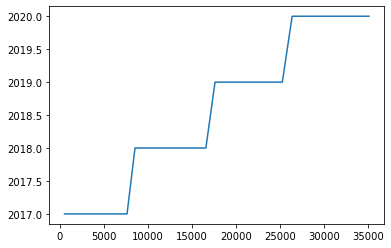

In [16]:
df[df['code_client'] == "77254"].exercice.plot()

<AxesSubplot:>

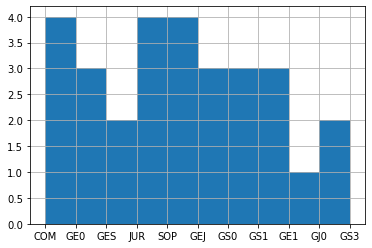

In [17]:
df[df['code_client'] == "77254"].type_mission.hist()

In [18]:
#Beaucoup de missions exceptionnelles (rachat d'une entreprise implique des missions exceptionnelles par exemple)

<AxesSubplot:>

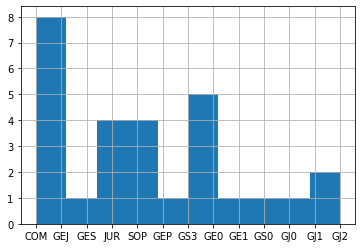

In [19]:
df[df['code_client'] == "4794"].type_mission.hist()

<AxesSubplot:>

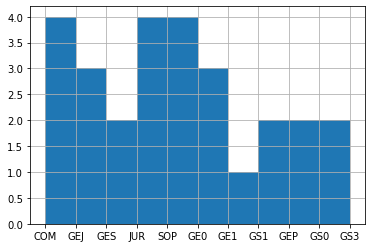

In [20]:
df[df['code_client'] == "7149"].type_mission.hist()

### Assistants

<AxesSubplot:>

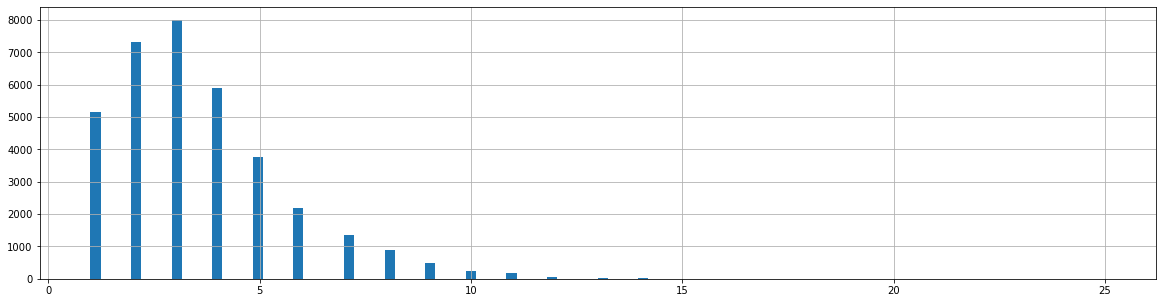

In [21]:
fig=plt.figure(figsize=(20,5))
df.total_assistant.hist(bins=100)

Loi de Pareto sur le nombre d'assistants par dossier/mission. Il y a une majorité de 1 à 4 assistant.s par mission chez un client.

### Missions

1 ligne = 1 code mission

Les types de missions du cabinet :

- Les missions "GE/GJ.." sont des missions exceptionnelles qui ne sont pas prévues dans les lettres de missions "classiques" à la base et qui correspondent à des travaux exceptionnels sans tacite reconduction (exemple : préparer un prévisionnel, faire une situation comptable.). Elles font donc l'objet de facturations exceptionnelles par la suite.

- Les missions classiques : sont préparées pour le client dès le lancement de son activité : 
1 Lettre Mission pour sa mission comptabilité classique "COM"
1 Lettre Mission pour sa mission juridique classique "JUR"
1 Lettre Mission pour sa mission "sociale" (= établissement des paies) classique "SOP"

- AGS : 	Assistance gestion sociale
- CABINET : 	Cabinet  travaux concernant le cabinet = non facturable = ne pas prendre en compte 	
- GE0 : 	Accompagnement / fiscal / IRPP
- GE1 :
- GEC :	missions exceptionnelles CAC
- GEJ :	Gestion juridique
- GEP :	Gestion exceptionnel paie
- GJ0 :	Gestion juridique / Conseil
- GJ1 :	Gestion juridique
- GS0 :	Embauche et vie du contrat
- COM :	Comptable	mission classique avec tacite reconduction du contrat pour les missions de comptable (saisie / déclarations fiscale...)
- CAC :	Commissariat aux comptes	 mission classique avec tacite reconduction du contrat pour les missions de commissariat au compte
- CWE :	Mise à disposition logiciel	mise à disposition de notre logiciel comptable si le client saisi lui même (=location)
- JUR :	Juridique	mission classique avec tacite reconduction du contrat pour les missions juridique (PV assemblée annuelle)
- POL :	Paie autonomie assistée	mission classique avec tacite reconduction du contrat pour les missions de paie (si le client utilise lui même le logiciel) 
- SAP :	Déclarations de revenus	mission classique avec tacite reconduction du contrat pour les missions de déclaration d'impôt sur les revenus
- SOP :	Social Paie (paie externalisée)	mission classique avec tacite reconduction du contrat pour les missions de paies où l'on fait tout à sa place
- TB :	Tableau de bord	

In [33]:
df[df.type_mission == "GS3"].head(30)

code_mission type_mission  exercice code_client  total_assistant  \
13656  AGS32018011718300          GS3      2018       A0014              2.0   
13657  AGS32018011741600          GS3      2018        6459              2.0   
13658  AGS32018011773400          GS3      2018         713              2.0   
13659  AGS32018011781500          GS3      2018       A0489              2.0   
13660  AGS32018011819800          GS3      2018        6675              1.0   
13661  AGS32018011825800          GS3      2018        5508              2.0   
13662  AGS32018011825900          GS3      2018        5862              2.0   
13663  AGS32018011830300          GS3      2018        7450              2.0   
13664  AGS32018011945300          GS3      2018        7358              3.0   
13665  AGS32018011971600          GS3      2018        4823              1.0   
13666  AGS32018012000900          GS3      2018        2510              1.0   
13667  AGS32018012001000          GS3      2018       A1008              2.0   
13668  AGS32018012029900          GS3      2018        4794              1.0   
13669  AGS32018012072400          GS3      2018        7261              1.0   
13670  AGS32018012104600          GS3      2018        3760              2.0   
13671  AGS32018012104700          GS3      2018        5461              2.0   
13672  AGS32018012572800          GS3      2018        7232              2.0   
22326  AGS32019012142700          GS3      2019        6668              1.0   
22327  AGS32019012142800          GS3      2019        5797              1.0   
22328  AGS32019012142900          GS3      2019       77201              3.0   
22329  AGS32019012143000          GS3      2019        4794              1.0   
22330  AGS32019012144100          GS3      2019        4449              1.0   
22331  AGS32019012144200          GS3      2019        7251              1.0   
22332  AGS32019012144300          GS3      2019        7277              1.0   
22333  AGS32019012144400          GS3      2019        5428              2.0   
22334  AGS32019012145100          GS3      2019        4962              2.0   
22335  AGS32019012145200          GS3      2019        5994              2.0   
22336  AGS32019012145300          GS3      2019        7132              2.0   
22337  AGS32019012145400          GS3      2019        6145              2.0   
22338  AGS32019012145500          GS3      2019        3023              3.0   

      manager                      code_article  \
13656     FRL                           ['029']   
13657     GSO                           ['029']   
13658     GSO                           ['029']   
13659     VAL                           ['029']   
13660     STL                           ['029']   
13661     EMG                           ['029']   
13662     EMG                           ['029']   
13663     GSO                           ['029']   
13664     EMG  ['029', '025', 'F0254', 'F0251']   
13665     GSO                           ['029']   
13666     FRL                           ['029']   
13667     SLE                           ['029']   
13668     SLE                           ['029']   
13669     NAB                           ['029']   
13670     JOP                           ['029']   
13671     EMG                           ['029']   
13672     EMG                  ['029', 'F0292']   
22326     GSO                           ['029']   
22327     SLE                           ['029']   
22328     STL                ['029', '027', 29]   
22329     SLE                           ['029']   
22330     DAC                           ['029']   
22331     NAB                           ['029']   
22332     NAB                           ['029']   
22333     SLE                           ['029']   
22334     CIT                           ['029']   
22335     DAC                           ['029']   
22336     DAC                           ['029']   
22337     DAC                           ['029']   
2

### Vue d'ensemble des missions du cabinet d'expertise comptable

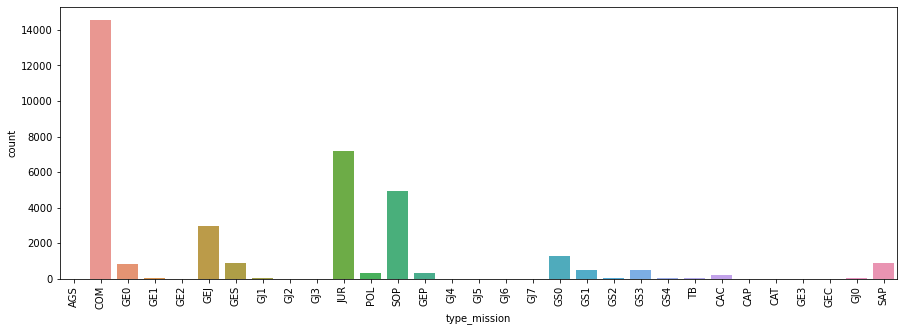

In [22]:
fig=plt.figure(figsize=(15,5))
ax = sns.countplot(x='type_mission', data=df)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Proportion des missions dites "classiques" & "exceptionnelles"

In [23]:
df_classique = df.query('type_mission == "COM" | type_mission == "JUR" | type_mission == "CAC" | type_mission == "CWE" | type_mission == "POL" | type_mission == "SAP" | type_mission == "SOP"')

In [24]:
df_exceptionnelle = df.query('type_mission == "AGS" | type_mission == "GE0" | type_mission == "GEC" | type_mission == "GE1" | type_mission == "GEJ" | type_mission == "GEP" | type_mission == "GJ0" | type_mission == "GJ1" | type_mission == "GS0" | type_mission == "TB"')

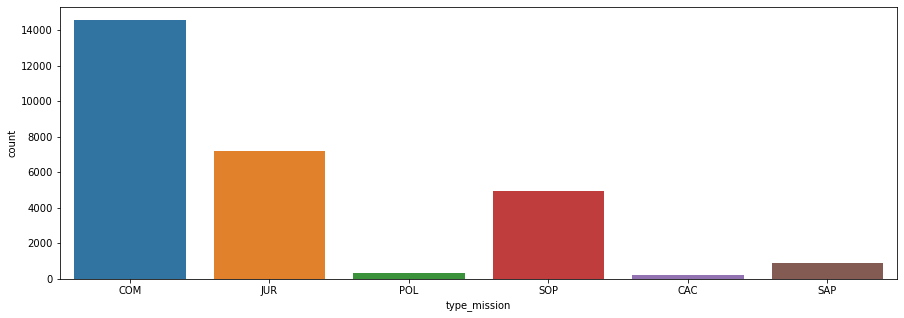

In [25]:
fig=plt.figure(figsize=(15,5))
ax = sns.countplot(x='type_mission', data=df_classique)

Parmi les missions classiques depuis 2017, ce sont les missions comptables (14569 sur 28125 soit presque 52%) des missions classiques et juridiques (7186 soit presque 25%) sur les missions classiques qui sont les plus fréquentes

In [26]:
#df[df['type_mission'] == 'JUR'].count()

In [27]:
# Proportion des missions COM sur l'ensemble du dataset
14569/len(df)

0.40943709074558077

In [28]:
# Proportion des missions JUR sur l'ensemble du dataset
7186/len(df)

0.20195036955849704

In [29]:
len(df_classique)

28125

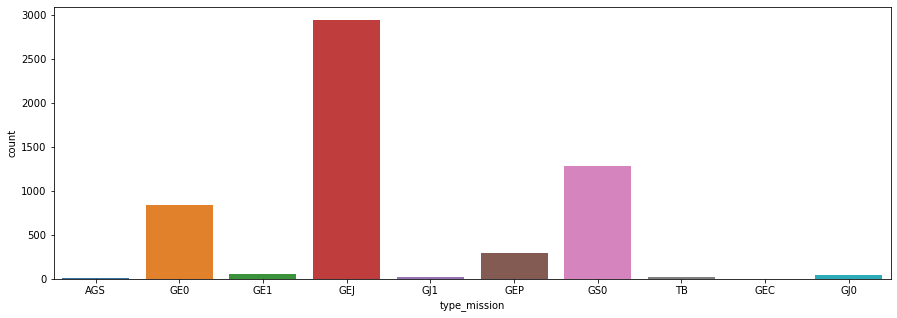

In [30]:
fig=plt.figure(figsize=(15,5))
ax = sns.countplot(x='type_mission', data=df_exceptionnelle)

Parmi les missions exceptionnelles depuis 2017, ce sont les missions juridiques GEJ (2947 sur 5525 soit presque 53%) des missions exceptionnelles qui représentent plus de 50 % et les missions GS0 (1282 soit presque 23%)

In [31]:
df[df['type_mission'] == 'GS0'].count()

code_mission       1282
type_mission       1282
exercice           1282
code_client        1282
total_assistant    1282
                   ... 
selarl             1282
selas              1282
sem                1282
sep                1282
snc                1282
Length: 197, dtype: int64

In [32]:
len(df_exceptionnelle)

5525

In [33]:
# Proportion des missions GEJ sur l'ensemble du dataset = 8% !
2947/len(df)

0.08282044796672568

In [34]:
# Proportion des missions COM sur l'ensemble du dataset = 3%
1282/len(df)

0.03602844054745243

Cela confirme que les missions GE..etc sont des missions qui restent très exceptionnelles à l'ensemble des clients.

### Articles / Activités : 120 activités sont répertoriées dans le dataset

In [35]:
df.iloc[:,46:166]

accompagnement dans le suivi de vos travaux  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
35578                                            0   
35579                                            0   
35580                                            0   
35581                                            0   
35582                                            0   

       accompagnement fonction daf  assistance au controle fiscal  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   
...                            ...                            ...   
35578                            0                              0   
35579                            0                              0   
35580                            0                              0   
35581                            0                              0   
35582                            0                              0   

       assistance au controle urssaf  assistance commissaire aux comptes  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   
...                              ...                                 ...   
35578                              0                                   0   
35579                              0                                   0   
35580                              0                                   0   
35581                              0                                   0   
35582                              0                                   0   

       assistance informatique client  attestations particulires  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
35578                               0                          0   
35579                               0                          0   
35580                               0                          0   
35581                               0                          0   
35582                               0                          0   

       audit  diagnostic  audit bulletins de paie etou charges sociales  \
0                      0                                              0   
1                      0                                              0   
2                      0                                              0   
3                      0                                              0   
4                      0                                              0   
...                  ...                                            ...   
35578                  0                                              0   
35579                  0                                              0   
35580                  0                                              0   
35581                  0                         

Création d'une boucle for pour voir le nombre d'activité dans le dataset :

In [36]:
activites_dict = {element:freq for element in df.columns[46:166] for freq in df.iloc[:,46:166][element][df.iloc[:,46:166][element] == 1].value_counts()}

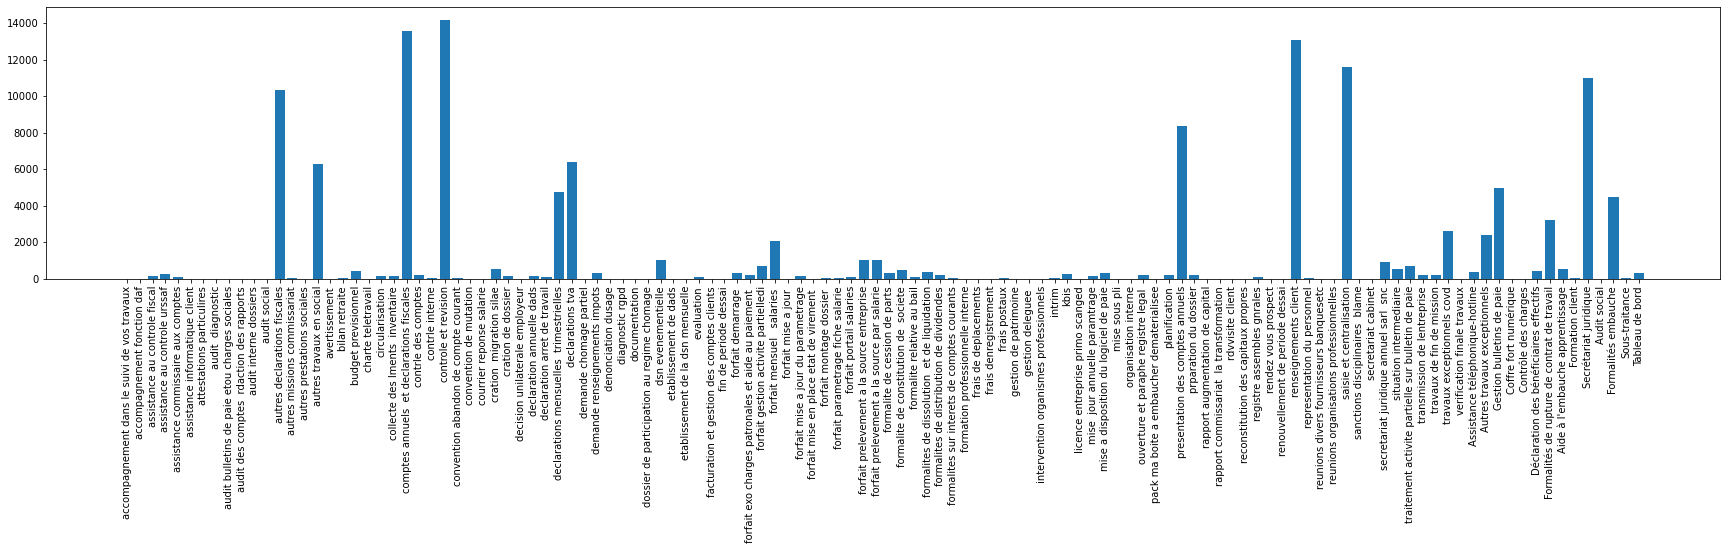

In [37]:
fig=plt.figure(figsize=(30,5))
plt.bar(range(len(activites_dict)), list(activites_dict.values()), align='center')
plt.xticks(range(len(activites_dict)), list(activites_dict.keys()), rotation=90)
plt.show()

In [38]:
import operator
activites_sorted = sorted(activites_dict.items(), key=operator.itemgetter(1))

df_act = pd.DataFrame(activites_dict, columns=['activité', 'fréquence'])

In [39]:
activites_sorted

[('accompagnement dans le suivi de vos travaux', 1),
 ('assistance informatique client', 1),
 ('audit interne dossiers', 1),
 ('audit social', 1),
 ('charte teletravail', 1),
 ('courrier reponse salarie', 1),
 ('denonciation dusage', 1),
 ('documentation', 1),
 ('etablissement de dads', 1),
 ('forfait mise en place etat de virement ', 1),
 ('frais denregistrement', 1),
 ('intervention organismes professionnels', 1),
 ('pack ma boite a embaucher dematerialisee', 1),
 ('rapport commissariat  la transformation', 1),
 ('reunions organisations professionnelles', 1),
 ('verification finale travaux', 1),
 ('audit bulletins de paie etou charges sociales', 2),
 ('diagnostic rgpd', 2),
 ('facturation et gestion des comptes clients', 2),
 ('formation professionnelle interne', 2),
 ('gestion de patrimoine', 2),
 ('rapport augmentation de capital', 2),
 ('accompagnement fonction daf', 3),
 ('convention de mutation', 3),
 ('reunions divers fournisseurs banquesetc', 3),
 ('Audit social', 3),
 ('attes

### Managers
Nombre de missions par managers depuis 2017

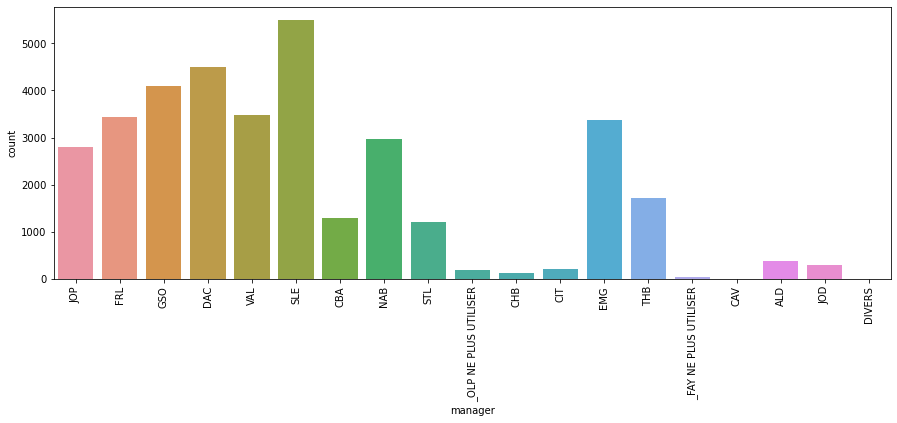

In [40]:
fig=plt.figure(figsize=(15,5))
ax = sns.countplot(x='manager', data=df)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Nous allons effectuer une analyse plus poussée sur les managers du cabinet d'expertise comptable afin d'en ressortir une analyse de la performance

#### Ajouter une colonne Boni-Mali
Cela correspond à la différence entre la facturation (ce que ça a coûté au client = Chiffre d'affaires) moins la valorisation du temps passé (ce que coûte l'ensemble du temps passé par les assistants sur une mission)

Boni = résultat positif / 
Mali = résultat négatif

In [41]:
df['Boni-Mali'] = df['facturation'] - df['valorisation_temps']

In [42]:
#Exemple sur les 5 premières lignes du dataset
df.loc[:,['temps', 'valorisation_temps', 'facturation', 'Boni-Mali']].head()

temps  valorisation_temps  facturation  Boni-Mali
0  43.00             5231.25       4550.0    -681.25
1   1.00               68.00        750.0     682.00
2  22.75             1372.50       1430.0      57.50
3   7.50              555.00        550.0      -5.00
4  17.75             1168.75       1640.0     471.25

In [43]:
df.columns

Index(['code_mission', 'type_mission', 'exercice', 'code_client',
       'total_assistant', 'manager', 'code_article', 'libelle_article',
       'temps', 'valorisation_temps',
       ...
       'sci', 'scm', 'scp', 'sdf', 'selarl', 'selas', 'sem', 'sep', 'snc',
       'Boni-Mali'],
      dtype='object', length=198)

In [44]:
df[df['manager'] == 'NAB'].loc[:,['type_mission', 'exercice', 'temps', 'valorisation_temps', 'facturation', 'Boni-Mali']].query('exercice == 2020').head(50)

type_mission  exercice   temps  valorisation_temps  facturation  \
25698          CAC      2020   75.00             5937.51      7763.63   
25699          CAC      2020  151.90            10285.95      7277.50   
25700          CAC      2020  267.35            22183.33       517.58   
25701          CAC      2020  127.63             8592.97         0.00   
25702          CAC      2020  104.00             7296.00      4781.70   
25703          CAC      2020  260.75            18120.92      9497.25   
25704          CAC      2020  114.75             7354.26         0.00   
25706          CAC      2020  128.25             9709.21         0.00   
25709          CAC      2020   79.75             5732.27      7236.00   
25710          CAC      2020   58.50             4110.00         0.00   
25712          CAC      2020  161.45            10996.97     10984.65   
25713          CAC      2020   70.00             4271.00      5487.30   
25717          CAC      2020   93.25             5809.88         0.00   
25718          CAC      2020   81.00             5583.71         0.00   
25720          CAC      2020   43.15             3239.92      3485.00   
25721          CAC      2020    5.50              287.75         0.00   
25722          CAC      2020   80.00             4979.88      4693.35   
25723          CAC      2020   32.30             2148.51         0.00   
25724          CAC      2020   73.20             5736.13         0.00   
25728          CAC      2020   79.00             5393.77      5945.00   
25729          CAC      2020   59.60             4988.23      2552.25   
25731          CAC      2020   90.75             7003.70      8184.63   
25732          CAC      2020   65.40             5207.41         0.00   
25733          CAC      2020   86.15             6014.56         0.00   
25736          CAC      2020    6.50              685.50         0.00   
25737          CAC      2020   43.15             3822.92       150.75   
25738          CAC      2020   49.00             3891.28         0.00   
25740          CAC      2020  100.45             7883.90         0.00   
25741          CAC      2020   18.50             1507.78         0.00   
25745          CAC      2020   73.75             5926.19         0.00   
25748          CAC      2020  112.50             9788.88      7816.50   
25749          CAC      2020   35.05             3749.89         0.00   
25750          CAC      2020   90.65             6944.52         0.00   
25751          CAC      2020  125.00             8078.90         0.00   
25752          CAC      2020  117.50             9023.03      7738.50   
25753          CAC      2020  156.25            10994.42         0.00   
25754          CAC      2020   81.95             6266.53      5637.50   
25755          CAC      2020   22.15             1494.65         0.00   
25756          CAC      2020    3.00              409.01         0.00   
25758          CAC      2020   50.75             3435.67         0.00   
25760          CAC      2020   79.00             5660.40      7962.90   
25761          CAC      2020   82.75             6105.82         0.00   
25762          CAC      2020    1.50               61.75         0.00   
25763          CAC      2020    3.00              213.00         0.00   
25764          CAC      2020   50.50             4103.31      2974.80   
25767          CAC      2020   59.70             4082.79         0.00   
25768          CAC      2020   38.65             2932.15         0.00   
25769          CAC      2020   49.50             5415.15         0.00   
25772          CAC      2020  195.20            14453.63     27567.15   
25775          CAC      2020    3.25              292.13         0.00   

       Boni-Mali  
25698    1826.12  
25699   -3008.45  
25700  -21665.75  
25701   -8592.97  
25702   -2514.30  
25703   -8623.67  
25704   -7354.26  
25706   -9709.21  
25709    1503.73  
25710   -4110.00  
25712     -12.32  
25713    1216.30  
25717   -5809.88  
25718   -5583.71

In [56]:
df_managers = df.groupby(['exercice','type_mission','manager']).sum()

In [57]:
df_managers.head()

total_assistant    temps  valorisation_temps  \
exercice type_mission manager                                                 
2017     AGS          FRL                  1.0     1.00               68.00   
                      JOP                  2.0    43.00             5231.25   
         COM          CBA                582.0  4002.30           271507.35   
                      CHB                 98.0   771.99            57957.70   
                      CIT                 81.0   462.44            35091.33   

                               facturation  entrée_clt  sortie_clt  ags  cac  \
exercice type_mission manager                                                  
2017     AGS          FRL           750.00           0           0    1    0   
                      JOP          4550.00           0           1    1    0   
         COM          CBA        362945.01           6           1    0    0   
                      CHB         67382.00           0          12    0    0   
                      CIT         47805.00           0           1    0    0   

                               cap  cat  ...  sci  scm  scp  sdf  selarl  \
exercice type_mission manager            ...                               
2017     AGS          FRL        0    0  ...    0    0    0    0       0   
                      JOP        0    0  ...    0    0    0    0       0   
         COM          CBA        0    0  ...   27    2    1    0       1   
                      CHB        0    0  ...    2    0    0    0       0   
                      CIT        0    0  ...    8    0    0    0       1   

                               selas  sem  sep  snc  Boni-Mali  
exercice type_mission manager                                   
2017     AGS          FRL          0    0    0    0     682.00  
                      JOP          0    0    0    0    -681.25  
         COM          CBA          0    0    0    0   91437.66  
                      CHB          0    0    0    0    9424.30  
                      CIT          0    0    0    0   12713.67  

[5 rows x 188 columns]

In [58]:
df_managers.reset_index(inplace=True)

In [59]:
#Dataset global sur l'ensemble des années 2017, 2018, 2019, 2020
df_managers.loc[:,['exercice','type_mission','manager','temps', 'valorisation_temps', 'facturation', 'Boni-Mali']][(df_managers['exercice'] == 2019) & (df_managers['type_mission'] == "COM")]

exercice type_mission manager     temps  valorisation_temps  facturation  \
312      2019          COM     CBA   4911.70           358725.06    420489.99   
313      2019          COM     CHB    131.00            10090.41     10540.00   
314      2019          COM     CIT    501.70            44314.86     48915.00   
315      2019          COM     DAC  24087.56          1206737.78   1222236.14   
316      2019          COM     EMG  14996.50          1057239.80    872788.37   
317      2019          COM     FRL  10727.67           857727.84   1025495.97   
318      2019          COM     GSO  14256.68          1068429.18   1261295.92   
319      2019          COM     JOD   1132.50            92502.51     83256.64   
320      2019          COM     JOP   9926.05           723128.92    900584.42   
321      2019          COM     NAB  10875.20           756099.29    776362.63   
322      2019          COM     SLE  19127.02          1312886.18   1431232.56   
323      2019          COM     STL   3623.92           282439.73    365099.95   
324      2019          COM     THB   7447.00           422804.81    474718.35   
325      2019          COM     VAL  10741.90           820173.55    939609.75   

     Boni-Mali  
312   61764.93  
313     449.59  
314    4600.14  
315   15498.36  
316 -184451.43  
317  167768.13  
318  192866.74  
319   -9245.87  
320  177455.50  
321   20263.34  
322  118346.38  
323   82660.22  
324   51913.54  
325  119436.20

In [60]:
df_managers.to_csv("./Data/df-managers.csv", index=False)

In [23]:
df[df['temps'] == 0]

code_mission type_mission  exercice code_client  total_assistant  \
1803   ACOM2017009184700          COM      2017        4497              1.0   
7244   ASOP2017010286300          SOP      2017        6408              1.0   
15628  APOL2018011476800          POL      2018        6967              1.0   
17636  ACOM2019009807400          COM      2019       40108              2.0   
18871  ACOM2019009968300          COM      2019        4230              2.0   
20789  AGE02019012572600          GE0      2019        4105              1.0   
35581  ATB 2020013967000           TB      2020       A1254              1.0   

      manager                         code_article  \
1803      STL                ['010', '012', '011']   
7244      DAC                            ['F0206']   
15628     SLE                            ['F0300']   
17636     JOP  ['010', '001', '012', '011', '013']   
18871     JOP                      ['016', 10, 16]   
20789     STL            ['049', '019', '046', 46]   
35581     JOP                              ['043']   

                                         libelle_article  temps  \
1803   saisie et centralisation, declarations tva, co...    0.0   
7244                       mouvement de personnel sortie    0.0   
15628             mise a disposition du logiciel de paie    0.0   
17636  saisie et centralisation, renseignements clien...    0.0   
18871  autres declarations fiscales, saisie et centra...    0.0   
20789  autres travaux exceptionnels, presentation des...    0.0   
35581                                    tableau de bord    0.0   

       valorisation_temps  ... scf  sci  scm  scp sdf selarl  selas  sem  sep  \
1803                 0.00  ...   0    0    0    0   0      0      0    0    0   
7244                 0.00  ...   0    0    0    0   0      0      0    0    0   
15628                0.00  ...   0    0    0    0   0      0      0    0    0   
17636               -1.50  ...   0    0    0    0   0      0      0    0    0   
18871                0.00  ...   0    0    0    0   0      0      0    0    0   
20789                0.02  ...   0    1    0    0   0      0      0    0    0   
35581                0.00  ...   0    0    0    0   0      0      0    0    0   

       snc  
1803     0  
7244     0  
15628    0  
17636    0  
18871    0  
20789    0  
35581    0  

[7 rows x 197 columns]

### Temps passé sur une mission

<AxesSubplot:>

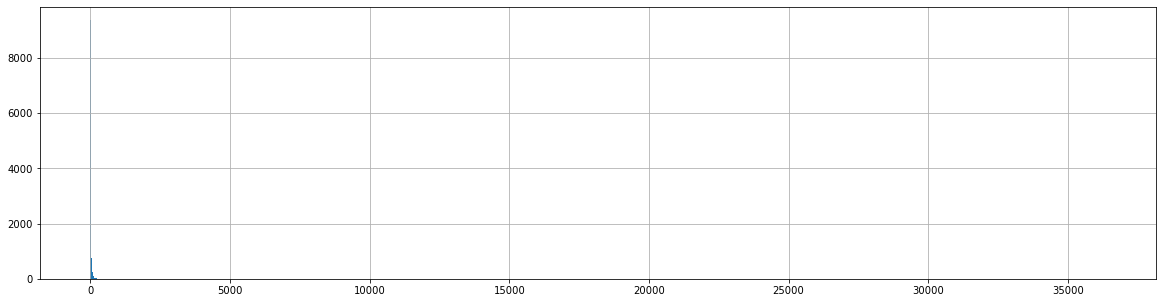

In [48]:
fig=plt.figure(figsize=(20,5))
df.temps.hist(bins=10000)

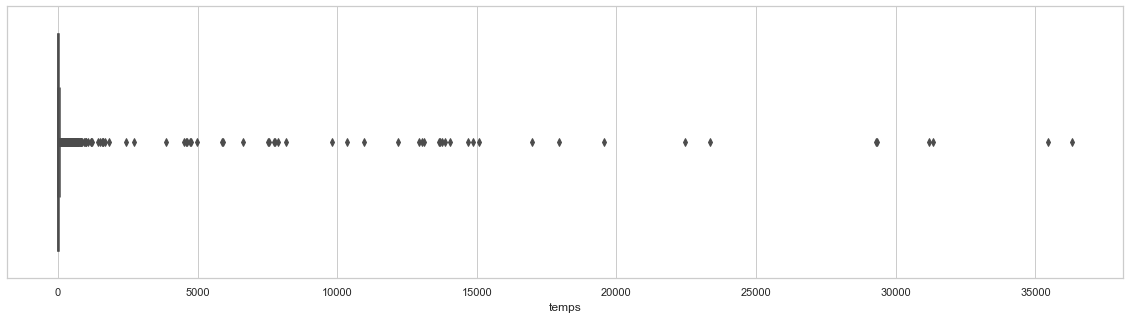

In [49]:
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.temps)

Que des outliers sur le temps

In [50]:
#2040 missions vont au delà de 100 heures
df[df['temps'] > 100].count()

code_mission       2040
type_mission       2040
exercice           2040
code_client        2040
total_assistant    2040
                   ... 
selas              2040
sem                2040
sep                2040
snc                2040
Boni-Mali          2040
Length: 198, dtype: int64

In [51]:
df[df['temps'] > 100].sort_values('temps', ascending=False)


code_mission type_mission  exercice code_client  total_assistant  \
1971   ACOM2017009203700          COM      2017        5425              5.0   
9900   ACOM2018009365700          COM      2018        6757              5.0   
9627   ACOM2018009329100          COM      2018        5425              6.0   
2278   ACOM2017009240500          COM      2017        6757              7.0   
9856   ACOM2018009359400          COM      2018        6573              5.0   
...                  ...          ...       ...         ...              ...   
24537  ASOP2019012197500          SOP      2019        2766              6.0   
6673   ASOP2017010127700          SOP      2017        7240              3.0   
19881  ACOM2019011594500          COM      2019       A0907              3.0   
7162   ASOP2017010277800          SOP      2017        5884              6.0   
16621  ASOP2018011583200          SOP      2018       88940              6.0   

      manager                                       code_article  \
1971      DAC  ['012', '210', '212', '211', '214', '011', '01...   
9900      DAC  ['043', '011', '001', '012', '210', '212', '21...   
9627      DAC  ['016', '012', '011', '211', '212', '210', '21...   
2278      DAC  ['011', '043', '012', '211', '212', '210', '01...   
9856      DAC  ['010', '012', '211', '212', '210', '016', '01...   
...       ...                                                ...   
24537     FRL  ['020', 'F0217', 'F02171', 'F02082', 'F0200', ...   
6673      EMG  ['029', '020', 'F0200', 'F0213', 'F0206', 'F02...   
19881     SLE  ['010', '012', '016', '011', '001', 11, 19, 13...   
7162      GSO  ['021', '029', 'F0200', 'F0205', 'F0206', '020...   
16621     ALD  ['F0200', 'F0216', '020', '024', '029', 'F0200...   

                                         libelle_article     temps  \
1971   declarations tva, saisie primo bpo, saisie lig...  36328.50   
9900   tableau de bord, controle et revision, renseig...  35446.25   
9627   autres declarations fiscales, declarations tva...  31319.75   
2278   controle et revision, tableau de bord, declara...  31195.75   
9856   saisie et centralisation, declarations tva, hb...  29336.40   
...                                                  ...       ...   
24537  fiche de paie, forfait prelevement a la source...    100.25   
6673   autres travaux en social, fiche de paie, bulle...    100.25   
19881  saisie et centralisation, declarations tva, au...    100.25   
7162   declarations mensuelles  trimestrielles, autre...    100.25   
16621  bulletin de paie, bulletin de paie clarifie, f...    100.10   

       valorisation_temps  ... sci  scm  scp  sdf selarl selas  sem  sep  snc  \
1971             17065.52  ...   0    0    0    0      0     0    0    0    0   
9900             14511.67  ...   0    0    0    0      0     0    0    0    0   
9627             15074.73  ...   0    0    0    0      0     0    0    0    0   
2278             14933.31  ...   0    0    0    0      0     0    0    0    0   
9856             14940.89  ...   0    0    0    0      0     0    0    0    0   
...                   ...  ...  ..  ...  ...  ...    ...   ...  ...  ...  ...   
24537             4027.94  ...   0    0    0    0      0     0    0    0    0   
6673              4045.50  ...   0    0    0    0      0     0    0    0    0   
19881             7823.01  ...   0    0    0    0      0     0    0    0    0   
7162              4324.75  ...   0    0    0    0      0     0    0    0    0   
16621             3637.90  ...   0    0    0    0      0     0    0    0    0   

       Boni-Mali  
1971    -4290.52  
9900     2578.33  
9627    -2019.73  
2278     1246.69  
9856     -775.89  
...          ...  
24537   -1186.94  
6673    -1842.50  
19881    5086.99  
7162    -2120.75  
16621   -1556.90  

[2040 rows x 198 columns]

In [52]:
df[df['code_client']=='5425']

code_mission type_mission  exercice code_client  total_assistant  \
1971   ACOM2017009203700          COM      2017        5425              5.0   
4359   AGEJ2017011360000          GEJ      2017        5425              2.0   
4947   AGES2017010679500          GES      2017        5425              6.0   
5871   AJUR2017009474400          JUR      2017        5425              3.0   
7087   ASOP2017010270300          SOP      2017        5425             11.0   
9627   ACOM2018009329100          COM      2018        5425              6.0   
13187  AGS02018011769000          GS0      2018        5425              3.0   
13608  AGS12018012049800          GS1      2018        5425              1.0   
15156  AJUR2018010712800          JUR      2018        5425              5.0   
16115  ASOP2018011531600          SOP      2018        5425              7.0   
18332  ACOM2019009897000          COM      2019        5425              7.0   
21711  AGS02019012141300          GS0      2019        5425              2.0   
23324  AJUR2019010887700          JUR      2019        5425              2.0   
24761  ASOP2019012220200          SOP      2019        5425              2.0   
27012  ACOM2020011182900          COM      2020        5425              9.0   
30579  AGS02020013249600          GS0      2020        5425              1.0   
32499  AJUR2020011875400          JUR      2020        5425              3.0   
34711  ASOP2020013095000          SOP      2020        5425              6.0   

      manager                                       code_article  \
1971      DAC  ['012', '210', '212', '211', '214', '011', '01...   
4359      DAC                                  ['069', 'F06454']   
4947      DAC                                            ['025']   
5871      DAC                                  ['060', 'F06011']   
7087      DAC  ['020', 'F0200', '021', '029', 'F0211', 'F0205...   
9627      DAC  ['016', '012', '011', '211', '212', '210', '21...   
13187     DAC                                            ['025']   
13608     DAC                                            ['024']   
15156     DAC                                  ['060', 'F06011']   
16115     DAC  ['020', 'F0200', 'F0205', 'F0211', 'F0216', '0...   
18332     DAC              ['010', '011', '012', 11, 10, 19, 13]   
21711     DAC                                            ['025']   
23324     DAC                                            ['060']   
24761     DAC  ['001', 'F0200', 'F02083', 'F0217', 'F02171', ...   
27012     DAC  ['010', '011', '04950', '012', '019', '013', '...   
30579     DAC                                            ['025']   
32499     DAC                                            ['060']   
34711     DAC  ['020', 'F02083', 'F0200', '021', '04950', '02...   

                                         libelle_article     temps  \
1971   declarations tva, saisie primo bpo, saisie lig...  36328.50   
4359   divers juridique, declaration des beneficiaire...      2.00   
4947                                 contrats de travail      6.50   
5871   secretariat juridique annuel, secretariat juri...      3.50   
7087   fiche de paie, bulletin de paie, declarations ...    194.75   
9627   autres declarations fiscales, declarations tva...  31319.75   
13187                                contrats de travail     10.50   
13608                         formalites de licenciement      8.00   
15156  secretariat juridique annuel, secretariat juri...      4.75   
16115  fiche de paie, bulletin de paie, mouvement de ...    260.75   
18332  saisie et centralisation, controle et revision...    441.75   
21711                                contrats de travail      6.75   
23324                       secretariat juridique annuel      1.25   
24761  renseignements client, bulletin de paie, forfa...    193.25   
27012  saisie et centralisation, controle et revision...    513.00   
30579                                contrats de travail      3.00   
32499   

In [53]:
#Exclure les 2040 missions de plus de 100H qui sont une minorité

In [54]:
moins_100h = df[df['temps'] <= 100]

In [55]:
len(moins_100h)

33543

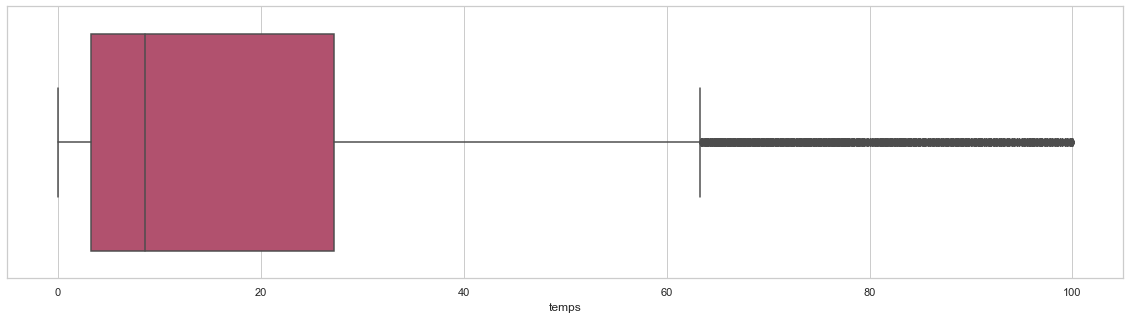

In [253]:
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=moins_100h.temps, palette='flare')

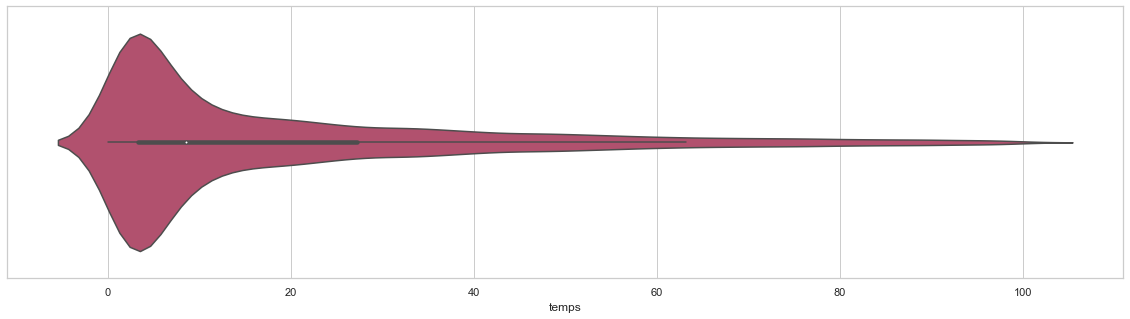

In [254]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=moins_100h.temps, palette='flare')

Le temps passé sur chaque mission varie sur une majorité de missions entre 3 et 30 heures. La médiane étant à 10H, il y a 50% des dossiers à moins de 9H et 50% des dossiers à plus de 9H.

In [57]:
moins_63h = df[df['temps'] <= 63]

In [58]:
len(moins_63h)

31395

### Valorisation du temps par mission
Il s'agit des coûts d'une mission par le cabinet

<AxesSubplot:>

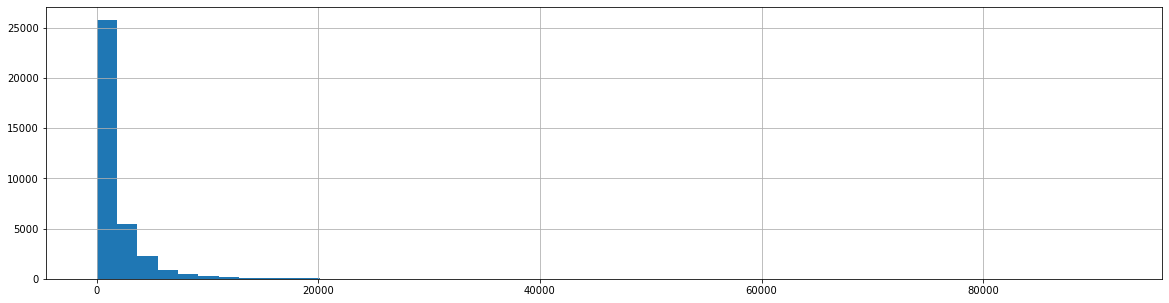

In [25]:
fig=plt.figure(figsize=(20,5))
df.valorisation_temps.hist(bins=50)

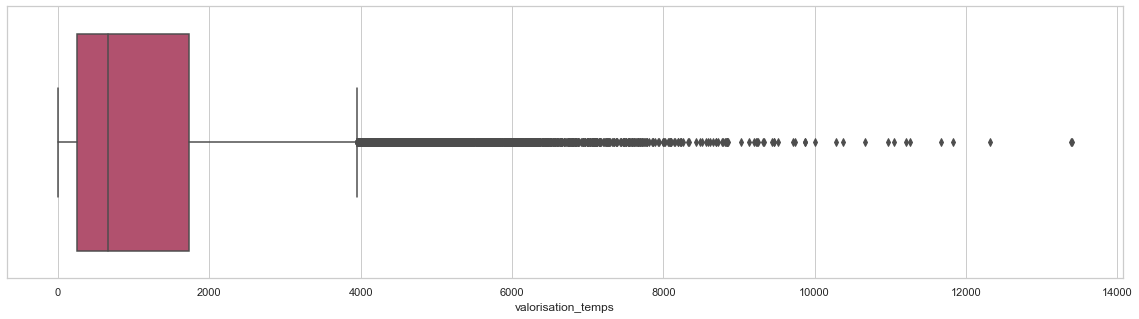

In [255]:
#Pour les missions de moins de 100 heures
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=moins_100h.valorisation_temps, palette='flare')

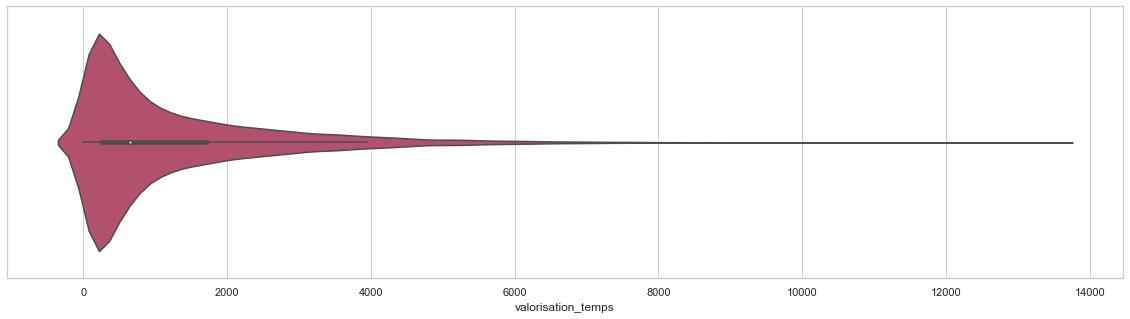

In [256]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=moins_100h.valorisation_temps, palette='flare')

Pour les missions de moins de 100h, la médiane approche les 500 € par mission

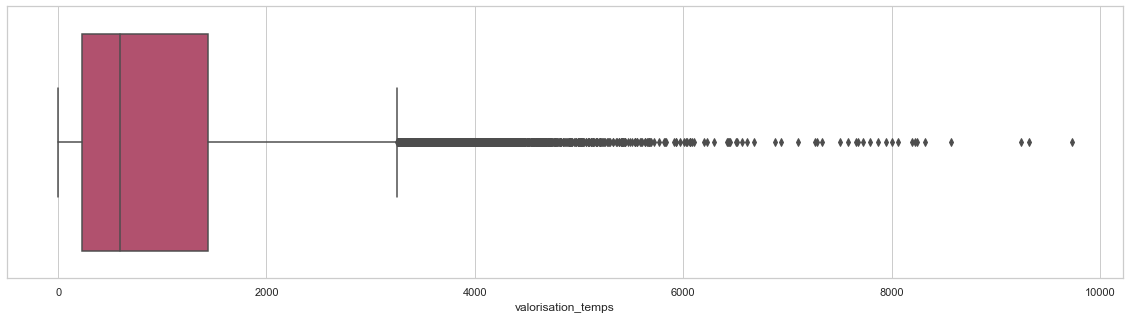

In [257]:
#Pour les missions de moins de 63 heures
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=moins_63h.valorisation_temps, palette='flare')

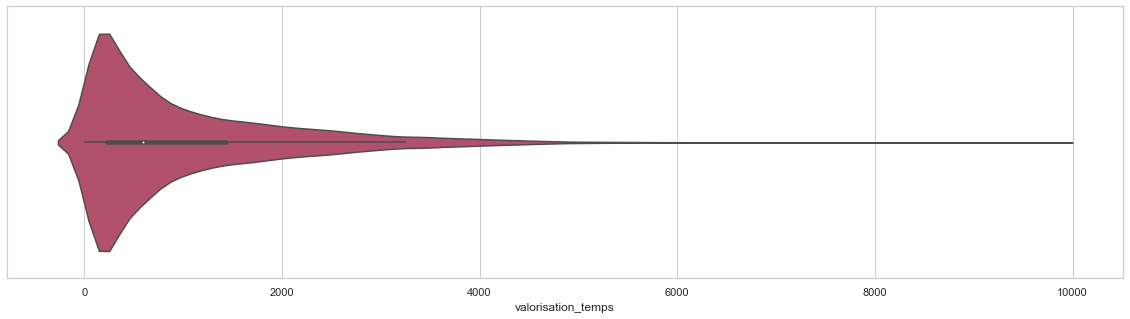

In [258]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=moins_63h.valorisation_temps, palette='flare')

Les valeurs sont moins dispersées mais le coût médian des missions approche de nouveau les 500 €

In [61]:
plus_100h = df[(df['temps'] > 2000) & (df['temps'] <4000)]

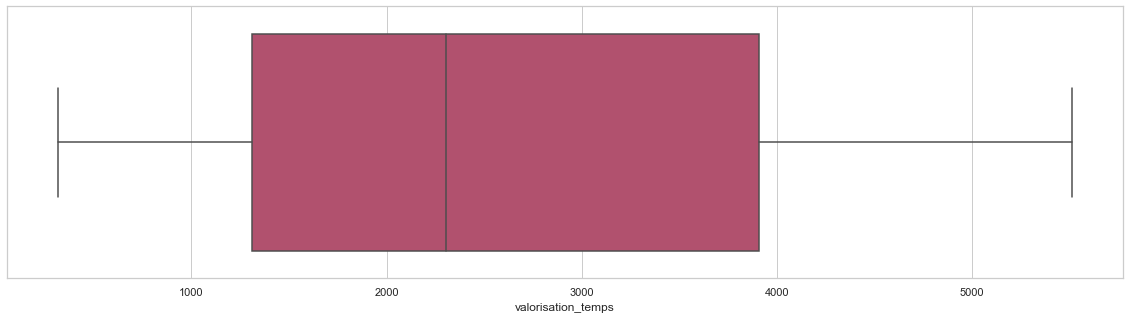

In [259]:
#Pour les missions de plus de 100 heures
fig=plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=plus_100h.valorisation_temps, palette='flare')

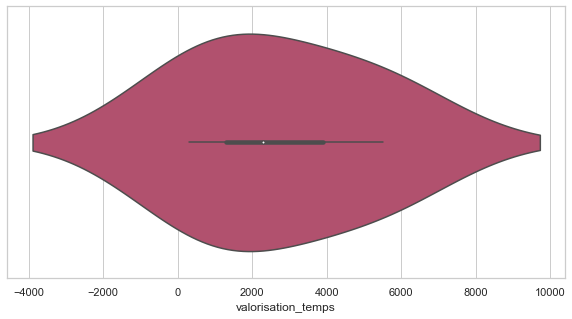

In [260]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=plus_100h.valorisation_temps, palette='flare')

missions CAC plutôt dans grandes entreprises (car respect de critères pour être vérifier - seuil...)

Création d'une colonne pour estimer le coût moyen par heure de la mission

In [63]:
df['coût_horaire'] = np.where(df['temps'] != 0, df['valorisation_temps']/df['temps'], 0)

In [64]:
df.coût_horaire.sort_values(ascending=False)

29618    2443.333333
25692    1629.166667
25693    1629.166667
35571     420.268056
35570     409.068456
            ...     
17636       0.000000
20789       0.000000
15628       0.000000
35581       0.000000
7244        0.000000
Name: coût_horaire, Length: 35583, dtype: float64

In [65]:
#Nombre d'heures erroné = vérifier ou enlever outliers ?
df.iloc[29618,:14]

code_mission                                       AGE02020013537300
type_mission                                                     GE0
exercice                                                        2020
code_client                                                    A1488
total_assistant                                                  1.0
manager                                                          JOP
code_article                                             ['011', 10]
libelle_article       controle et revision, saisie et centralisation
temps                                                            3.0
valorisation_temps                                            7330.0
site                                                      PITHIVIERS
facturation                                                   4050.0
entrée_clt                                                         0
sortie_clt                                                         0
Name: 29618, dtype: object

## Etudier la facturation (le chiffre d'affaires)

<AxesSubplot:>

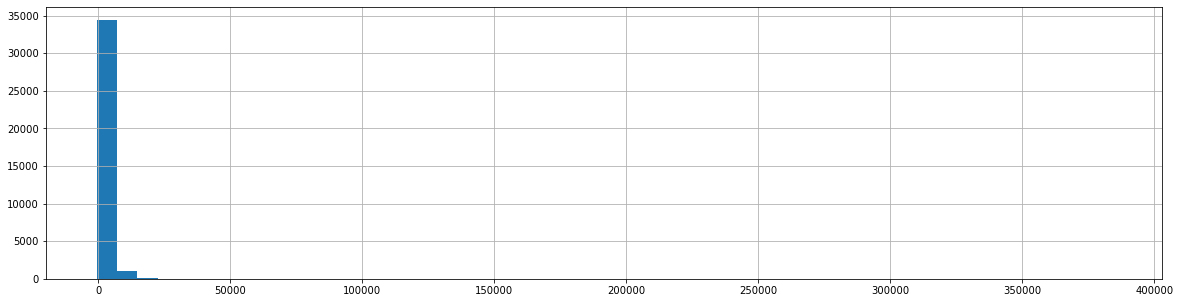

In [27]:
fig=plt.figure(figsize=(20,5))
df.facturation.hist(bins=50)

## Etudier les secteurs de la clientèle du cabinet d'expertise comptable

In [66]:
df_secteur = df.groupby(['code_client']).agg({"secteur": [lambda x:x.value_counts().index[0], 'nunique']})

In [67]:
df_secteur.reset_index(inplace=True)

In [68]:
df_secteur.columns = ['code_client', 'libelle_secteur', 'nb']

In [69]:
df_secteur

code_client                                    libelle_secteur  nb
0       06087SAS                      Ingénierie, études techniques   1
1          10004  Entretien et réparation de véhicules automobil...   1
2          10005                               Travaux de plâtrerie   1
3          10011   Réparation de machines et équipements mécaniques   1
4          10012         Fabrication d'articles en fils métalliques   1
...          ...                                                ...  ..
6357       P6776                                             Divers   1
6358       P6932                                             Divers   1
6359       P7071                                             Divers   1
6360       P7119  Location de terrains et d'autres biens immobil...   1
6361       P7260                                             Divers   1

[6362 rows x 3 columns]

In [70]:
df_nbsecteur = df_secteur.groupby(['libelle_secteur'])['nb'].sum()

In [71]:
df_nbsecteur.sort_values(ascending=False).head(15)

libelle_secteur
Divers                                                      1121
Location de terrains et d'autres biens immobiliers          1006
Location de logements                                        216
Activités des sociétés holding                               114
Restauration traditionnelle                                  110
Activités des infirmiers et des sages-femmes                 110
Transports de voyageurs par taxis                            103
Travaux de maçonnerie générale et gros œuvre de bâtiment      99
Conseil pour les affaires et autres conseils de gestion       99
Agences immobilières                                          86
Activités des professionnels de la rééducation                85
Travaux d'installation électrique dans tous locaux            83
Services d'aménagement paysager                               82
Activité des médecins généralistes                            80
Ingénierie, études techniques                                 76
Name: nb,

Depuis 2017, le top 10 des secteurs concerne :
- L'immobilier / location
- Holding
- Restauration
- Infirmier/sage femmes
- Entretien / réparation (garagistes)
- Conseil / Consulting
- Taxis
- Paysagistes
- Electriciens
- Ingénierie

## Etudier les formes juridiques de la clientèle du cabinet

In [72]:
df_formes = df.groupby(['code_client']).agg({"forme": [lambda x:x.value_counts().index[0], 'nunique']})

In [73]:
df_formes.reset_index(inplace=True)

In [74]:
df_formes.columns = ['code_client', 'libelle_forme', 'nb']

In [75]:
df_nbformes = df_formes.groupby(['libelle_forme'])['nb'].sum()

In [76]:
df_nbformes = df_nbformes.reset_index()

In [77]:
df_nbformes

libelle_forme    nb
0            ASS   132
1           COOP     1
2         Divers    40
3           EARL    22
4           EIRL    58
5           EURL   524
6           GAEC     2
7            GFA     7
8            GFO     2
9            GFR     4
10           GIE     5
11           IND  1452
12         INDIV     5
13   Particulier   907
14            SA    25
15         SADIR     2
16          SARL  1106
17           SAS   514
18          SASU   261
19            SC   102
20          SCEA    15
21           SCF     1
22           SCI  1042
23           SCM    45
24           SCP    11
25           SDF     4
26        SELARL    40
27         SELAS     2
28           SEM     1
29           SEP     4
30           SNC    26

In [78]:
df_nbformes = df_nbformes.set_index('libelle_forme')

In [79]:
df_nbformes.head()

nb
libelle_forme     
ASS            132
COOP             1
Divers          40
EARL            22
EIRL            58

<AxesSubplot:xlabel='libelle_forme'>

<Figure size 2160x360 with 0 Axes>

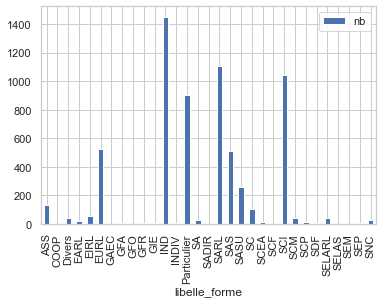

In [80]:
plt.figure(figsize=(30,5))
df_nbformes.plot.bar()

Les formes juridiques les plus fréquentes sont :
- Indépendants
- Particulier
- SARL
- SCI
- EURL

## Etudier les différents sites du cabinet

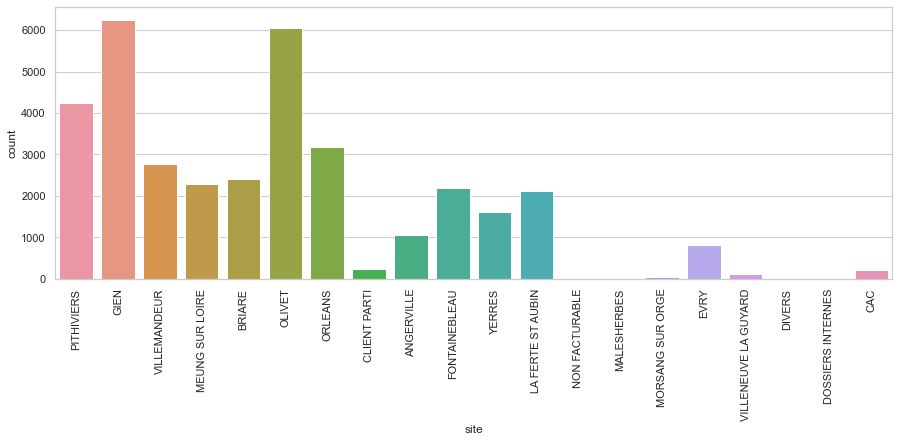

In [81]:
#Nombre de missions par site depuis 2017
fig=plt.figure(figsize=(15,5))
ax = sns.countplot(x='site', data=df)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [82]:
#df[df['site'] == "NON FACTURABLE"]

In [83]:
#df[df['site'] == "DIVERS"]

In [84]:
#df[df['site'] == "CLIENT PARTI"]

In [85]:
#df[df['site'] == "DOSSIERS INTERNES"]

## <span style="color:red">* Analyse multivariée</span>

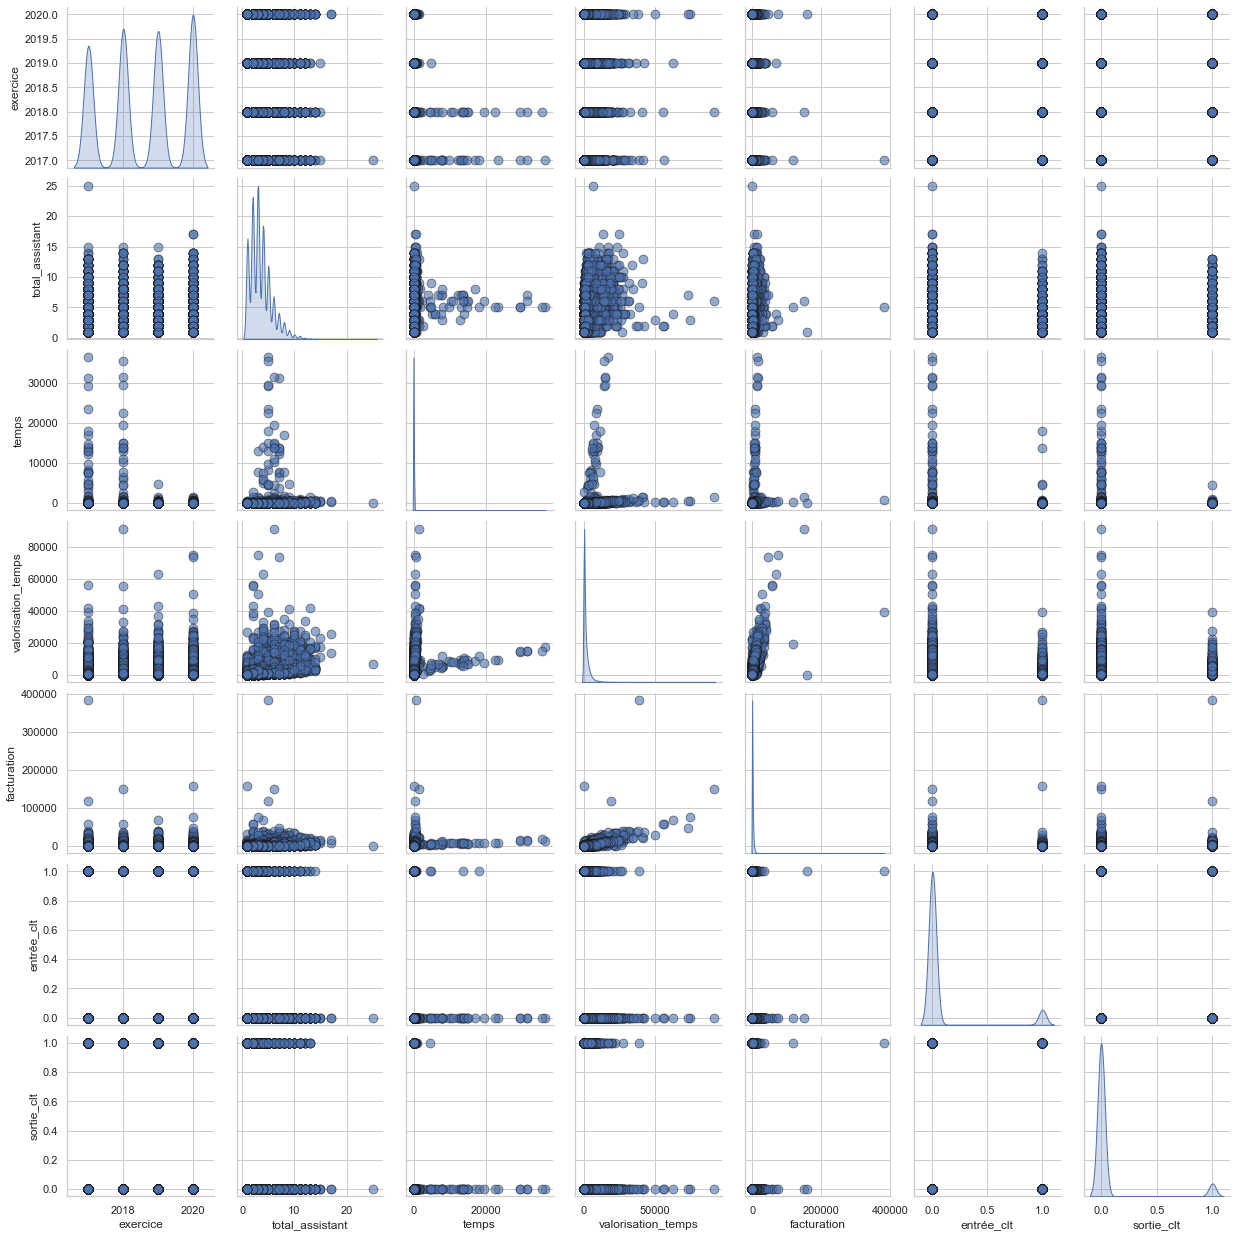

In [86]:
sns.pairplot(df.iloc[:,1:16], diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [228]:
#Corrélation positive forte entre la valorisation du temps (le coût pour le cabinet) & la facturation
df['valorisation_temps'].corr(df['facturation'])

0.708381751204399

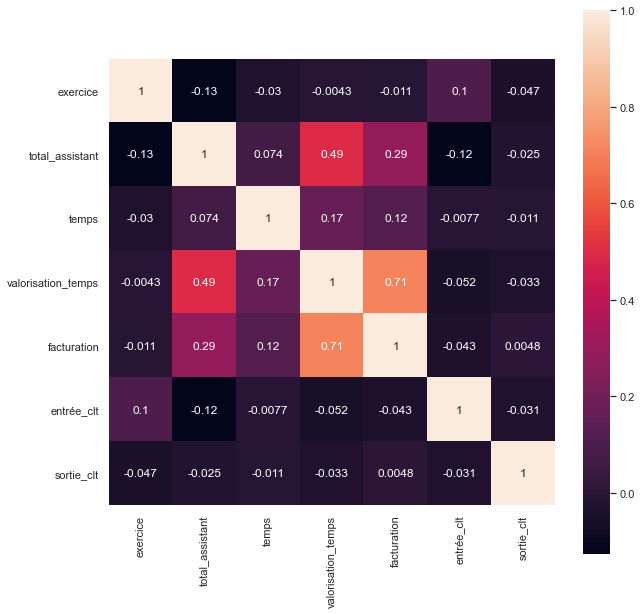

In [87]:
#Voir l'ensemble des taux de corrélation

plt.figure(figsize=(10, 10))
p = sns.heatmap(df.iloc[:,1:16].corr(), annot=True, square=True)

Les features qui sont corrélées à la facturation sont :
- le nombre total d'assistants par mission
- la valorisation du temps (le coût du cabinet sur le temps travaillé)
--> ces 2 colonnes sont elles-mêmes évidemment corrélées, car plus il y a d'assistants, plus il y a de chances d'avoir des heures en plus et donc un coût plus important pour le cabinet

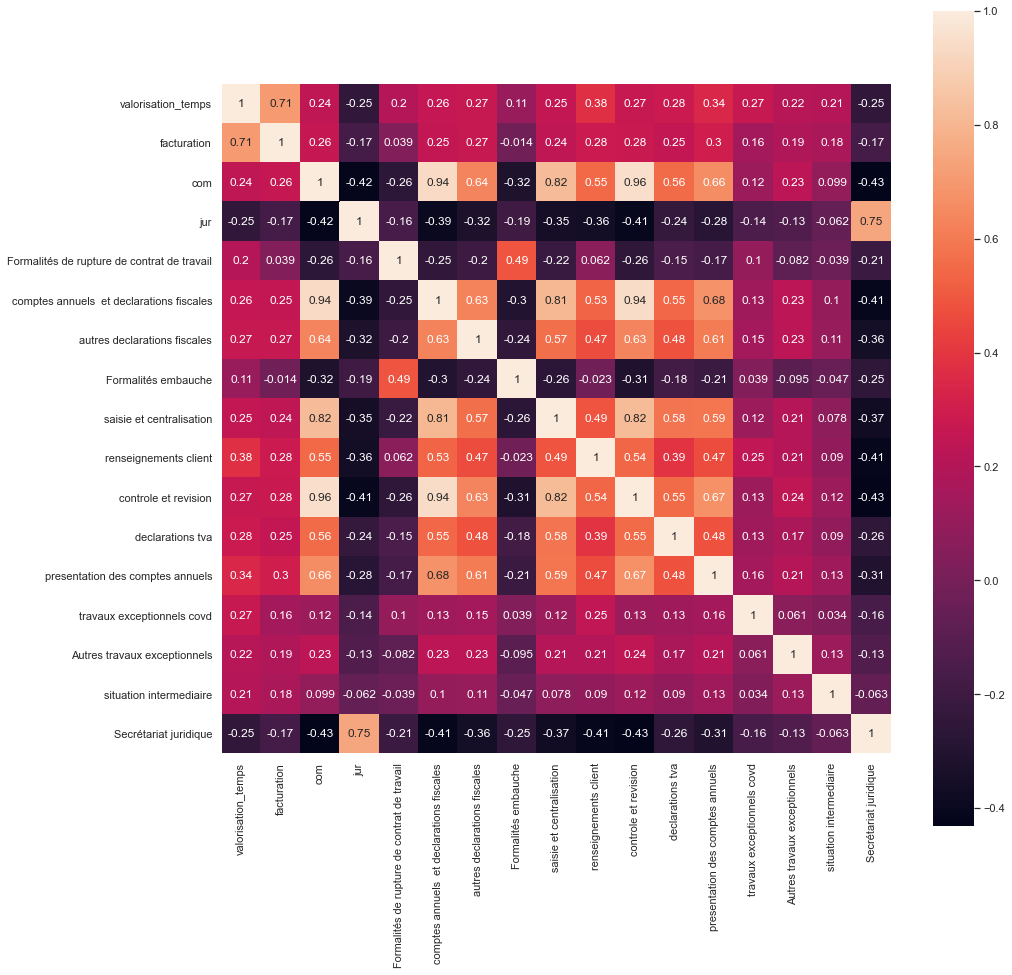

In [88]:
#Voir l'ensemble des taux de corrélation sur les types de mission et activités quand corrélation >= 0.2 ou inférieure à -0.2

plt.figure(figsize=(15, 15))
p = sns.heatmap(df.loc[:,['valorisation_temps','facturation','com','jur','Formalités de rupture de contrat de travail','comptes annuels  et declarations fiscales','autres declarations fiscales',
          'Formalités embauche','saisie et centralisation','renseignements client','controle et revision','declarations tva','presentation des comptes annuels',
          'travaux exceptionnels covd','Autres travaux exceptionnels','situation intermediaire','Secrétariat juridique']].corr(), annot=True, square=True)

Ils semblent qu'il existe des corrélations entre :
- corrélation positive entre les activités renseignements clients & présentation des comptes annuels sur la valorisation du temps (ce que ça coûte au cabinet d'expertise) et sur le chiffre d'affaires
- le type de mission comptabilité également a le plus grand taux de corrélation par rapport aux autres types de mission avec la facturation et la valorisation du temps
- Certaines activités sont très liées 'contrôle révision et comptes annuels et déclarations fiscales"

In [89]:
#Voir l'ensemble des taux de corrélation sur les formes juridiques
df.loc[:,['valorisation_temps','facturation','ass', 'coop', 'divers', 'earl', 'eirl', 'eurl', 'gaec', 'gfa', 'gfo', 'gfr', 'gie', 'ind', 'indiv','particulier', 
               'sa', 'sadir', 'sarl', 'sas', 'sasu', 'sc', 'scea', 'scf', 'sci', 'scm', 'scp', 'sdf', 'selarl', 'selas', 'sem', 'sep', 'snc']].corr()

valorisation_temps  facturation       ass      coop  \
valorisation_temps            1.000000     0.708382  0.059197  0.076799   
facturation                   0.708382     1.000000  0.023293  0.090783   
ass                           0.059197     0.023293  1.000000 -0.001406   
coop                          0.076799     0.090783 -0.001406  1.000000   
divers                       -0.009208    -0.009598 -0.007968 -0.000637   
earl                          0.006532     0.005856 -0.007874 -0.000630   
eirl                         -0.001550    -0.001049 -0.011088 -0.000886   
eurl                         -0.011507    -0.009602 -0.050145 -0.004009   
gaec                          0.005663     0.007260 -0.002436 -0.000195   
gfa                          -0.009804    -0.007733 -0.003065 -0.000245   
gfo                          -0.007174    -0.005886 -0.002332 -0.000186   
gfr                          -0.009005    -0.007581 -0.002723 -0.000218   
gie                          -0.003356    -0.001511 -0.003299 -0.000264   
ind                          -0.008239     0.000751 -0.059851 -0.004785   
indiv                        -0.007985    -0.005406 -0.002332 -0.000186   
particulier                  -0.071128    -0.020851 -0.022201 -0.001775   
sa                            0.079420     0.057471 -0.009971 -0.000797   
sadir                         0.018564     0.009452 -0.001218 -0.000097   
sarl                          0.069904     0.048846 -0.080312 -0.006421   
sas                           0.138557     0.092093 -0.044583 -0.003564   
sasu                          0.029478     0.010745 -0.032526 -0.002601   
sc                           -0.044733    -0.030901 -0.016586 -0.001326   
scea                         -0.000156    -0.001339 -0.007714 -0.000617   
scf                          -0.007005    -0.005590 -0.001989 -0.000159   
sci                          -0.192885    -0.135538 -0.058089 -0.004644   
scm                          -0.022319    -0.019156 -0.013370 -0.001069   
scp                           0.014188     0.009170 -0.006335 -0.000506   
sdf                          -0.007456    -0.005153 -0.001989 -0.000159   
selarl                        0.017665     0.008396 -0.014907 -0.001192   
selas                         0.010249     0.006238 -0.002813 -0.000225   
sem                           0.014664     0.011012 -0.000994 -0.000079   
sep                           0.000428    -0.001894 -0.003586 -0.000287   
snc                           0.013342     0.012418 -0.010218 -0.000817   

                      divers      earl      eirl      eurl      gaec  \
valorisation_temps -0.009208  0.006532 -0.001550 -0.011507  0.005663   
facturation        -0.009598  0.005856 -0.001049 -0.009602  0.007260   
ass                -0.007968 -0.007874 -0.011088 -0.050145 -0.002436   
coop               -0.000637 -0.000630 -0.000886 -0.004009 -0.000195   
divers              1.000000 -0.003568 -0.005023 -0.022719 -0.001104   
earl               -0.003568  1.000000 -0.004964 -0.022450 -0.001091   
eirl               -0.005023 -0.004964  1.000000 -0.031613 -0.001536   
eurl               -0.022719 -0.022450 -0.031613  1.000000 -0.006945   
gaec               -0.001104 -0.001091 -0.001536 -0.006945  1.000000   
gfa                -0.001389 -0.001372 -0.001932 -0.008740 -0.000425   
gfo                -0.001057 -0.001044 -0.001470 -0.006649 -0.000323   
gfr                -0.001234 -0.001219 -0.001717 -0.007765 -0.000377   
gie                -0.001494 -0.001477 -0.002080 -0.009405 -0.000457   
ind                -0.027117 -0.026796 -0.037732 -0.170645 -0.008289   
indiv              -0.001057 -0.001044 -0.001470 -0.006649 -0.000323   
particulier        -0.010058 -0.009939 -0.013996 -0.063298 -0.003075   
sa                 -0.004517 -0.004464 -0.006286 -0.028428 -0.001381   
sadir              -0.000552 -0.000545 -0.000768 -0.003472 -0.000169   
sarl               -0.036387 -0.035956 -0.050631 -0.228983 -0.011123   
sas                -0.020199 

### Analyse plus poussée sur les managers par type de missions en 2020 

In [67]:
missions_2020 = pd.read_csv("./Data/mission 2020-mgr.csv", sep=";")

In [68]:
missions_2020.head()

Code         Raison sociale   Code Mission   \
0  06565             GRAF PARIS       AGS 2020   
1  06924             GROUPE ADM       AGS 2020   
2  00676                 CAYEUX       ANT 2020   
3  A1398                   LNPI       ANT 2020   
4  A1886  PADODO EN LIQUIDATION       ANT 2020   

                    Libellé Mission    PV Réalisé    Montant Facturé   \
0  Mission ASSISTANCE GESTION SOCIAL       1194.50             1350.0   
1  Mission ASSISTANCE GESTION SOCIAL       1747.38             2350.0   
2    Mission ANTERIORITE PRELEVEMENT          0.00                0.0   
3    Mission ANTERIORITE PRELEVEMENT          0.00                0.0   
4    Mission ANTERIORITE PRELEVEMENT          0.00                0.0   

    Fact - PR    Fact - PV    Qté   EC   
0       1350.0       155.50  15.00  FRL  
1       2350.0       602.62  20.75  JOP  
2          0.0         0.00   0.00  GSO  
3          0.0         0.00   0.00  EMG  
4          0.0         0.00   0.00  THB

In [69]:
missions_2020.columns = ['code_client', 'raisonsociale', 'type_mission', 'libelle_mission',
                         'valorisation_temps', 'facturation', 'fact-pr', 'boni-mali',
                         'temps', 'manager']

In [70]:
mission2020_mgr = missions_2020.groupby(['type_mission','manager']).sum()
mission2020_mgr.reset_index(inplace=True)

In [71]:
missions_2020.head()

code_client          raisonsociale type_mission  \
0       06565             GRAF PARIS     AGS 2020   
1       06924             GROUPE ADM     AGS 2020   
2       00676                 CAYEUX     ANT 2020   
3       A1398                   LNPI     ANT 2020   
4       A1886  PADODO EN LIQUIDATION     ANT 2020   

                     libelle_mission  valorisation_temps  facturation  \
0  Mission ASSISTANCE GESTION SOCIAL             1194.50       1350.0   
1  Mission ASSISTANCE GESTION SOCIAL             1747.38       2350.0   
2    Mission ANTERIORITE PRELEVEMENT                0.00          0.0   
3    Mission ANTERIORITE PRELEVEMENT                0.00          0.0   
4    Mission ANTERIORITE PRELEVEMENT                0.00          0.0   

   fact-pr  boni-mali  temps manager  
0   1350.0     155.50  15.00     FRL  
1   2350.0     602.62  20.75     JOP  
2      0.0       0.00   0.00     GSO  
3      0.0       0.00   0.00     EMG  
4      0.0       0.00   0.00     THB

In [65]:
mission2020_mgr.describe()

valorisation_temps   facturation       fact-pr      boni-mali  \
count        2.270000e+02  2.270000e+02  2.270000e+02     227.000000   
mean         7.228437e+04  6.566259e+04  6.566259e+04   -6621.777665   
std          2.076812e+05  1.969620e+05  1.969620e+05   47097.993262   
min          0.000000e+00 -4.468743e+04 -4.468743e+04 -434693.090000   
25%          1.156500e+03  1.735000e+03  1.735000e+03    -987.510000   
50%          6.985910e+03  7.499000e+03  7.499000e+03     348.120000   
75%          2.690331e+04  2.751388e+04  2.751388e+04    2537.960000   
max          1.366974e+06  1.252325e+06  1.252325e+06  116609.980000   

              temps  
count    227.000000  
mean     838.514670  
std     2748.834004  
min        0.000000  
25%       12.700000  
50%       58.250000  
75%      310.675000  
max    18794.130000

En moyenne en 2020 et sur l'ensemble des managers et tout type de missions du cabinet confondus :
- 72 284 € de coût moyen par le cabinet par manager mais avec des outliers forts
- Pour un chiffre d'affaires moyen de 65 662 €
- Boni-mali (facturation - valorisation_temps) plutôt négatif d'une moyenne de -6621. Il semble que sur l'ensemble des activités, cela coûte plus cher au cabinet que ça ne lui rapporte.

In [66]:
mission2020_mgr

type_mission manager  valorisation_temps  facturation    fact-pr  \
0       AGS 2020     FRL             1194.50      1350.00    1350.00   
1       AGS 2020     JOP             1747.38      2350.00    2350.00   
2       ANT 2020     EMG                0.00    -44687.43  -44687.43   
3       ANT 2020     GSO                0.00         0.00       0.00   
4       ANT 2020     THB                0.00         0.00       0.00   
..           ...     ...                 ...          ...        ...   
222     SOP 2020     VAL           329517.21    180465.50  180465.50   
223      TB 2020     GSO             1521.25      3200.08    3200.08   
224      TB 2020     JOP             2496.75      2279.96    2279.96   
225      TB 2020     NAB             6113.47      6140.00    6140.00   
226      TB 2020     SLE              174.00       360.00     360.00   

     boni-mali    temps  
0       155.50    15.00  
1       602.62    20.75  
2    -44687.43     0.00  
3         0.00     0.00  
4         0.00     0.00  
..         ...      ...  
222 -149051.71  2154.55  
223    1678.83     9.25  
224    -216.79    17.50  
225      26.53    12.90  
226     186.00     2.00  

[227 rows x 7 columns]

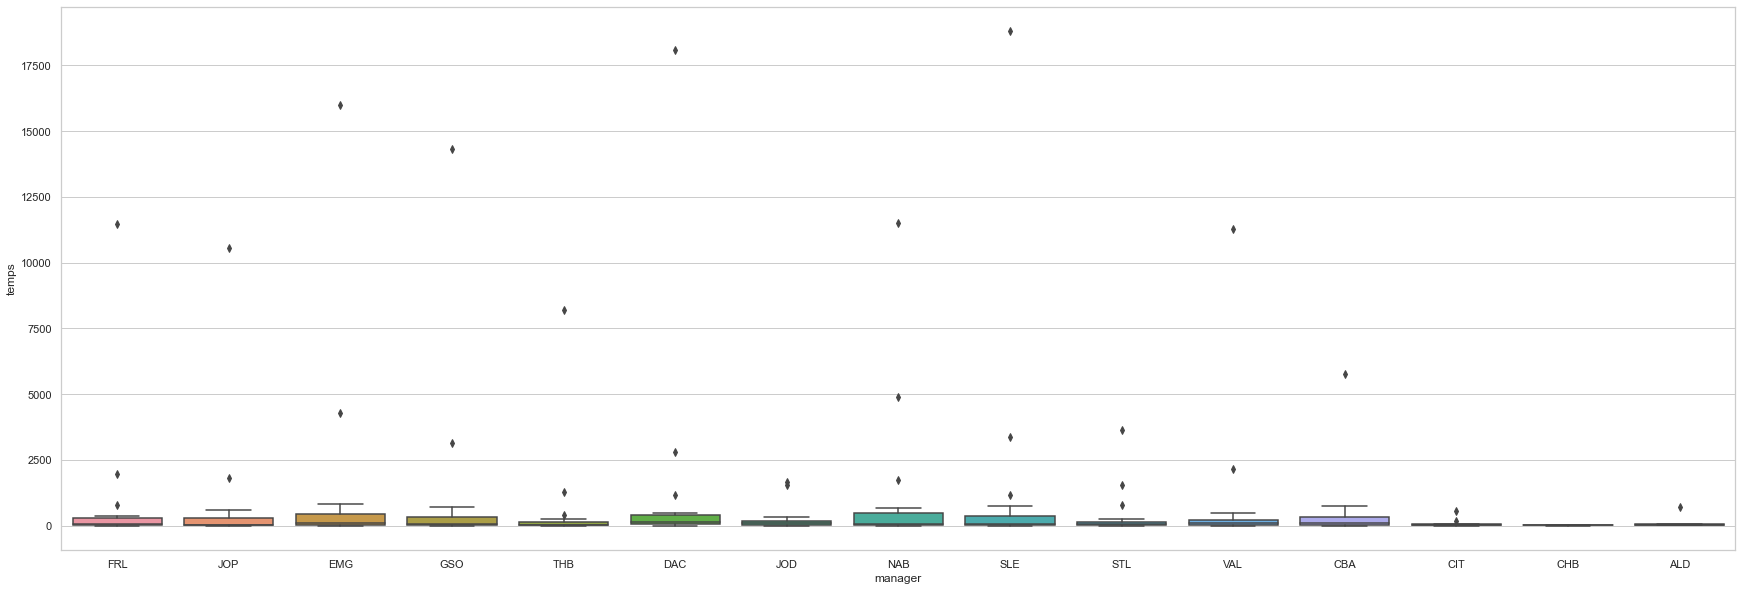

In [97]:
fig=plt.figure(figsize=(30,10))
ax = sns.boxplot(x="manager", y="temps", data=mission2020_mgr)   
plt.show()

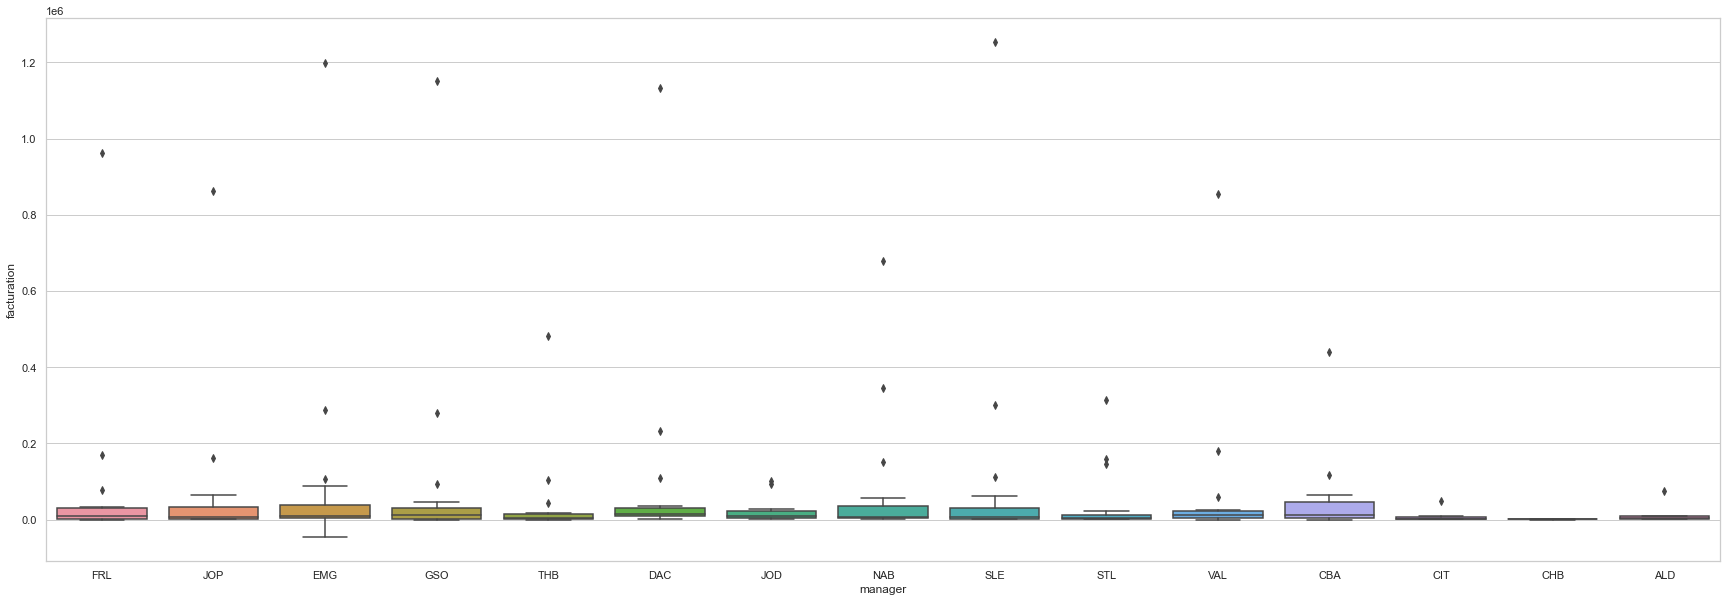

In [98]:
fig=plt.figure(figsize=(30,10))
ax = sns.boxplot(x="manager", y="facturation", data=mission2020_mgr)   
plt.show()

### Voir le nombre de clients par manager :

In [99]:
dossiers_mgr = missions_2020.groupby(['type_mission','manager'])['code_client','libelle_mission'].count()
#dossiers_mgr.reset_index(inplace=True)

<ipython-input-99-7448d6eb55bd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dossiers_mgr = missions_2020.groupby(['type_mission','manager'])['code_client','libelle_mission'].count()


In [100]:
dossiers_mgr.reset_index(inplace=True)

In [101]:
dossiers_mgr[dossiers_mgr['manager'] == 'FRL']

type_mission manager  code_client  libelle_mission
0       AGS 2020     FRL            1                1
18      COM 2020     FRL          377              377
31      CWE 2020     FRL           52               52
46      GE0 2020     FRL           10               10
71      GEJ 2020     FRL           46               46
85      GEP 2020     FRL            6                6
97      GJ0 2020     FRL            2                2
120     GS0 2020     FRL           38               38
134     GS1 2020     FRL           16               16
142     GS2 2020     FRL            1                1
151     GS3 2020     FRL           30               30
161     GS4 2020     FRL            1                1
172     JUR 2020     FRL          224              224
187     POL 2020     FRL            9                9
200     SAP 2020     FRL          155              155
214     SOP 2020     FRL           99               99

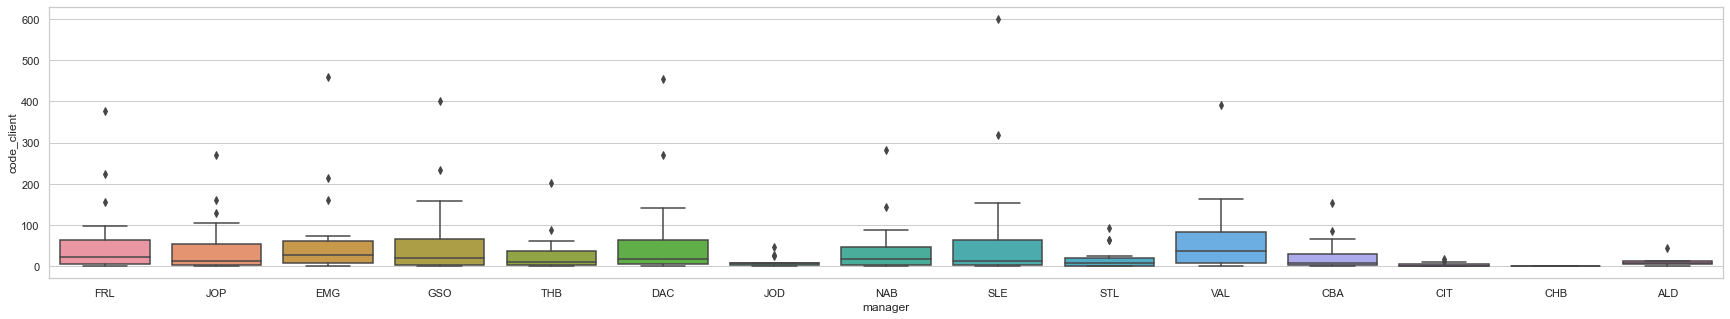

In [102]:
fig=plt.figure(figsize=(30,5))
ax = sns.boxplot(x="manager", y="code_client", data=dossiers_mgr)   
plt.show()

Les managers VAL et GSO semblent avoir le plus de dossiers client
Le manager CHB en revanche a le moins de dossier client (=départ en retraite)

### Constats par type de mission :

#### ~ Analyse sur les missions comptabilité :

In [103]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'COM 2020']

type_mission manager  valorisation_temps  facturation     fact-pr  \
14     COM 2020     CBA           448715.78    438786.87   438786.87   
15     COM 2020     CIT            46821.39     49740.00    49740.00   
16     COM 2020     DAC          1130842.40   1131945.88  1131945.88   
17     COM 2020     EMG          1181249.31   1197554.28  1197554.28   
18     COM 2020     FRL           883688.15    962945.18   962945.18   
19     COM 2020     GSO          1080452.79   1152092.65  1152092.65   
20     COM 2020     JOD           130862.74    101370.00   101370.00   
21     COM 2020     JOP           769512.61    862016.78   862016.78   
22     COM 2020     NAB           806341.73    679190.25   679190.25   
23     COM 2020     SLE          1366974.24   1252324.67  1252324.67   
24     COM 2020     STL           292393.92    313164.94   313164.94   
25     COM 2020     THB           436277.47    481677.16   481677.16   
26     COM 2020     VAL           850613.21    853251.53   853251.53   

    boni-mali     temps  
14   -9928.91   5757.95  
15    2918.61    538.92  
16    1103.48  18103.56  
17   16304.97  16013.10  
18   79257.03  11479.98  
19   71639.86  14314.94  
20  -29492.74   1667.25  
21   92504.17  10539.15  
22 -127151.48  11508.02  
23 -114649.57  18794.13  
24   20771.02   3635.95  
25   45399.69   8186.25  
26    2638.32  11280.04

In [104]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'COM 2020'].describe()

valorisation_temps   facturation       fact-pr      boni-mali  \
count        1.300000e+01  1.300000e+01  1.300000e+01      13.000000   
mean         7.249804e+05  7.289277e+05  7.289277e+05    3947.265385   
std          4.203842e+05  4.182057e+05  4.182057e+05   66347.544321   
min          4.682139e+04  4.974000e+04  4.974000e+04 -127151.480000   
25%          4.362775e+05  4.387869e+05  4.387869e+05   -9928.910000   
50%          8.063417e+05  8.532515e+05  8.532515e+05    2918.610000   
75%          1.080453e+06  1.131946e+06  1.131946e+06   45399.690000   
max          1.366974e+06  1.252325e+06  1.252325e+06   92504.170000   

              temps  
count     13.000000  
mean   10139.941538  
std     5948.754183  
min      538.920000  
25%     5757.950000  
50%    11280.040000  
75%    14314.940000  
max    18794.130000

- Boni moyen à 3947.26 et plutôt constant
- Temps moyen à 10 139 heures passées sur l'ensemble des missions comptabilité et managers sur l'année 2020
- Chiffre d'affaires en moyenne à 729 000 €

In [105]:
df_com = mission2020_mgr[mission2020_mgr['type_mission'] == 'COM 2020']

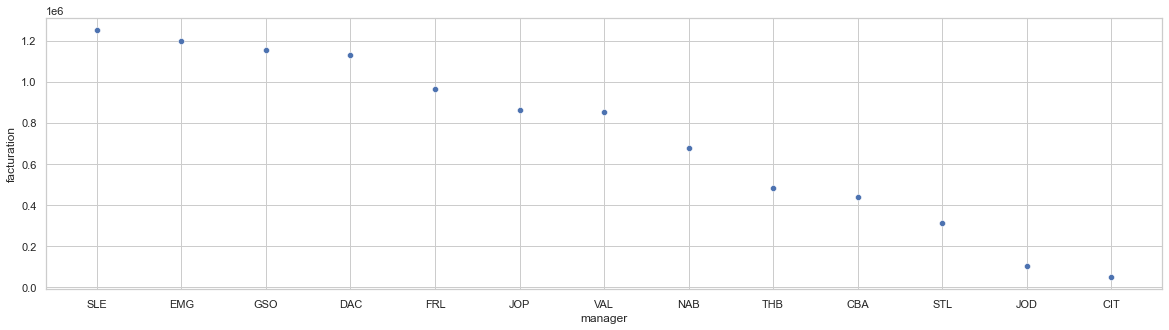

In [106]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_com.sort_values(by='facturation',ascending=False))   
plt.show()

Sur les missions comptabilité en 2020, il semble que ce soit le manager SLE qui est le plus de chiffre d'affaires. A l'inverse, CIT a le moins bon chiffre d'affaires

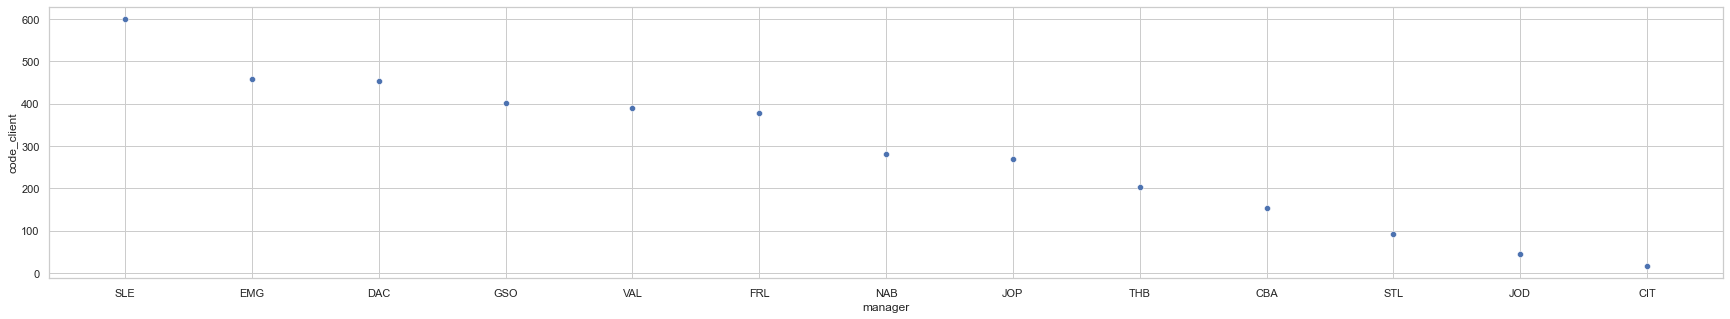

In [107]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_mgr[dossiers_mgr['type_mission'] == 'COM 2020'].sort_values(by='code_client', ascending=False))   
plt.show()

Sur les dossiers COM, le chiffre d'affaires est fortement corrélé au nombre de clients que détient un manager

In [108]:
df_com_asc = df_com.sort_values(by='boni-mali', ascending=False)

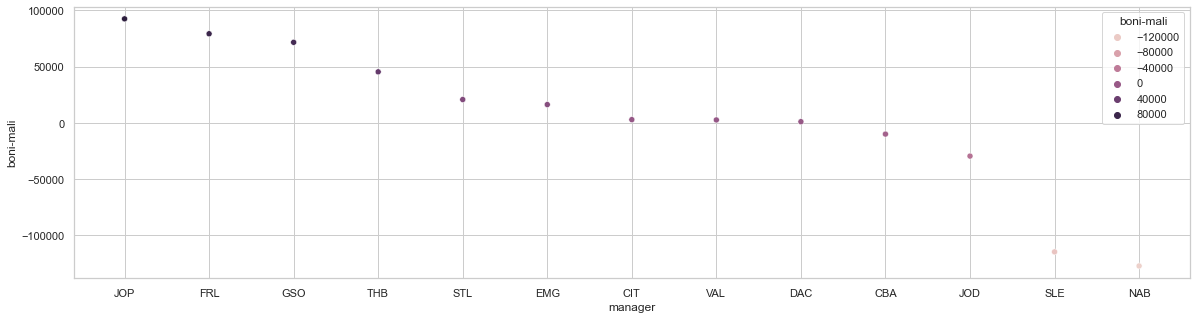

In [109]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_com_asc)   
plt.show()

En mali, nous avons les managers NAB SLE JOD CBA
En boni, nous avons les managers FRL GSO JOP EMG STL THB

#### ~ Analyse sur les missions de location du logiciel chez le client :

In [110]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'CWE 2020']

type_mission manager  valorisation_temps  facturation  fact-pr  boni-mali  \
27     CWE 2020     CBA                 0.0       3653.0   3653.0     3653.0   
28     CWE 2020     CIT                 0.0        578.0    578.0      578.0   
29     CWE 2020     DAC                 0.0       9626.0   9626.0     9626.0   
30     CWE 2020     EMG                 0.0       1670.0   1670.0     1670.0   
31     CWE 2020     FRL                 0.0       9568.0   9568.0     9568.0   
32     CWE 2020     GSO                 0.0      13167.0  13167.0    13167.0   
33     CWE 2020     JOD                 0.0       1249.0   1249.0     1249.0   
34     CWE 2020     JOP                 0.0       4842.0   4842.0     4842.0   
35     CWE 2020     NAB                 0.0       5122.0   5122.0     5122.0   
36     CWE 2020     SLE                 0.0       4944.0   4944.0     4944.0   
37     CWE 2020     STL                 0.0       2322.0   2322.0     2322.0   
38     CWE 2020     THB                 0.0       1375.0   1375.0     1375.0   
39     CWE 2020     VAL                 0.0       8258.0   8258.0     8258.0   

    temps  
27    0.0  
28    0.0  
29    0.0  
30    0.0  
31    0.0  
32    0.0  
33    0.0  
34    0.0  
35    0.0  
36    0.0  
37    0.0  
38    0.0  
39    0.0

In [111]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'CWE 2020'].describe()

valorisation_temps   facturation       fact-pr     boni-mali  temps
count                13.0     13.000000     13.000000     13.000000   13.0
mean                  0.0   5105.692308   5105.692308   5105.692308    0.0
std                   0.0   3940.372431   3940.372431   3940.372431    0.0
min                   0.0    578.000000    578.000000    578.000000    0.0
25%                   0.0   1670.000000   1670.000000   1670.000000    0.0
50%                   0.0   4842.000000   4842.000000   4842.000000    0.0
75%                   0.0   8258.000000   8258.000000   8258.000000    0.0
max                   0.0  13167.000000  13167.000000  13167.000000    0.0

L'avantage de la location du logiciel est qu'il n'y a aucun temps passé par les équipes du cabinet. Cette mission est donc rentable du point de vue boni-mali. Il faudrait bien sûr voir s'il y a des coûts cachés, des coûts fournisseur.

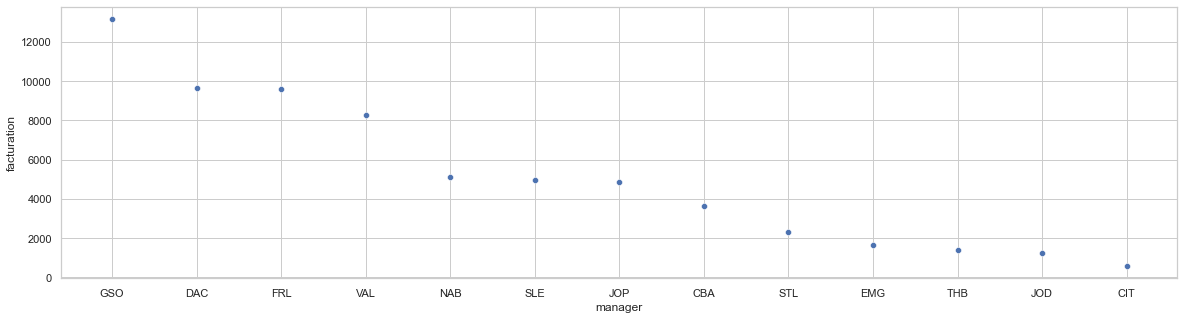

In [112]:
df_cwe = mission2020_mgr[mission2020_mgr['type_mission'] == 'CWE 2020']
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_cwe.sort_values(by='facturation',ascending=False))   
plt.show()

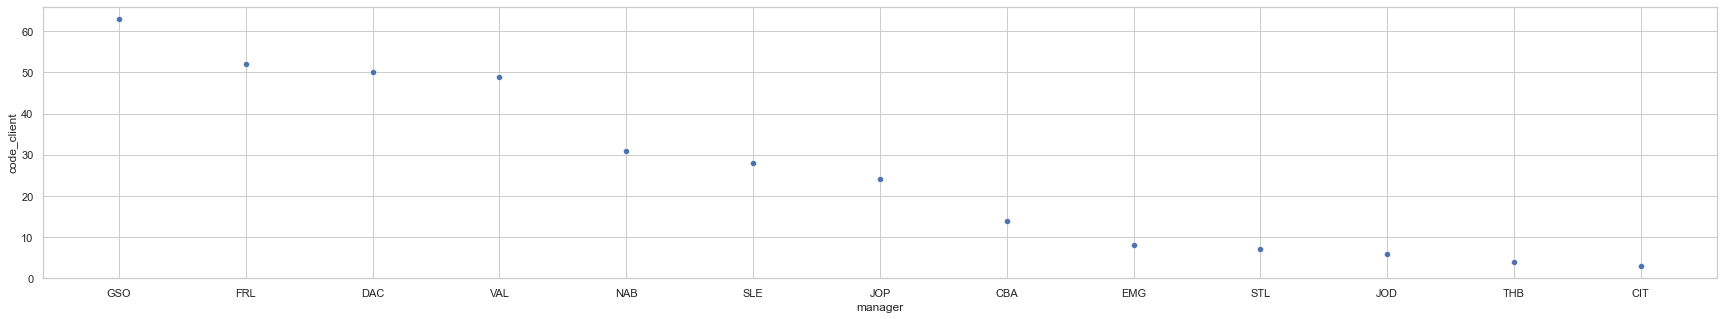

In [113]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_mgr[dossiers_mgr['type_mission'] == 'CWE 2020'].sort_values(by='code_client', ascending=False))   
plt.show()

In [114]:
df_cwe_asc = df_cwe.sort_values(by='boni-mali', ascending=False)

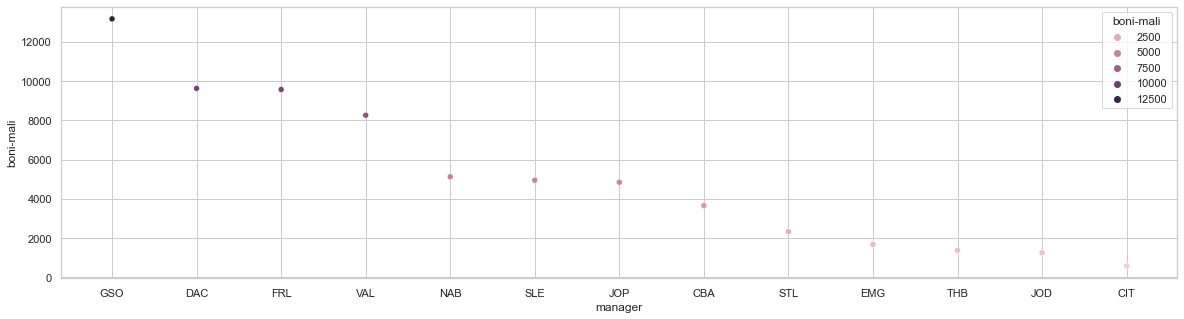

In [115]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_cwe_asc)   
plt.show()

In [116]:
df_cwe_asc.corr()

valorisation_temps  facturation  fact-pr  boni-mali  temps
valorisation_temps                 NaN          NaN      NaN        NaN    NaN
facturation                        NaN          1.0      1.0        1.0    NaN
fact-pr                            NaN          1.0      1.0        1.0    NaN
boni-mali                          NaN          1.0      1.0        1.0    NaN
temps                              NaN          NaN      NaN        NaN    NaN

Aucun mali, le boni est bien déterminé par le chiffre d'affaires

#### ~ Analyse sur les types de missions exceptionnelles :

In [117]:
#Extraire tous les types de missions exceptionnelles
missions_exceps = mission2020_mgr[(mission2020_mgr['type_mission'] == 'GE0 2020')|(mission2020_mgr['type_mission'] == 'GE1 2020')
                |(mission2020_mgr['type_mission'] == 'GE2 2020')|(mission2020_mgr['type_mission'] == 'GE3 2020')
                |(mission2020_mgr['type_mission'] == 'GEJ 2020')|(mission2020_mgr['type_mission'] == 'GEP 2020')
                |(mission2020_mgr['type_mission'] == 'GJ0 2020')|(mission2020_mgr['type_mission'] == 'GJ1 2020')
                |(mission2020_mgr['type_mission'] == 'GS0 2020')|(mission2020_mgr['type_mission'] == 'GS1 2020')
                |(mission2020_mgr['type_mission'] == 'GS3 2020')]

In [118]:
missions_exceps

type_mission manager  valorisation_temps  facturation   fact-pr  \
41      GE0 2020     CBA            63755.60     47120.13  47120.13   
42      GE0 2020     CHB             2260.00      2200.00   2200.00   
43      GE0 2020     CIT             1325.38      2377.20   2377.20   
44      GE0 2020     DAC            32508.42     30517.33  30517.33   
45      GE0 2020     EMG            67578.83     87372.00  87372.00   
..           ...     ...                 ...          ...       ...   
155     GS3 2020     NAB             2810.79      5075.00   5075.00   
156     GS3 2020     SLE            12797.61     16145.00  16145.00   
157     GS3 2020     STL             2096.64      4010.00   4010.00   
158     GS3 2020     THB             1819.88      3555.00   3555.00   
159     GS3 2020     VAL             6985.91     12830.00  12830.00   

     boni-mali   temps  
41   -16635.47  702.20  
42      -60.00   13.75  
43     1051.82   15.75  
44    -1991.09  313.37  
45    19793.17  766.50  
..         ...     ...  
155    2264.21   34.00  
156    3347.39  157.75  
157    1913.36   32.25  
158    1735.12   28.25  
159    5844.09   80.75  

[112 rows x 7 columns]

In [119]:
#Regrouper par manager
df_exc = missions_exceps.groupby(['manager']).sum()

In [120]:
df_exc.describe()

valorisation_temps    facturation        fact-pr     boni-mali  \
count           15.000000      15.000000      15.000000     15.000000   
mean         91435.417333  106089.454000  106089.454000  14654.036667   
std          62401.283084   78115.620082   78115.620082  22230.788203   
min           2260.000000    2200.000000    2200.000000 -20212.110000   
25%          48781.560000   52117.935000   52117.935000   2126.205000   
50%          91030.520000  105377.000000  105377.000000   7613.070000   
75%         133389.780000  145939.295000  145939.295000  22654.190000   
max         191030.090000  263240.440000  263240.440000  72451.120000   

             temps  
count    15.000000  
mean    987.389333  
std     677.298948  
min      13.750000  
25%     523.025000  
50%    1069.750000  
75%    1350.860000  
max    2205.750000

A l'inverse de notre dataset initial, il semble que les missions exceptionnelles soient beaucoup plus lucratives pour le cabinet (moyenne du boni à 14 654 €) sur l'ensemble des managers.

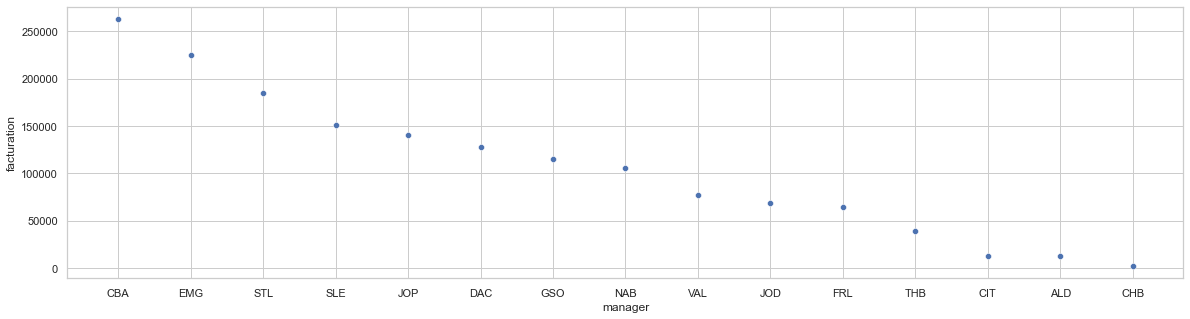

In [121]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_exc.sort_values(by='facturation',ascending=False))   
plt.show()

In [122]:
dossiers_excep = dossiers_mgr[(dossiers_mgr['type_mission'] == 'GE0 2020')|(dossiers_mgr['type_mission'] == 'GE1 2020')
                |(dossiers_mgr['type_mission'] == 'GE2 2020')|(dossiers_mgr['type_mission'] == 'GE3 2020')
                |(dossiers_mgr['type_mission'] == 'GEJ 2020')|(dossiers_mgr['type_mission'] == 'GEP 2020')
                |(dossiers_mgr['type_mission'] == 'GJ0 2020')|(dossiers_mgr['type_mission'] == 'GJ1 2020')
                |(dossiers_mgr['type_mission'] == 'GS0 2020')|(dossiers_mgr['type_mission'] == 'GS1 2020')
                |(dossiers_mgr['type_mission'] == 'GS3 2020')|(dossiers_mgr['type_mission'] == 'TB 2020')].sort_values(by='code_client', ascending=False)

In [123]:
dossiers_excep

type_mission manager  code_client  libelle_mission
76      GEJ 2020     SLE           85               85
45      GE0 2020     EMG           73               73
72      GEJ 2020     GSO           69               69
69      GEJ 2020     DAC           65               65
70      GEJ 2020     EMG           65               65
..           ...     ...          ...              ...
103     GJ0 2020     STL            1                1
108     GJ1 2020     GSO            1                1
109     GJ1 2020     JOD            1                1
111     GJ1 2020     NAB            1                1
226      TB 2020     SLE            1                1

[116 rows x 4 columns]

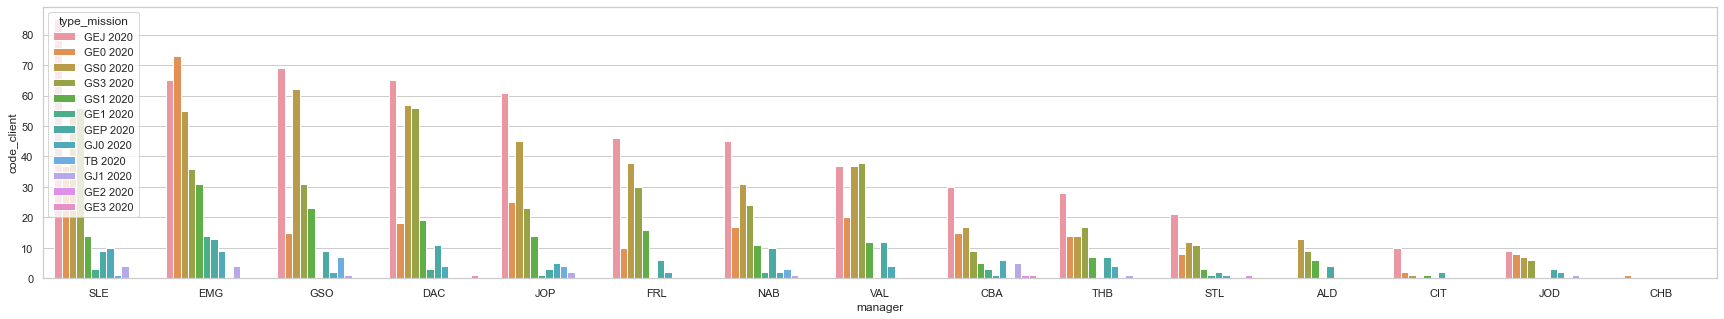

In [124]:
fig=plt.figure(figsize=(30,5))
ax = sns.barplot(x="manager", y="code_client", hue="type_mission", data=dossiers_excep)   
plt.show()

Les dossiers exceptionnels de gestion juridique restent en majorité parmi l'ensemble des dossiers exceptionnels pour chacun des managers sur 2020
Ensuite GS0 sur l'embauche et vie des contrats de travail ainsi sur que les missions d'accompagnement fiscal : Accompagnement / fiscal / IRPP (déclarations impôts sur le revenu) sont les plus fréquentes

In [125]:
#dossiers_excep.groupby(['manager']).sum().sort_values(by='code_client', ascending=False)

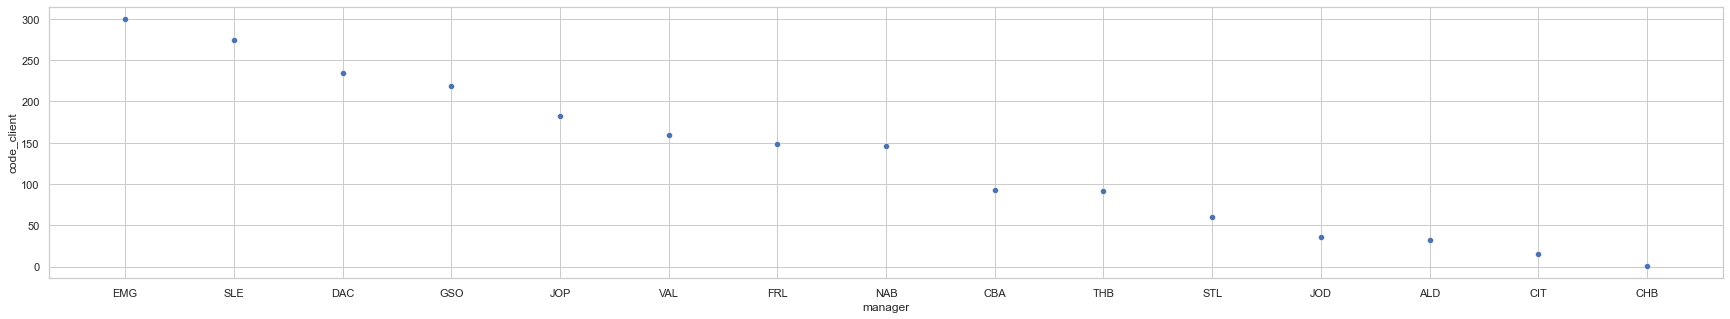

In [126]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_excep.groupby(['manager']).sum().sort_values(by='code_client', ascending=False))   
plt.show()

In [127]:
df_exc_asc = df_exc.sort_values(by='boni-mali', ascending=False)

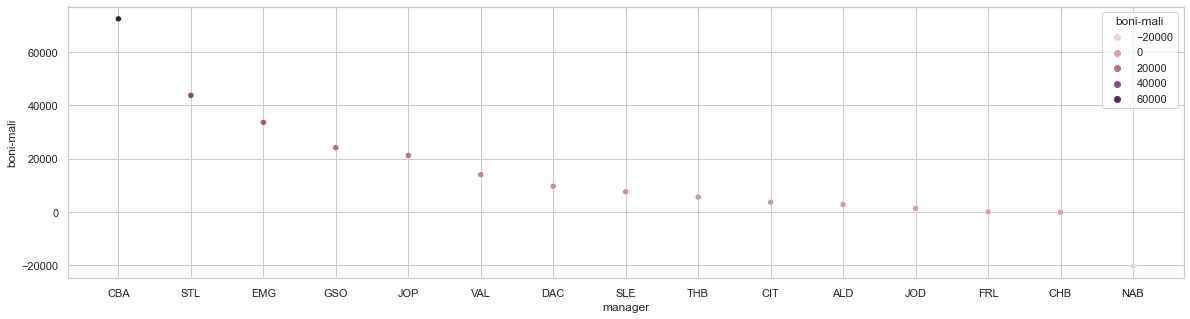

In [128]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_exc_asc)   
plt.show()

Il n'y a que le manager NAB qui soit en mali sur 2020

#### ~ Analyse sur les missions juridiques :

In [129]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'JUR 2020']

type_mission manager  valorisation_temps  facturation    fact-pr  \
167     JUR 2020     CBA            24863.70     36035.00   36035.00   
168     JUR 2020     CHB              166.75         0.00       0.00   
169     JUR 2020     CIT             4455.53      5500.00    5500.00   
170     JUR 2020     DAC            81141.41    108242.50  108242.50   
171     JUR 2020     EMG            67222.00    106232.20  106232.20   
172     JUR 2020     FRL            54451.52     76345.00   76345.00   
173     JUR 2020     GSO            50331.82     92555.00   92555.00   
174     JUR 2020     JOD             9127.30     11595.00   11595.00   
175     JUR 2020     JOP            42590.50     63427.50   63427.50   
176     JUR 2020     NAB            45935.99     55580.00   55580.00   
177     JUR 2020     SLE            82295.32    112281.12  112281.12   
178     JUR 2020     STL            17982.32     21747.50   21747.50   
179     JUR 2020     THB            26676.48     43085.00   43085.00   
180     JUR 2020     VAL            32477.56     60082.50   60082.50   

     boni-mali    temps  
167   11171.30   335.75  
168    -166.75     2.50  
169    1044.47    58.25  
170   27101.09  1153.62  
171   39010.20   823.50  
172   21893.48   774.25  
173   42223.18   715.75  
174    2467.70   126.50  
175   20837.00   601.00  
176    9644.01   664.25  
177   29985.80  1153.87  
178    3765.18   247.50  
179   16408.52   386.00  
180   27604.94   481.25

In [130]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'JUR 2020'].describe()

valorisation_temps    facturation        fact-pr     boni-mali  \
count           14.000000      14.000000      14.000000     14.000000   
mean         38551.300000   56622.022857   56622.022857  18070.722857   
std          26749.427328   38862.266315   38862.266315  14006.763657   
min            166.750000       0.000000       0.000000   -166.750000   
25%          19702.665000   25319.375000   25319.375000   5234.887500   
50%          37534.030000   57831.250000   57831.250000  18622.760000   
75%          53421.595000   88502.500000   88502.500000  27478.977500   
max          82295.320000  112281.120000  112281.120000  42223.180000   

             temps  
count    14.000000  
mean    537.427857  
std     370.548360  
min       2.500000  
25%     269.562500  
50%     541.125000  
75%     759.625000  
max    1153.870000

- Les missions juridiques sont également des missions assez lucratives avce une moyenne boni de 18 070 € par manager en 2020
- Un chiffre d'affaires en moyenne à 56 622 € sur 2020 par manager
- Temps passé à environ 537 heures par manager

In [131]:
df_jur = mission2020_mgr[mission2020_mgr['type_mission'] == 'JUR 2020']

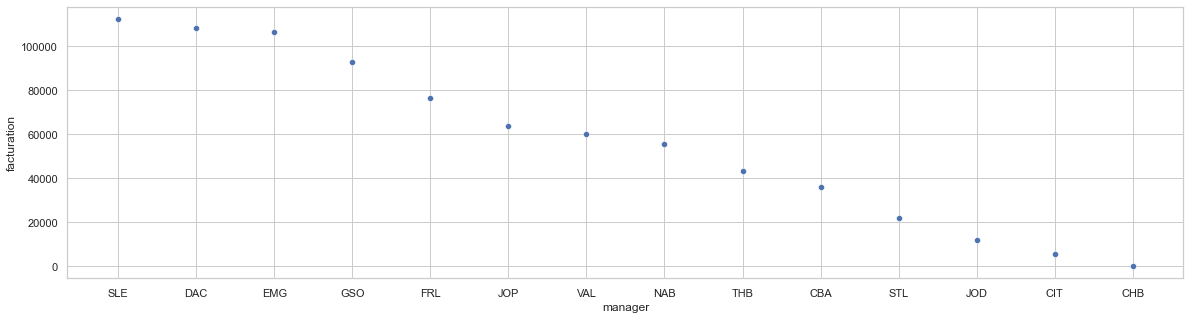

In [132]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_jur.sort_values(by='facturation',ascending=False))   
plt.show()

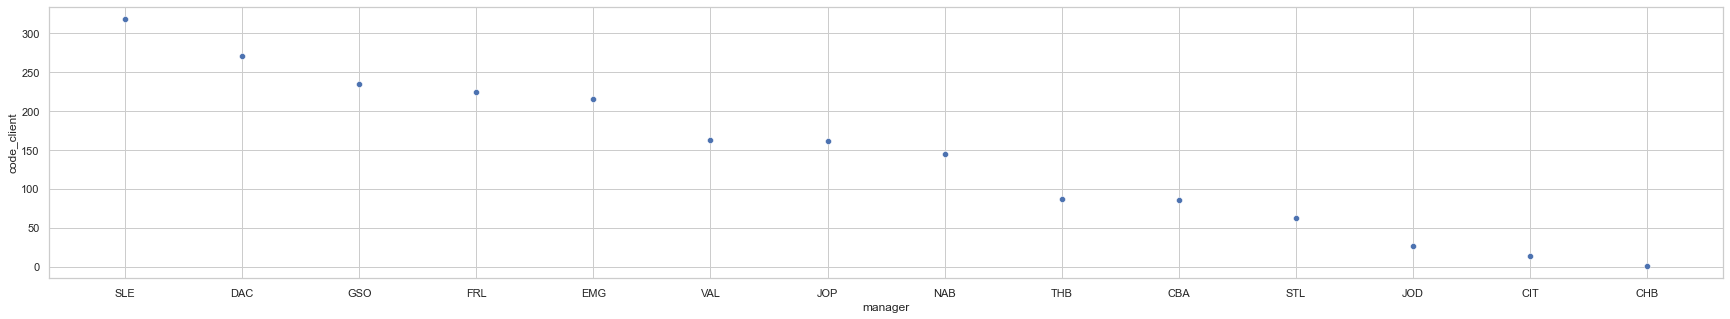

In [133]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_mgr[dossiers_mgr['type_mission'] == 'JUR 2020'].sort_values(by='code_client', ascending=False))   
plt.show()

Le manager EMG a moins de dossiers clients et pourtant un meilleur chiffre d'affaires, idem pour le manager NAB.

In [134]:
df_jur_asc = df_jur.sort_values(by='boni-mali', ascending=False)

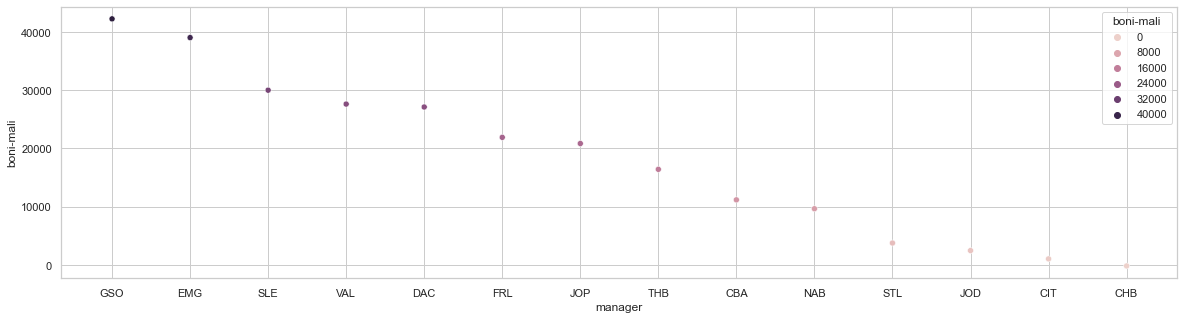

In [135]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_jur_asc)   
plt.show()

Que des dossiers en boni pour les missions juridiques.

#### ~ Analyse sur les missions de paie (autonomie assistée, le client utilise lui-même le logiciel)

In [136]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'POL 2020']

type_mission manager  valorisation_temps  facturation   fact-pr  \
182     POL 2020     ALD            15646.76     10502.00  10502.00   
183     POL 2020     CBA             4070.38      2983.50   2983.50   
184     POL 2020     CIT             3130.75      1461.25   1461.25   
185     POL 2020     DAC            36409.79     27525.75  27525.75   
186     POL 2020     EMG            14481.67      1800.00   1800.00   
187     POL 2020     FRL            12418.27      9000.50   9000.50   
188     POL 2020     GSO            29808.38     21915.11  21915.11   
189     POL 2020     JOP             8348.63      6649.75   6649.75   
190     POL 2020     NAB            10692.78      7188.64   7188.64   
191     POL 2020     SLE             8830.51      6226.50   6226.50   
192     POL 2020     STL            12183.30      5950.30   5950.30   
193     POL 2020     THB              433.13       360.75    360.75   
194     POL 2020     VAL             4393.88      3319.00   3319.00   

     boni-mali   temps  
182   -5144.76   54.50  
183   -1086.88   14.50  
184   -1669.50   21.50  
185   -8884.04  131.25  
186  -12681.67   40.75  
187   -3417.77   46.25  
188   -7893.27  107.75  
189   -1698.88   23.25  
190   -3504.14   44.50  
191   -2604.01   34.00  
192   -6233.00   34.75  
193     -72.38    1.00  
194   -1074.88   15.00

In [137]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'POL 2020'].describe()

valorisation_temps   facturation       fact-pr     boni-mali  \
count           13.000000     13.000000     13.000000     13.000000   
mean         12372.940769   8067.926923   8067.926923  -4305.013846   
std          10364.640380   8054.733073   8054.733073   3710.334174   
min            433.130000    360.750000    360.750000 -12681.670000   
25%           4393.880000   2983.500000   2983.500000  -6233.000000   
50%          10692.780000   6226.500000   6226.500000  -3417.770000   
75%          14481.670000   9000.500000   9000.500000  -1669.500000   
max          36409.790000  27525.750000  27525.750000    -72.380000   

            temps  
count   13.000000  
mean    43.769231  
std     37.063777  
min      1.000000  
25%     21.500000  
50%     34.750000  
75%     46.250000  
max    131.250000

- En 2020, nous avons en moyenne sur les missions de paie externalisée au cabinet, un mali de -4305€.
- Effectivement, le coût du temps pour le cabinet vaut en moyenne 12 373€ sur l'ensemble des dossiers POL des managers alors que la facturation est inférieure, pour une moyenne de 8067 €.

In [138]:
df_pol = mission2020_mgr[mission2020_mgr['type_mission'] == 'POL 2020']

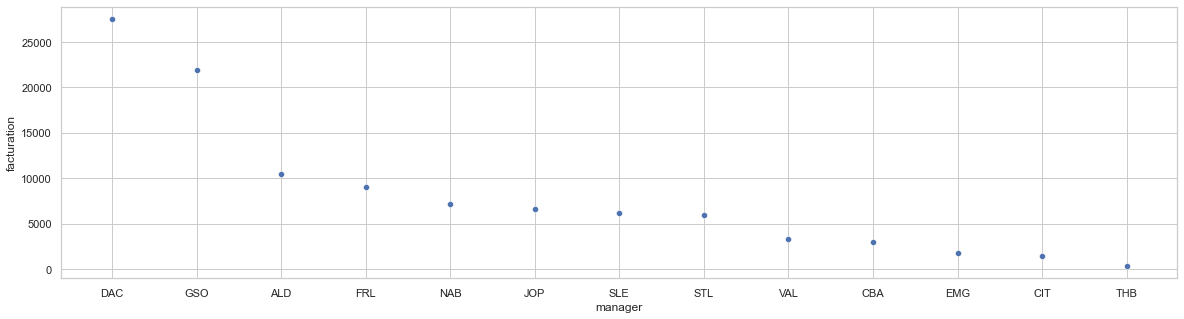

In [139]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_pol.sort_values(by='facturation',ascending=False))   
plt.show()

##### Nombre de dossiers par manager sur les missions de paie autonome :

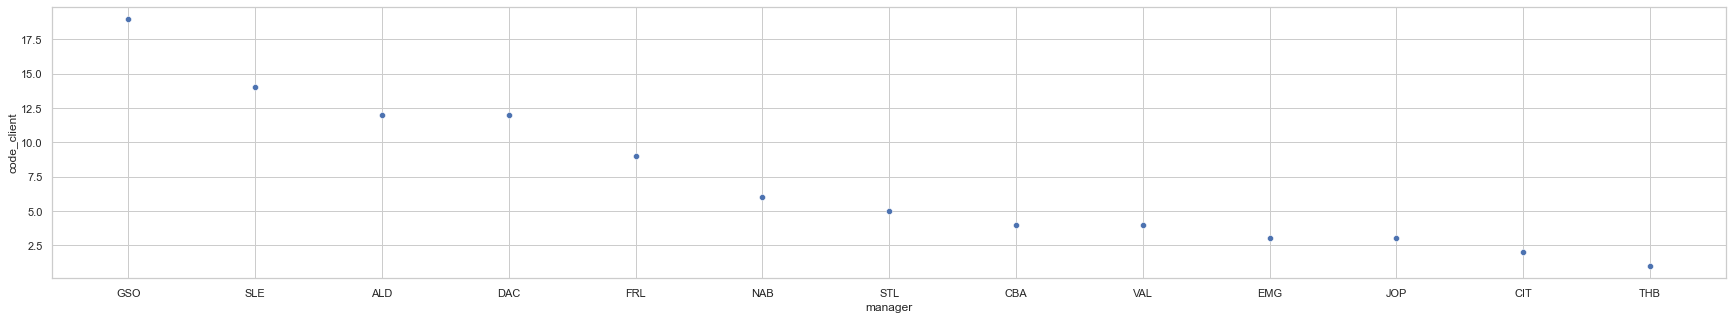

In [140]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_mgr[dossiers_mgr['type_mission'] == 'POL 2020'].sort_values(by='code_client', ascending=False))   
plt.show()

In [141]:
dossiers_mgr[dossiers_mgr['type_mission'] == 'POL 2020'].sort_values(by='code_client', ascending=False)

type_mission manager  code_client  libelle_mission
188     POL 2020     GSO           19               19
191     POL 2020     SLE           14               14
182     POL 2020     ALD           12               12
185     POL 2020     DAC           12               12
187     POL 2020     FRL            9                9
190     POL 2020     NAB            6                6
192     POL 2020     STL            5                5
183     POL 2020     CBA            4                4
194     POL 2020     VAL            4                4
186     POL 2020     EMG            3                3
189     POL 2020     JOP            3                3
184     POL 2020     CIT            2                2
193     POL 2020     THB            1                1

##### Boni-mali par manager sur les missions de paie autonome :

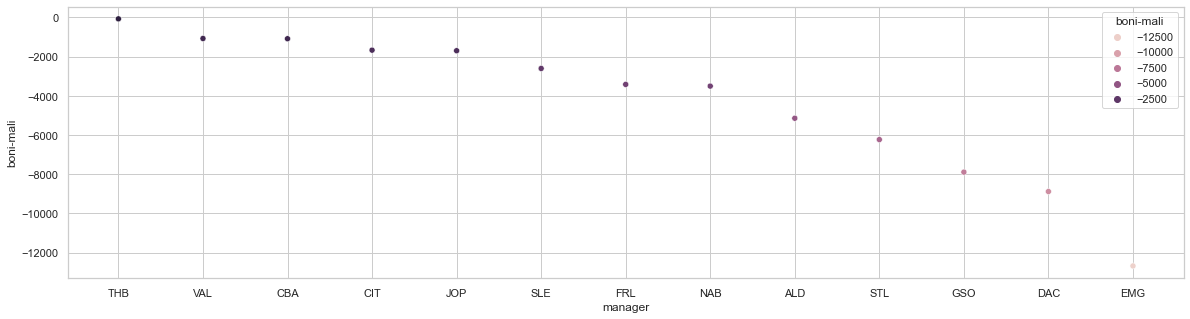

In [142]:
df_pol_asc = df_pol.sort_values(by='boni-mali', ascending=False)

fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_pol_asc)   
plt.show()

Missions POL, que du mali !

#### ~ Analyse sur les missions de déclarations des revenus (SAP)

In [143]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'SAP 2020']

type_mission manager  valorisation_temps  facturation   fact-pr  \
195     SAP 2020     ALD              211.88       445.00    445.00   
196     SAP 2020     CBA            12483.47     11456.60  11456.60   
197     SAP 2020     CIT              498.47       943.40    943.40   
198     SAP 2020     DAC            14703.93     12126.37  12126.37   
199     SAP 2020     EMG             7340.88      8365.80   8365.80   
200     SAP 2020     FRL            22452.68     31808.33  31808.33   
201     SAP 2020     GSO            28839.27     31601.87  31601.87   
202     SAP 2020     JOD             2467.26      1283.20   1283.20   
203     SAP 2020     JOP            28707.78     29919.17  29919.17   
204     SAP 2020     NAB            15635.16     11263.50  11263.50   
205     SAP 2020     SLE            32223.79     33951.77  33951.77   
206     SAP 2020     STL             5491.41      7694.20   7694.20   
207     SAP 2020     THB             5921.50     13859.60  13859.60   
208     SAP 2020     VAL            13601.43     19767.96  19767.96   

     boni-mali   temps  
195     233.12    3.75  
196   -1026.87  155.25  
197     444.93    5.86  
198   -2577.56  164.00  
199    1024.92   70.50  
200    9355.65  240.10  
201    2762.60  344.50  
202   -1184.06   19.55  
203    1211.39  313.00  
204   -4371.66  179.90  
205    1727.98  361.13  
206    2202.79   58.00  
207    7938.10   79.25  
208    6166.53  170.00

In [144]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'SAP 2020'].describe()

valorisation_temps   facturation       fact-pr    boni-mali       temps
count           14.000000     14.000000     14.000000    14.000000   14.000000
mean         13612.779286  15320.483571  15320.483571  1707.704286  154.627857
std          10852.208846  12064.691339  12064.691339  3864.953322  123.189437
min            211.880000    445.000000    445.000000 -4371.660000    3.750000
25%           5598.932500   7862.100000   7862.100000  -711.872500   61.125000
50%          13042.450000  11791.485000  11791.485000  1118.155000  159.625000
75%          20748.300000  27381.367500  27381.367500  2622.647500  225.050000
max          32223.790000  33951.770000  33951.770000  9355.650000  361.130000

- Boni moyen de 1707 € sur l'ensemble des managers
- Chiffres d'affaires moyen de 15 320 € sur l'ensemble des managers
- Temps moyen passé de 154 heures sur l'ensemble des managers

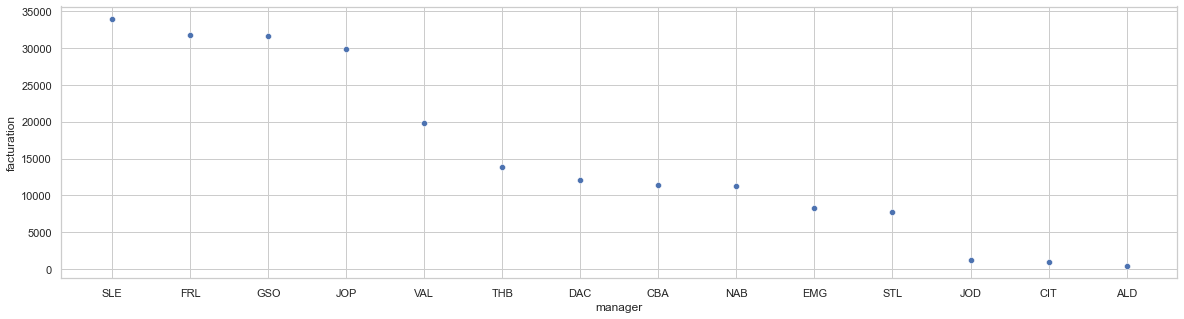

In [145]:
df_sap = mission2020_mgr[mission2020_mgr['type_mission'] == 'SAP 2020']

fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_sap.sort_values(by='facturation',ascending=False))   
plt.show()

##### Nombre de dossiers par manager sur les missions de déclaration des revenus :

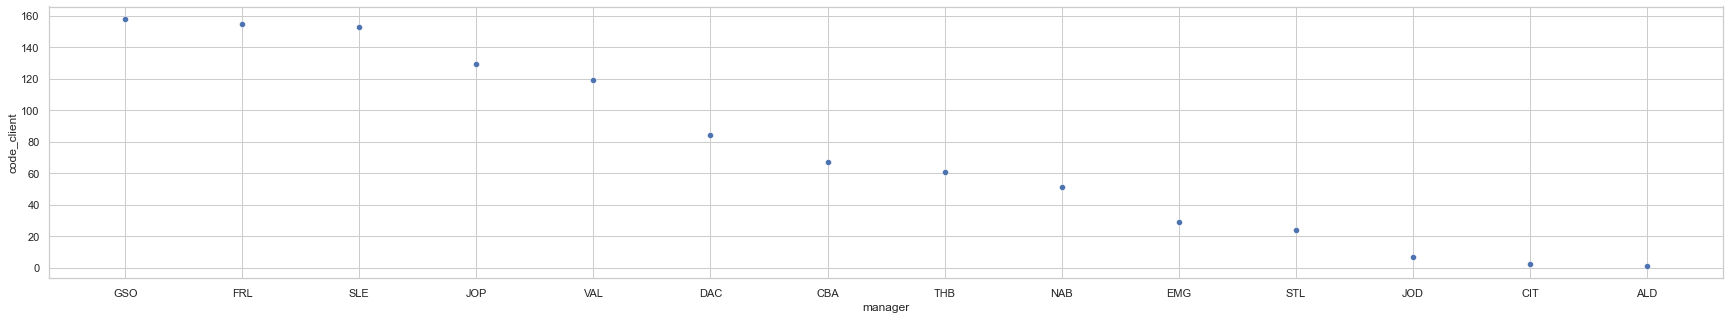

In [146]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_mgr[dossiers_mgr['type_mission'] == 'SAP 2020'].sort_values(by='code_client', ascending=False))   
plt.show()

##### Boni-mali par manager sur les missions de déclaration des revenus 2020 :

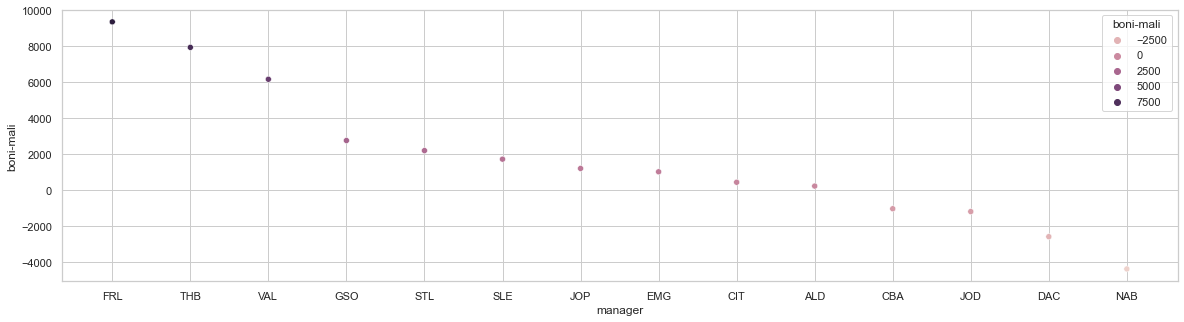

In [147]:
df_sap_asc = df_sap.sort_values(by='boni-mali', ascending=False)

fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_sap_asc)   
plt.show()

#### ~ Analyse sur les missions de paie externalisée (Social paie)

In [148]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'SOP 2020']

type_mission manager  valorisation_temps  facturation    fact-pr  \
209     SOP 2020     ALD           126128.70     75034.00   75034.00   
210     SOP 2020     CBA           115496.10     64485.00   64485.00   
211     SOP 2020     CIT            22128.13     10479.00   10479.00   
212     SOP 2020     DAC           424948.50    231196.00  231196.00   
213     SOP 2020     EMG           723427.17    288734.08  288734.08   
214     SOP 2020     FRL           304036.44    168392.00  168392.00   
215     SOP 2020     GSO           501246.20    279437.00  279437.00   
216     SOP 2020     JOD            49413.28     26696.50   26696.50   
217     SOP 2020     JOP           291225.52    161962.00  161962.00   
218     SOP 2020     NAB           267936.68    151072.75  151072.75   
219     SOP 2020     SLE           535824.44    300623.50  300623.50   
220     SOP 2020     STL           251806.84    145297.50  145297.50   
221     SOP 2020     THB           198634.40    104022.00  104022.00   
222     SOP 2020     VAL           329517.21    180465.50  180465.50   

     boni-mali    temps  
209  -51094.70   696.80  
210  -51011.10   743.75  
211  -11649.13   157.75  
212 -193752.50  2785.70  
213 -434693.09  4280.32  
214 -135644.44  1945.33  
215 -221809.20  3155.10  
216  -22716.78   308.35  
217 -129263.52  1818.88  
218 -116863.93  1733.13  
219 -235200.94  3368.70  
220 -106509.34  1547.30  
221  -94612.40  1285.43  
222 -149051.71  2154.55

In [149]:
mission2020_mgr[mission2020_mgr['type_mission'] == 'SOP 2020'].describe()

valorisation_temps    facturation        fact-pr      boni-mali  \
count           14.000000      14.000000      14.000000      14.000000   
mean        295840.686429  156278.345000  156278.345000 -139562.341429   
std         197998.303708   94412.672708   94412.672708  109359.048710   
min          22128.130000   10479.000000   10479.000000 -434693.090000   
25%         144255.125000   82281.000000   82281.000000 -182577.302500   
50%         279581.100000  156517.375000  156517.375000 -123063.725000   
75%         401090.677500  218513.375000  218513.375000  -61974.125000   
max         723427.170000  300623.500000  300623.500000  -11649.130000   

             temps  
count    14.000000  
mean   1855.792143  
std    1212.503514  
min     157.750000  
25%     879.170000  
50%    1776.005000  
75%    2627.912500  
max    4280.320000

- Mali moyen de -139 562 sur l'ensemble des managers
- Il s'agit de missions qui prennent beaucoup de temps et sont coûteuses, pour autant la facturation ne comble pas cette valorisation du temps

In [150]:
df_sop = mission2020_mgr[mission2020_mgr['type_mission'] == 'SOP 2020']

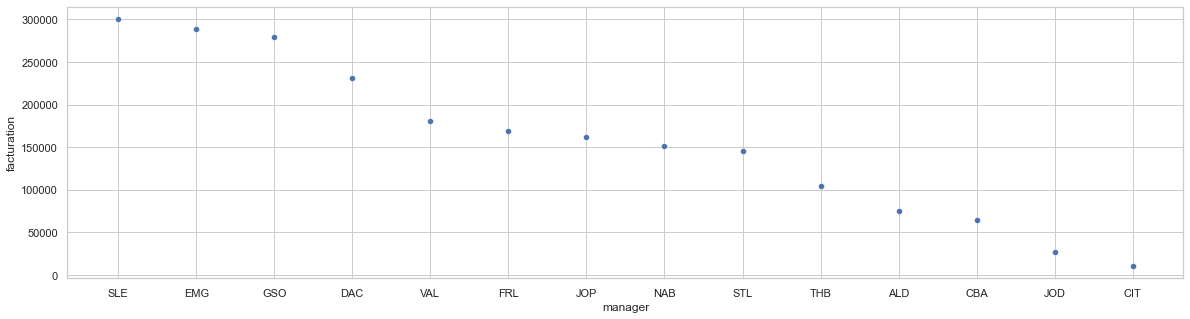

In [151]:
fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="facturation", data=df_sop.sort_values(by='facturation',ascending=False))   
plt.show()

Le chiffre d'affaires est très élevé pour les missions de paie externalisée
Effectivement le temps passé par l'ensemble des managers équivalait en moyenne à 1855h par mission de paie externalisée en 2020, ce qui doit expliquer la facturation plus importante.

#### Nombre de dossiers par manager sur 2020 sur les missions de paie externalisée

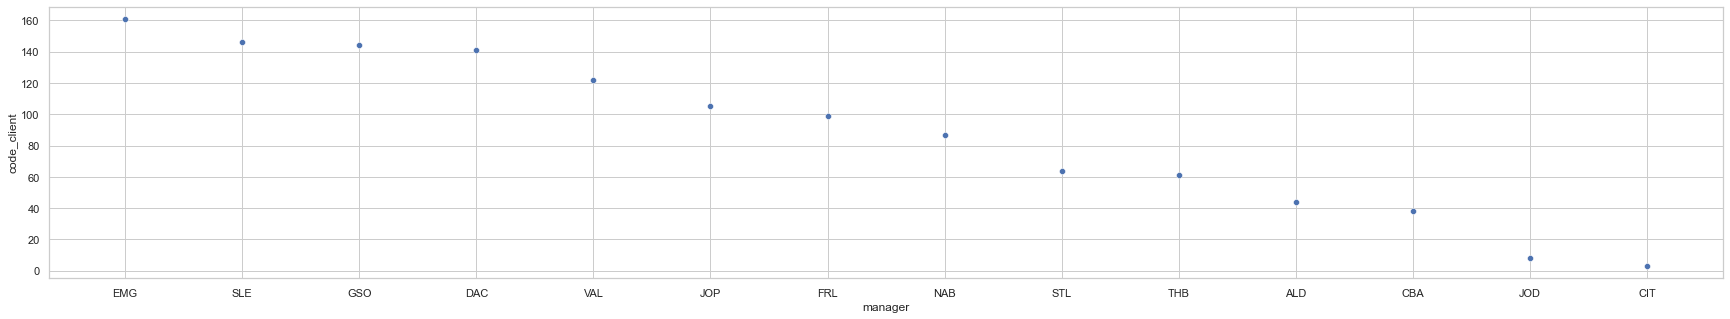

In [152]:
fig=plt.figure(figsize=(30,5))
ax = sns.scatterplot(x="manager", y="code_client", data=dossiers_mgr[dossiers_mgr['type_mission'] == 'SOP 2020'].sort_values(by='code_client', ascending=False))   
plt.show()

#### Boni-Mali par manager sur 2020 sur les missions de paie externalisée

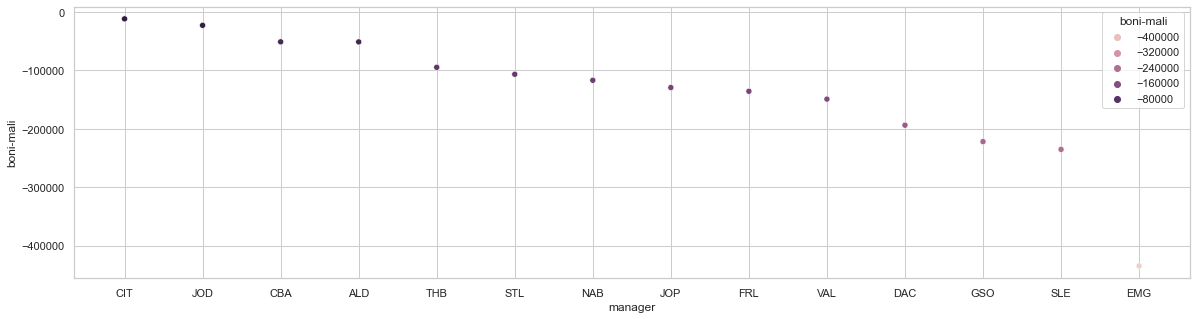

In [153]:
df_sop_asc = df_sop.sort_values(by='boni-mali', ascending=False)

fig=plt.figure(figsize=(20,5))
ax = sns.scatterplot(x="manager", y="boni-mali", hue="boni-mali", data=df_sop_asc)   
plt.show()

Cela confirme que pour chaque manager, les missions de paie externalisée sont en mali

Peu de dossiers et peu de managers sur cette mission de tableau de bord, il doit s'agir d'une mission également qui fait mesure d'exception par le cabinet.

### Nombre d'assistants moyen par manager sur les années

In [154]:
# Trouver le nombre d'assistants en moyenne par manager et par année en fonction du type de mission ainsi que le nombre de dossiers par type de mission
df_assmoyen = df.groupby(['exercice','type_mission','manager']).agg({'total_assistant':'mean', 'code_article':'count'})

In [155]:
df_assmoyen.reset_index(inplace=True)

In [156]:
#df_assmoyen[df_assmoyen['exercice'] == 2017].sort_values(by='type_mission').head(50)

In [157]:
#Vérification : 117 missions COM réalisées par l'équipe du manager CBA en 2017
df[(df['type_mission'] == 'COM') & (df['manager'] == 'CBA') & (df['exercice'] == 2017)]

code_mission type_mission  exercice code_client  total_assistant  \
41    ACOM2017008059200          COM      2017       77246              4.0   
87    ACOM2017008075400          COM      2017        4404             10.0   
88    ACOM2017008075500          COM      2017        4405              7.0   
95    ACOM2017008076200          COM      2017        4908              7.0   
121   ACOM2017008079600          COM      2017        5755              6.0   
...                 ...          ...       ...         ...              ...   
3502  ACOM2017011024100          COM      2017       A0820              6.0   
3520  ACOM2017011419300          COM      2017       A0856              4.0   
3585  ACOM2017011789000          COM      2017       A0730              3.0   
3609  ACOM2017012153400          COM      2017       A1323              4.0   
3611  ACOM2017012615000          COM      2017       A1050              2.0   

     manager                                       code_article  \
41       CBA         ['001', '016', '010', '011', '013', '019']   
87       CBA  ['001', '016', '043', '013', '011', '019', '010']   
88       CBA  ['001', '010', '016', '043', '013', '011', '019']   
95       CBA         ['001', '011', '010', '016', '019', '013']   
121      CBA         ['001', '016', '010', '011', '019', '013']   
...      ...                                                ...   
3502     CBA                ['010', '011', '001', '016', '013']   
3520     CBA  ['010', '001', '011', '019', '012', '013', '016']   
3585     CBA                              ['011', '013', '016']   
3609     CBA                              ['011', '010', '016']   
3611     CBA                              ['013', '010', '011']   

                                        libelle_article  temps  \
41    renseignements client, autres declarations fis...  89.50   
87    renseignements client, autres declarations fis...  89.75   
88    renseignements client, saisie et centralisatio...  66.25   
95    renseignements client, controle et revision, s...  51.75   
121   renseignements client, autres declarations fis...  61.00   
...                                                 ...    ...   
3502  saisie et centralisation, controle et revision...  13.75   
3520  saisie et centralisation, renseignements clien...  34.50   
3585  controle et revision, comptes annuels  et decl...   5.25   
3609  controle et revision, saisie et centralisation...   7.50   
3611  comptes annuels  et declarations fiscales, sai...   3.00   

      valorisation_temps  ... scm  scp  sdf  selarl selas sem  sep  snc  \
41               6684.50  ...   0    0    0       0     0   0    0    0   
87               5030.50  ...   0    0    0       0     0   0    0    0   
88               4649.25  ...   0    0    0       0     0   0    0    0   
95               3161.75  ...   0    0    0       0     0   0    0    0   
121              4587.50  ...   0    0    0       0     0   0    0    0   
...                  ...  ...  ..  ...  ...     ...   ...  ..  ...  ...   
3502              891.75  ...   0    0    0       0     0   0    0    0   
3520             1932.50  ...   0    0    0       0     0   0    0    0   
3585              389.25  ...   0    0    0       0     0   0    0    0   
3609              376.00  ...   0    0    0       0     0   0    0    0   
3611              222.50  ...   0    0    0       0     0   0    0    0   

      Boni-Mali  coût_horaire  
41      2060.50     74.687151  
87      2119.51     56.050139  
88      4465.75     70.177358  
95      2003.25     61.096618  
121     1527.50     75.204918  
...         ...           ...  
3502    -141.75     64.854545  
3520    -522.50     56.014493  
3585     185.75     74.142857  
3609    -156.00     50.133333  
3611     257.50     74.166667  

[117 rows x 199 columns]

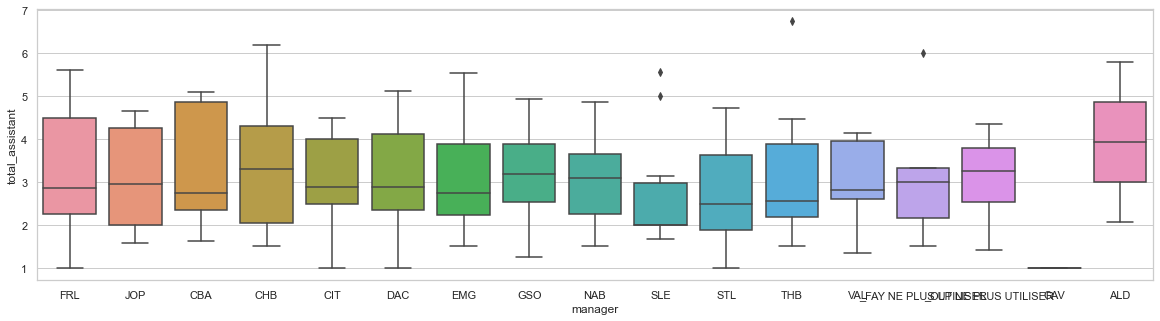

In [158]:
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[df_assmoyen['exercice'] == 2017])   
plt.show()

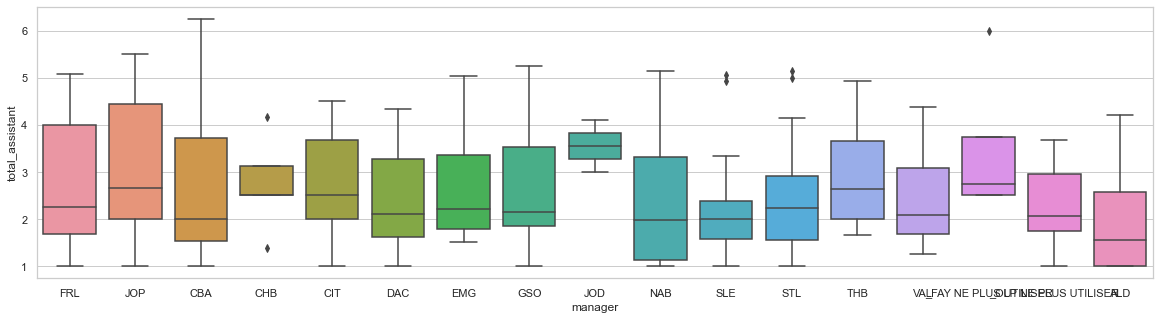

In [159]:
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[df_assmoyen['exercice'] == 2018])   
plt.show()

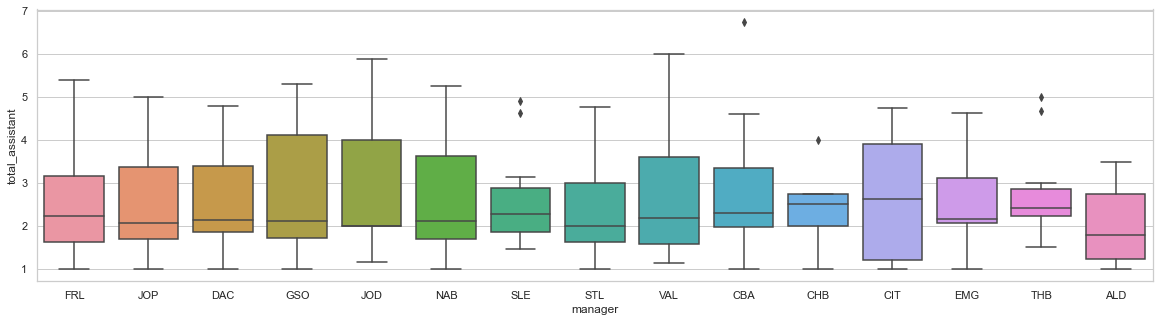

In [160]:
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[df_assmoyen['exercice'] == 2019])   
plt.show()

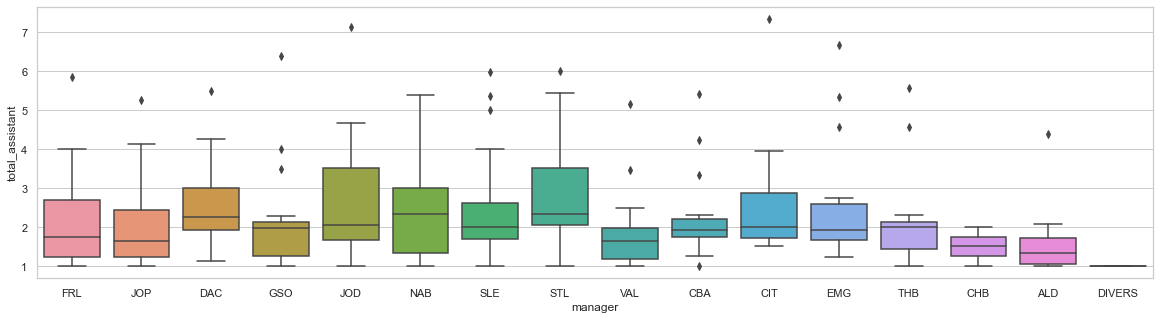

In [161]:
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[df_assmoyen['exercice'] == 2020])   
plt.show()

#### Nombre d'assistants moyen par manager chaque année sur les missions classiques uniquement

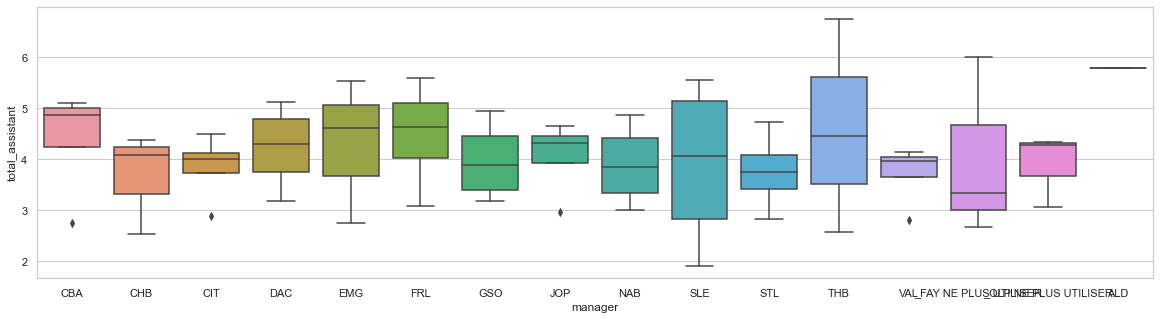

In [162]:
#En 2017
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[(df_assmoyen['exercice'] == 2017) & ((df_assmoyen['type_mission'] == "COM") | (df_assmoyen['type_mission'] == "JUR") | (df_assmoyen['type_mission'] == "CAC") | (df_assmoyen['type_mission'] == "CWE") | (df_assmoyen['type_mission'] == "POL") | (df_assmoyen['type_mission'] == "SAP") | (df_assmoyen['type_mission'] == "SOP"))])  
plt.show()

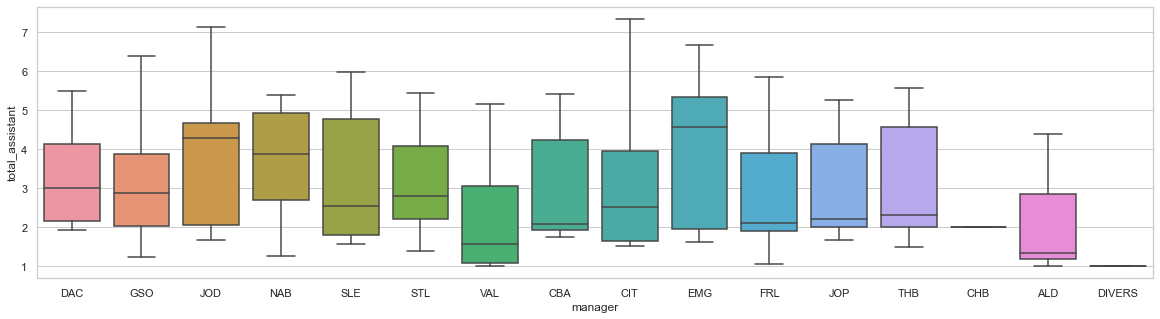

In [163]:
#En 2020
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[(df_assmoyen['exercice'] == 2020) & ((df_assmoyen['type_mission'] == "COM") | (df_assmoyen['type_mission'] == "JUR") | (df_assmoyen['type_mission'] == "CAC") | (df_assmoyen['type_mission'] == "CWE") | (df_assmoyen['type_mission'] == "POL") | (df_assmoyen['type_mission'] == "SAP") | (df_assmoyen['type_mission'] == "SOP"))])  
plt.show()

#### Nombre d'assistants moyen par manager chaque année sur les missions exceptionnelles uniquement

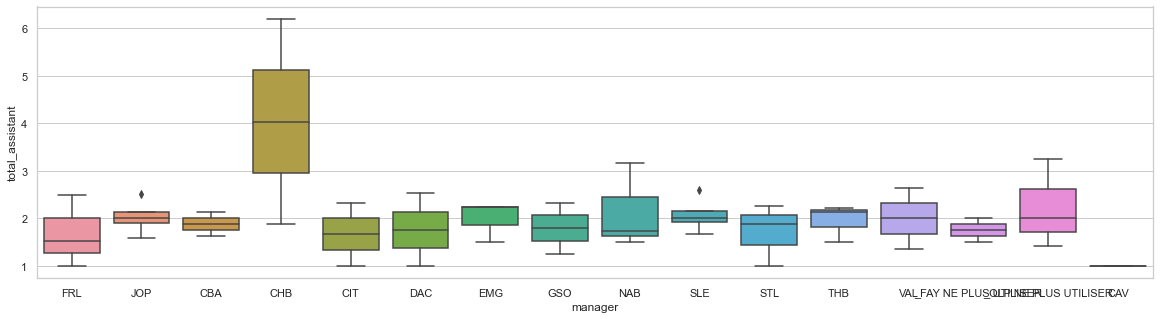

In [164]:
#En 2017
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[(df_assmoyen['exercice'] == 2017) & ((df_assmoyen['type_mission'] == "AGS") | (df_assmoyen['type_mission'] == "GE0") | (df_assmoyen['type_mission'] == "GEC") | (df_assmoyen['type_mission'] == "GE1") | (df_assmoyen['type_mission'] == "GEJ") | (df_assmoyen['type_mission'] == "GEP") | (df_assmoyen['type_mission'] == "GJ0") | (df_assmoyen['type_mission'] == "GJ1") | (df_assmoyen['type_mission'] == "GS0") | (df_assmoyen['type_mission'] == "TB"))])  
plt.show()

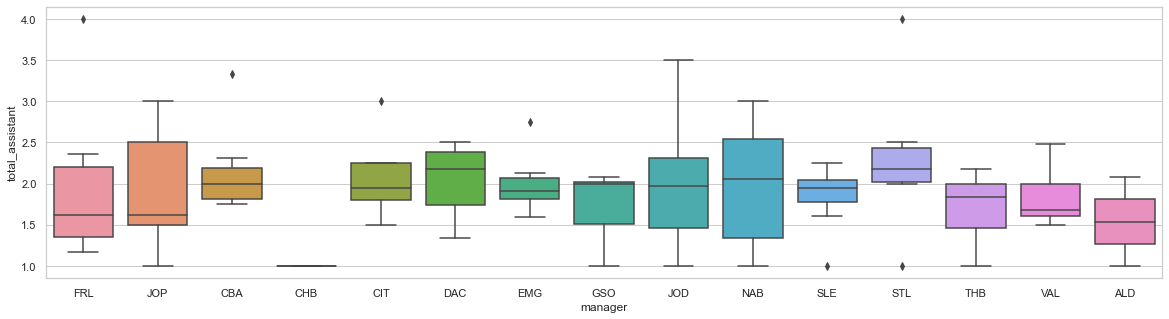

In [165]:
#En 2020
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="total_assistant", data=df_assmoyen[(df_assmoyen['exercice'] == 2020) & ((df_assmoyen['type_mission'] == "AGS") | (df_assmoyen['type_mission'] == "GE0") | (df_assmoyen['type_mission'] == "GEC") | (df_assmoyen['type_mission'] == "GE1") | (df_assmoyen['type_mission'] == "GEJ") | (df_assmoyen['type_mission'] == "GEP") | (df_assmoyen['type_mission'] == "GJ0") | (df_assmoyen['type_mission'] == "GJ1") | (df_assmoyen['type_mission'] == "GS0") | (df_assmoyen['type_mission'] == "TB"))])  
plt.show()

Il y a clairement des équipes moins grandes dans le cas de type de missions exceptionnelles que classiques

#### Nombre de dossiers par manager chaque année :

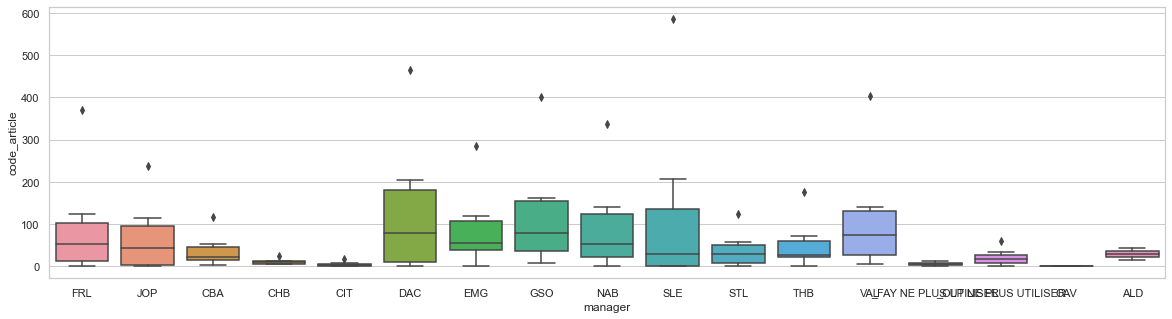

In [166]:
#En 2017, tout type de mission confondus
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="code_article", data=df_assmoyen[df_assmoyen['exercice'] == 2017])
plt.show()

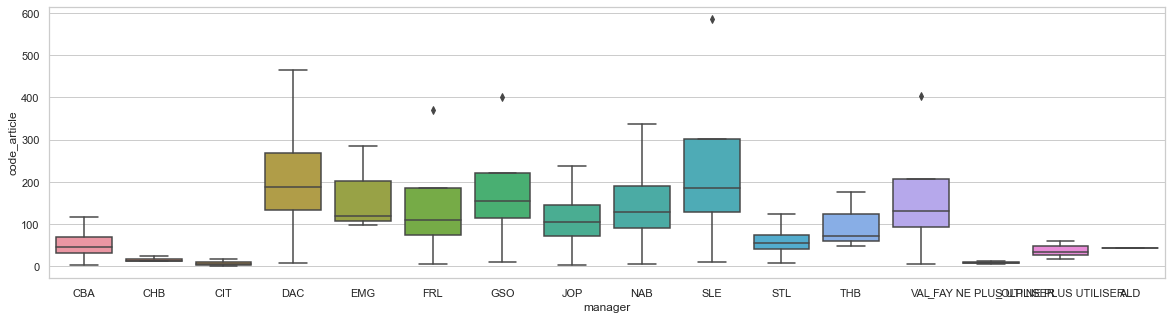

In [167]:
#En 2017, missions classiques
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="code_article", data=df_assmoyen[(df_assmoyen['exercice'] == 2017) & ((df_assmoyen['type_mission'] == "COM") | (df_assmoyen['type_mission'] == "JUR") | (df_assmoyen['type_mission'] == "CAC") | (df_assmoyen['type_mission'] == "CWE") | (df_assmoyen['type_mission'] == "POL") | (df_assmoyen['type_mission'] == "SAP") | (df_assmoyen['type_mission'] == "SOP"))])  
plt.show()

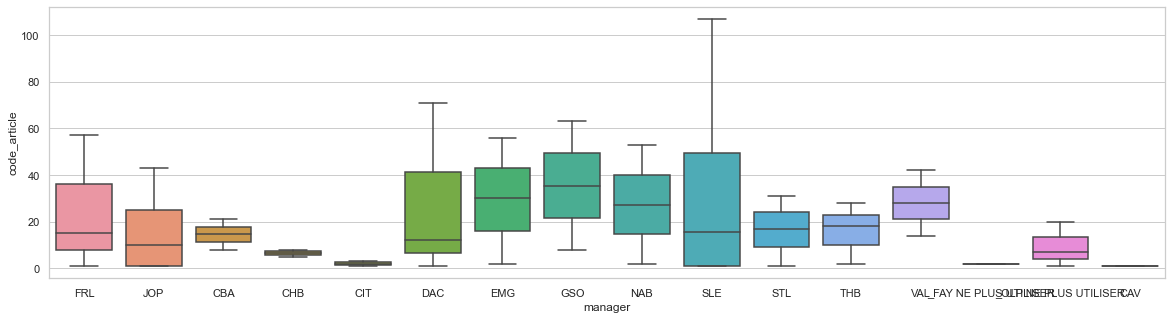

In [168]:
#En 2017, missions exceptionnelles
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="manager", y="code_article", data=df_assmoyen[(df_assmoyen['exercice'] == 2017) & ((df_assmoyen['type_mission'] == "AGS") | (df_assmoyen['type_mission'] == "GE0") | (df_assmoyen['type_mission'] == "GEC") | (df_assmoyen['type_mission'] == "GE1") | (df_assmoyen['type_mission'] == "GEJ") | (df_assmoyen['type_mission'] == "GEP") | (df_assmoyen['type_mission'] == "GJ0") | (df_assmoyen['type_mission'] == "GJ1") | (df_assmoyen['type_mission'] == "GS0") | (df_assmoyen['type_mission'] == "TB"))])  
plt.show()

### Analyse des Entrées et Sorties des clients par manager par année

In [169]:
df.columns[8:15]

Index(['temps', 'valorisation_temps', 'site', 'facturation', 'entrée_clt',
       'sortie_clt', 'secteur'],
      dtype='object')

In [59]:
df.entrée_clt.head()

0    0
1    0
2    0
3    0
4    0
Name: entrée_clt, dtype: int64

In [60]:
df_turnover = df.groupby(['exercice','code_client','manager']).agg({'entrée_clt':[lambda x:x.value_counts().index[0]], 'sortie_clt':[lambda x:x.value_counts().index[0]]})

In [61]:
df_turnover.reset_index(inplace=True)

In [70]:
df_turnoversum.head(50)

exercice                manager  entrée  sortie
0       2017                    ALD      11       0
1       2017                    CAV       1       0
2       2017                    CBA       6       1
3       2017                    CHB       3      17
4       2017                    CIT       0       1
5       2017                    DAC      37      33
6       2017                    EMG      28      39
7       2017                    FRL      18      22
8       2017                    GSO      30      35
9       2017                    JOP      23      21
10      2017                    NAB      42      38
11      2017                    SLE      54      35
12      2017                    STL      13      28
13      2017                    THB       9       2
14      2017                    VAL      30      36
15      2017  _FAY NE PLUS UTILISER       0      12
16      2017  _OLP NE PLUS UTILISER       6      52
17      2018                    ALD      19       0
18      2018                    CBA      12       7
19      2018                    CHB       0       6
20      2018                    CIT       0       1
21      2018                    DAC      41      48
22      2018                    EMG      33      34
23      2018                    FRL      24      20
24      2018                    GSO      44      45
25      2018                    JOD       8       0
26      2018                    JOP      34      22
27      2018                    NAB      21      42
28      2018                    SLE      39      45
29      2018                    STL      11      26
30      2018                    THB      15       2
31      2018                    VAL      28      29
32      2018  _FAY NE PLUS UTILISER       0       0
33      2018  _OLP NE PLUS UTILISER       0       0
34      2019                    ALD      23       0
35      2019                    CBA       8      11
36      2019                    CHB       1       2
37      2019                    CIT       0       2
38      2019                    DAC      40      35
39      2019                    EMG     237      58
40      2019                    FRL      20      21
41      2019                    GSO      40      21
42      2019                    JOD      39       3
43      2019                    JOP      30      28
44      2019                    NAB      42      36
45      2019                    SLE      40      48
46      2019                    STL       8       9
47      2019                    THB      12       7
48      2019                    VAL      34      33
49      2020                    ALD       9       4

In [62]:
df_turnoversum = df_turnover.groupby(['exercice','manager']).sum()

C:\Users\tweet\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [63]:
df_turnoversum.reset_index(inplace=True)

In [64]:
df_turnoversum.columns = ['exercice','manager','entrée','sortie']

In [71]:
df_turnoversum.to_csv("./Data/df-turnover.csv", index=False)

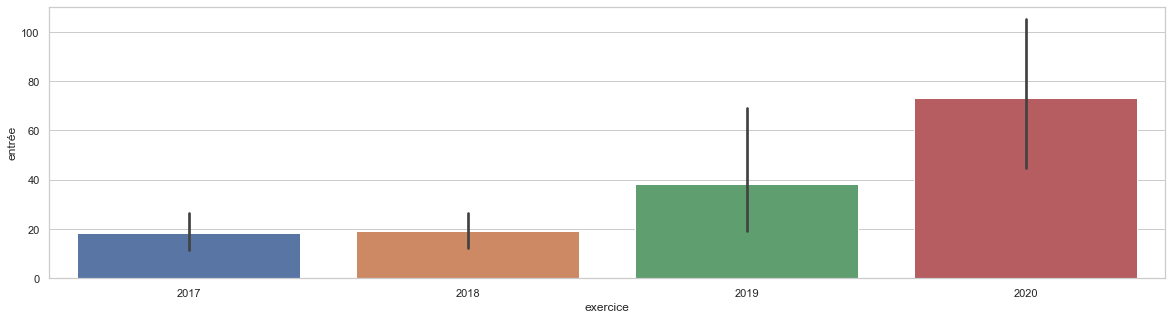

In [176]:
#Entrées des clients par année
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="exercice", y="entrée", data=df_turnoversum.sort_values(by='entrée', ascending=False))
plt.show()

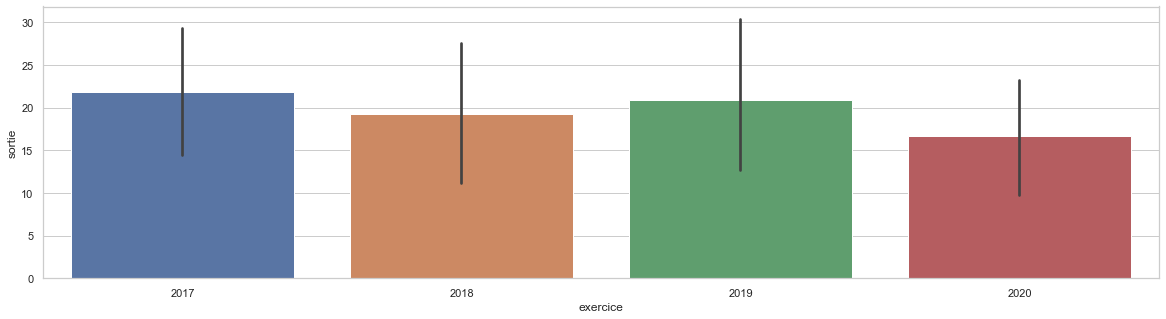

In [229]:
#Sorties des clients par année
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="exercice", y="sortie", data=df_turnoversum.sort_values(by='sortie', ascending=False))
plt.show()

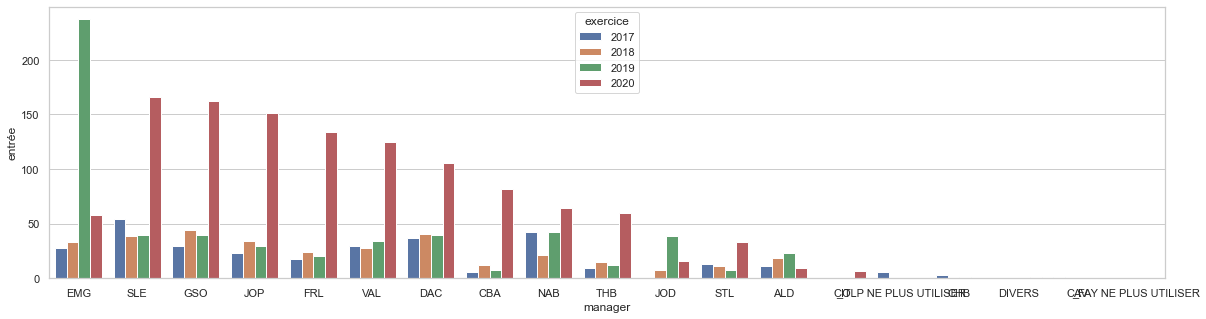

In [178]:
#Entrées des clients par manager et par année
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="manager", y="entrée", hue='exercice', data=df_turnoversum.sort_values(by='entrée', ascending=False))
plt.show()

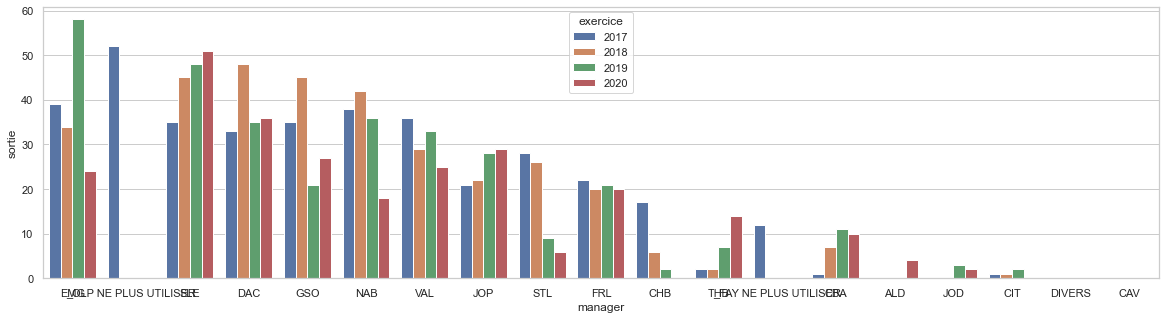

In [179]:
#Sorties des clients par manager et par année
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="manager", y="sortie", hue='exercice', data=df_turnoversum.sort_values(by='sortie', ascending=False))
plt.show()

### Analyse des activités par année

In [180]:
activites_dict2017 = {element:freq for element in df.columns[46:166] for freq in df.iloc[:,46:166][element][(df.iloc[:,46:166][element] == 1) & (df['exercice'] == 2017)].value_counts()}

In [181]:
activites_dict2017

{'assistance au controle fiscal': 44,
 'assistance au controle urssaf': 85,
 'assistance commissaire aux comptes': 25,
 'audit  diagnostic': 5,
 'audit bulletins de paie etou charges sociales': 2,
 'audit social': 1,
 'autres declarations fiscales': 2368,
 'autres prestations sociales': 3,
 'autres travaux en social': 1455,
 'avertissement': 4,
 'budget previsionnel': 105,
 'comptes annuels  et declarations fiscales': 3336,
 'controle et revision': 3490,
 'convention abandon de compte courant': 28,
 'cration  migration silae': 151,
 'cration de dossier': 53,
 'declaration annuelle dads': 101,
 'declaration arret de travail': 27,
 'declarations mensuelles  trimestrielles': 1275,
 'declarations tva': 1582,
 'demande renseignements impots': 80,
 'dossier de participation au regime chomage': 2,
 'dsn evenementielle': 533,
 'etablissement de dads': 1,
 'etablissement de la dsn mensuelle': 3,
 'evaluation': 20,
 'facturation et gestion des comptes clients': 1,
 'fin de periode dessai': 6,
 '

In [182]:
import operator
activites_2017_sorted = sorted(activites_dict2017.items(), key=operator.itemgetter(1))

In [183]:
#activites_2017_sorted

In [184]:
len(df[(df['controle et revision'] == 1)&(df['exercice'] == 2020)])

3575

In [185]:
df_act2017 = pd.DataFrame(activites_2017_sorted, columns=['activité', 'fréquence'])

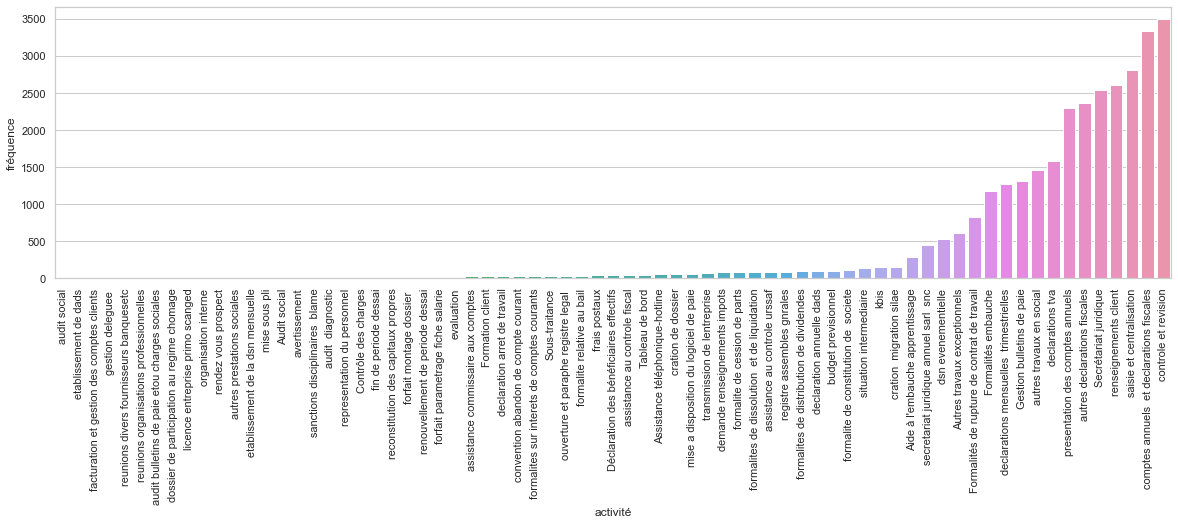

In [186]:
fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="activité", y="fréquence", data=df_act2017)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [187]:
activites_dict2018 = {element:freq for element in df.columns[46:166] for freq in df.iloc[:,46:166][element][(df.iloc[:,46:166][element] == 1) & (df['exercice'] == 2018)].value_counts()}

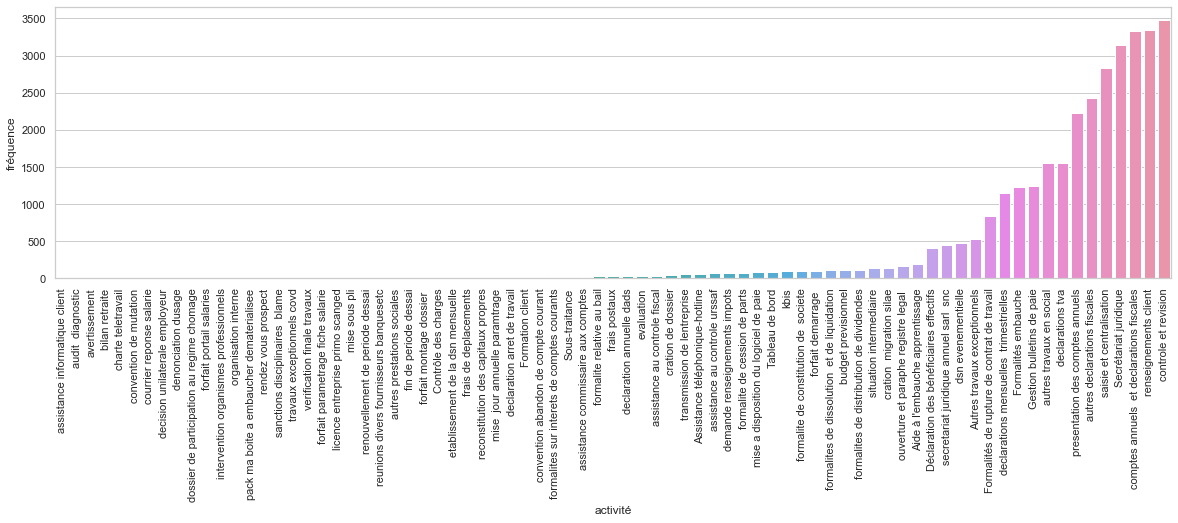

In [188]:
activites_2018_sorted = sorted(activites_dict2018.items(), key=operator.itemgetter(1))

df_act2018 = pd.DataFrame(activites_2018_sorted, columns=['activité', 'fréquence'])

fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="activité", y="fréquence", data=df_act2018)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [189]:
activites_dict2019 = {element:freq for element in df.columns[46:166] for freq in df.iloc[:,46:166][element][(df.iloc[:,46:166][element] == 1) & (df['exercice'] == 2019)].value_counts()}

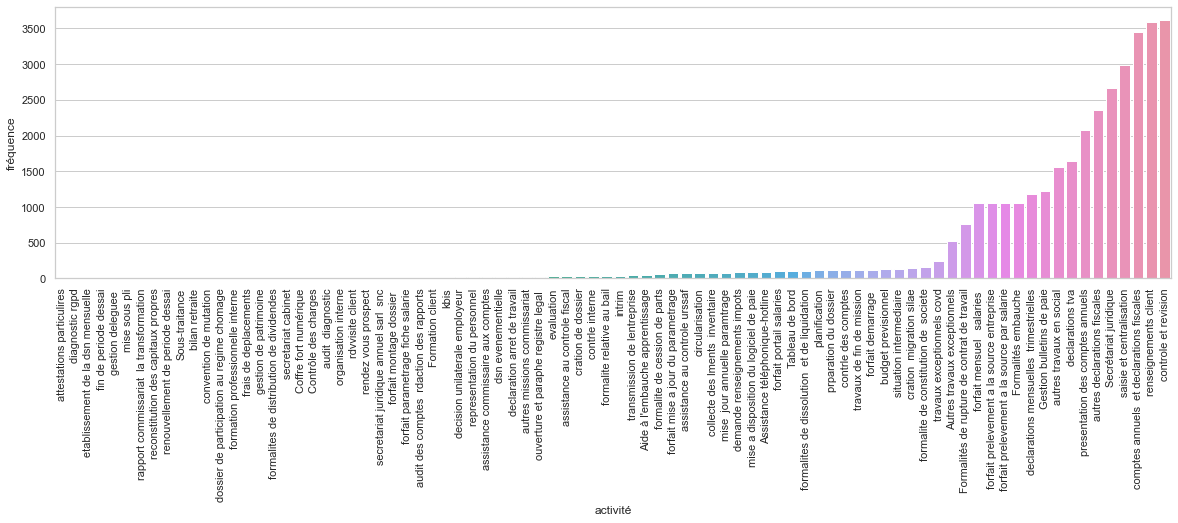

In [190]:
activites_2019_sorted = sorted(activites_dict2019.items(), key=operator.itemgetter(1))

df_act2019 = pd.DataFrame(activites_2019_sorted, columns=['activité', 'fréquence'])

fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="activité", y="fréquence", data=df_act2019)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [191]:
activites_dict2020 = {element:freq for element in df.columns[46:166] for freq in df.iloc[:,46:166][element][(df.iloc[:,46:166][element] == 1) & (df['exercice'] == 2020)].value_counts()}

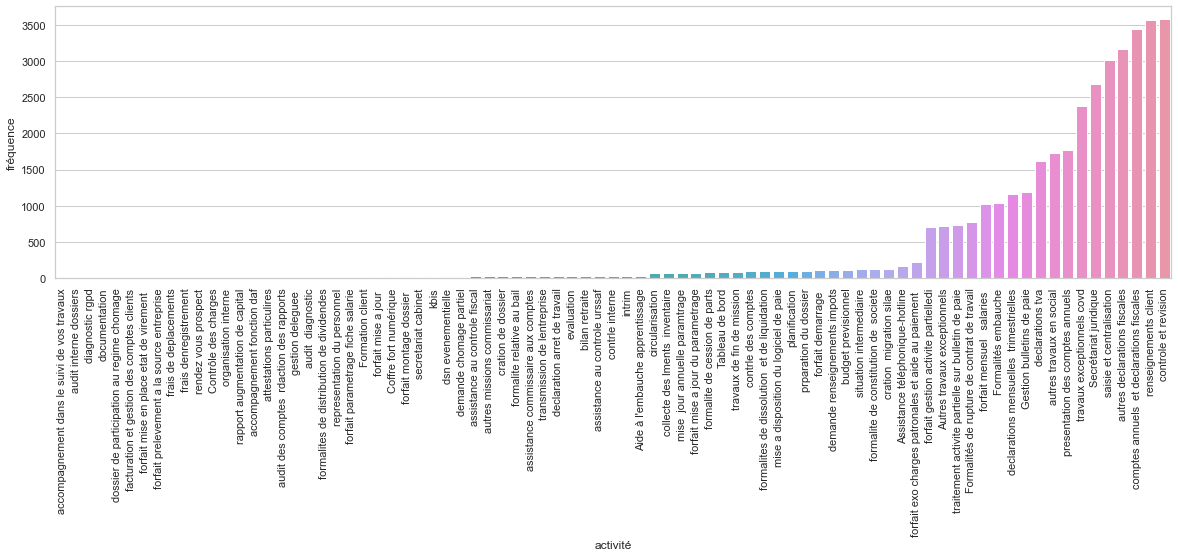

In [192]:
activites_2020_sorted = sorted(activites_dict2020.items(), key=operator.itemgetter(1))

df_act2020 = pd.DataFrame(activites_2020_sorted, columns=['activité', 'fréquence'])

fig=plt.figure(figsize=(20,5))
ax = sns.barplot(x="activité", y="fréquence", data=df_act2020)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

En 2020 apparaît l'activité "travaux exceptionnels covid" + gestion activité partielle

### Types de mission par année

In [193]:
df.head()

code_mission type_mission  exercice code_client  total_assistant  \
0  AAGS2017010396900          AGS      2017        5782              2.0   
1  AAGS2017010397000          AGS      2017        6565              1.0   
2  ACOM2017007712400          COM      2017        6635              4.0   
3  ACOM2017007718600          COM      2017        6718              1.0   
4  ACOM2017007719900          COM      2017        6720              3.0   

  manager                                       code_article  \
0     JOP                                            ['029']   
1     FRL                                            ['001']   
2     GSO  ['010', '012', '001', '016', '011', '019', '013']   
3     DAC                                     ['011', '013']   
4     VAL                ['016', '001', '011', '013', '019']   

                                     libelle_article  temps  \
0                           autres travaux en social  43.00   
1                              renseignements client   1.00   
2  saisie et centralisation, declarations tva, re...  22.75   
3  controle et revision, comptes annuels  et decl...   7.50   
4  autres declarations fiscales, renseignements c...  17.75   

   valorisation_temps  ... scm  scp  sdf  selarl selas sem  sep  snc  \
0             5231.25  ...   0    0    0       0     0   0    0    0   
1               68.00  ...   0    0    0       0     0   0    0    0   
2             1372.50  ...   0    0    0       0     0   0    0    0   
3              555.00  ...   0    0    0       0     0   0    0    0   
4             1168.75  ...   0    0    0       0     0   0    0    0   

   Boni-Mali  coût_horaire  
0    -681.25    121.656977  
1     682.00     68.000000  
2      57.50     60.329670  
3      -5.00     74.000000  
4     471.25     65.845070  

[5 rows x 199 columns]

In [194]:
df_annee = df.groupby(['exercice','type_mission']).count()#.reset_index(inplace=True)

In [195]:
df_annee.reset_index(inplace=True)

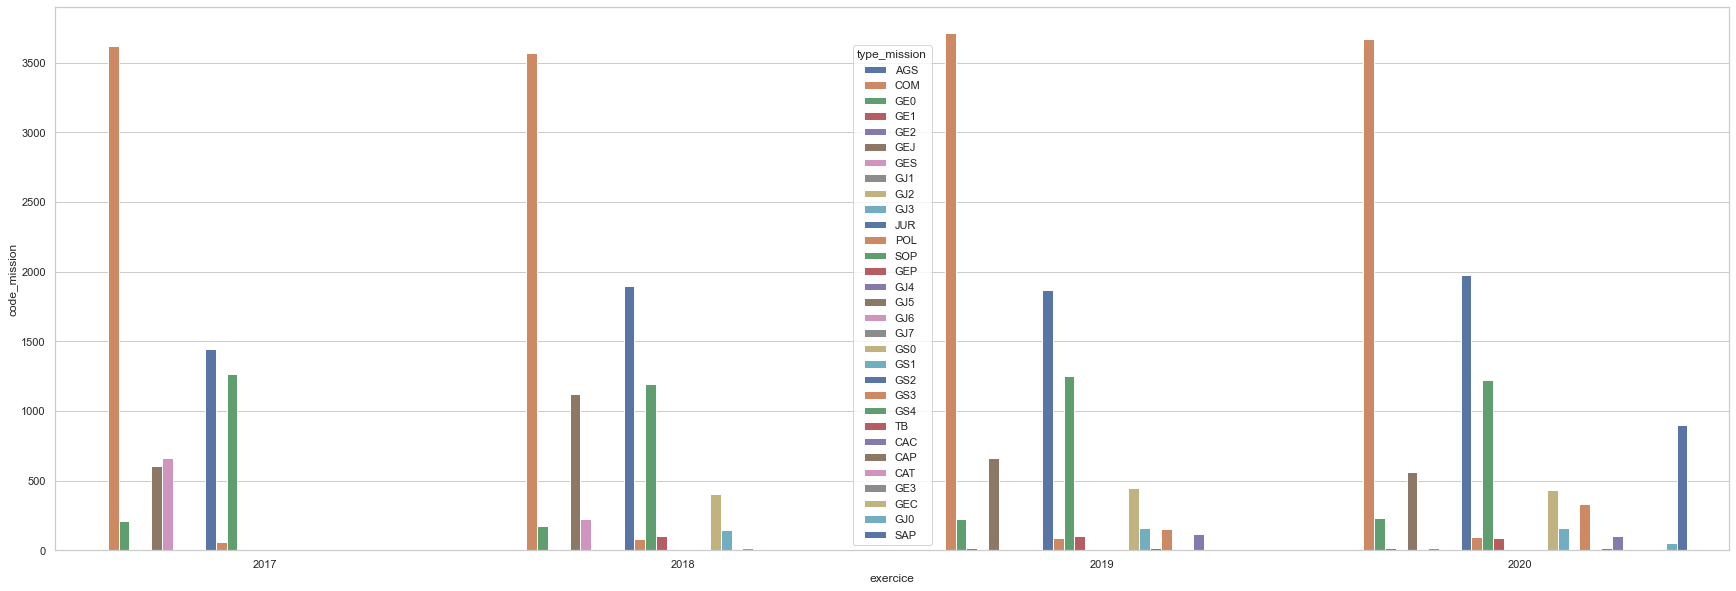

In [196]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='exercice',y='code_mission', hue='type_mission', data=df_annee, palette='deep')

- On remarque qu'il y a plus de missions exceptionnelles depuis 2019.
- Les missions comptables restent la majorité des missions du cabinet. Puis les missions juridiques, ainsi que les missions paie externalisée.
- Missions SAP depuis 2020
- Missions CAC depuis 2019
- Missions GES était très fréquente en 2017, et a complètement disparu en 2020

In [197]:
df_annee[df_annee['type_mission'] == 'COM']

exercice type_mission  code_mission  code_client  total_assistant  \
1       2017          COM          3616         3616             3616   
14      2018          COM          3571         3571             3571   
41      2019          COM          3715         3715             3715   
62      2020          COM          3667         3667             3667   

    manager  code_article  libelle_article  temps  valorisation_temps  ...  \
1      3616          3616             3616   3616                3616  ...   
14     3571          3571             3571   3571                3571  ...   
41     3715          3715             3715   3715                3715  ...   
62     3667          3667             3667   3667                3667  ...   

     scm   scp   sdf  selarl  selas   sem   sep   snc  Boni-Mali  coût_horaire  
1   3616  3616  3616    3616   3616  3616  3616  3616       3616          3616  
14  3571  3571  3571    3571   3571  3571  3571  3571       3571          3571  
41  3715  3715  3715    3715   3715  3715  3715  3715       3715          3715  
62  3667  3667  3667    3667   3667  3667  3667  3667       3667          3667  

[4 rows x 199 columns]

### Moyenne du chiffres d'affaires et du temps passé selon type de mission

In [198]:
df_facturation = df.groupby(['type_mission'])['temps','facturation'].mean()
df_facturation.reset_index(inplace=True)

<ipython-input-198-ef770b454a1d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_facturation = df.groupby(['type_mission'])['temps','facturation'].mean()


In [199]:
#df_facturation

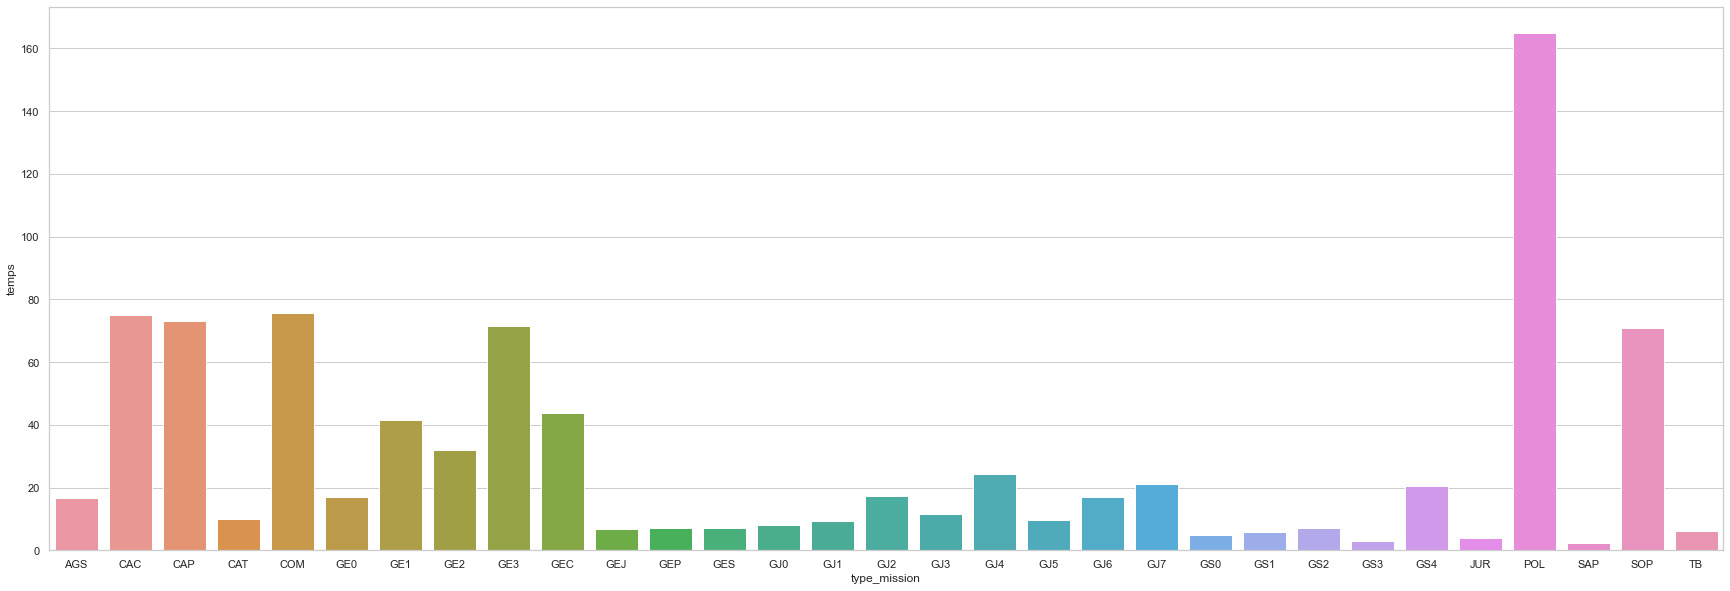

In [200]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='type_mission', y='temps', data=df_facturation)

Le temps passé moyen est clairement doublé sur des missions POL, de paie externalisée
Les missions exceptionnelles sont celles qui prennent le moins de temps en moyenne, nous pouvons supposer qu'il s'agisse de petites missions ciblées.

Médiane :

In [201]:
df_facturation_med = df.groupby(['type_mission'])['temps','facturation'].median()
df_facturation_med.reset_index(inplace=True)

<ipython-input-201-e6a0b3c9c003>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_facturation_med = df.groupby(['type_mission'])['temps','facturation'].median()


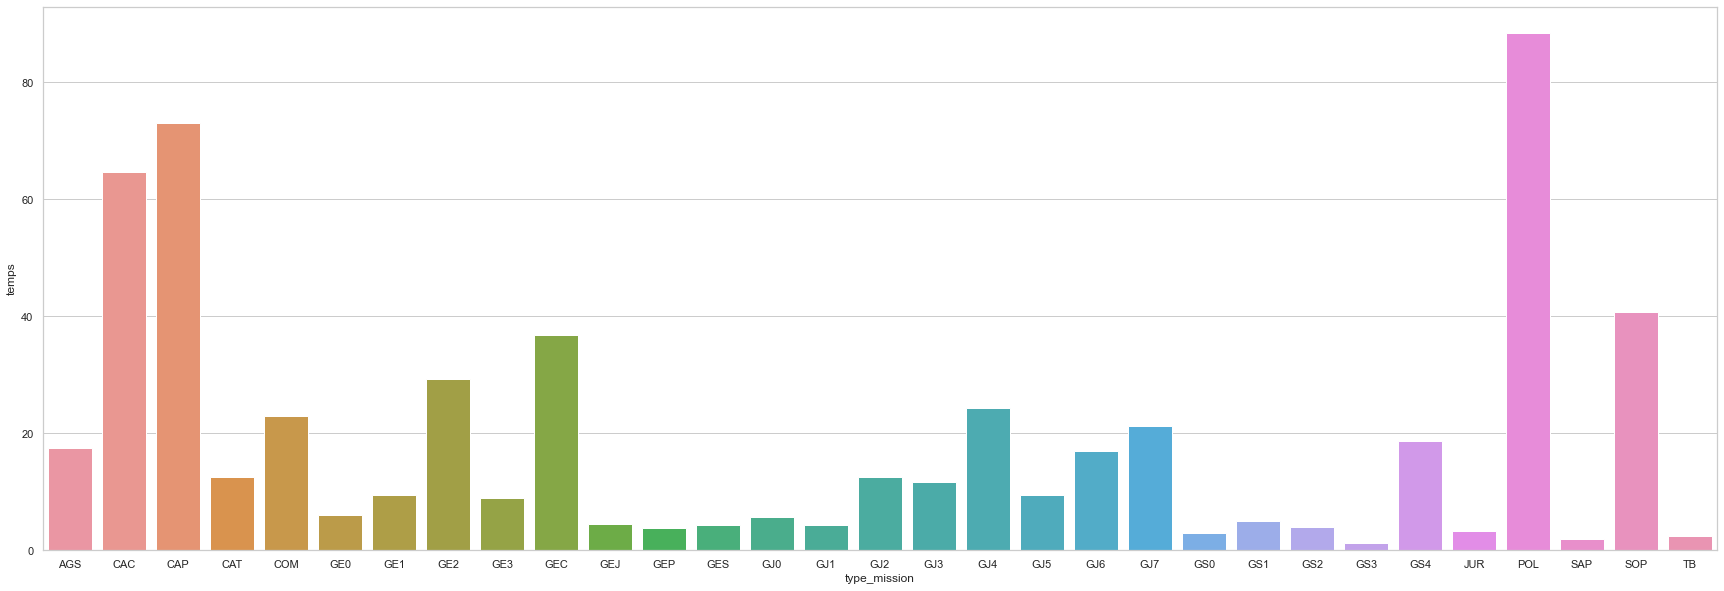

In [202]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='type_mission', y='temps', data=df_facturation_med)

Pour les missions POL, elles restent plus longues que les autres en revanche, il semble qu'il y ait eu des outlierssur le volume horaire dans notre dataset
Etonnament les missions juridiques 'JUR' sont faibles en temps

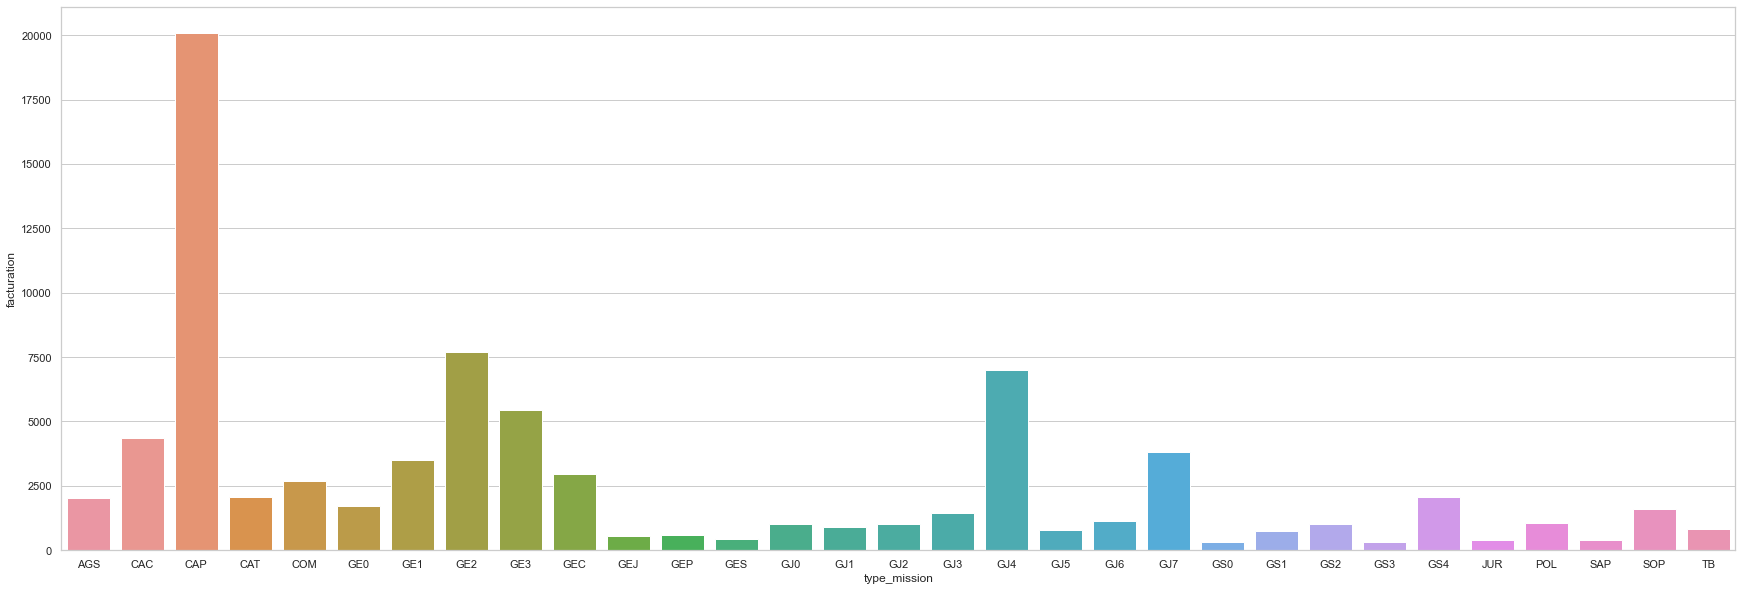

In [203]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='type_mission', y='facturation', data=df_facturation)

In [233]:
#Une seule mission est de type CAP, un outlier, cela fausse le graphique
df[df.type_mission == "CAP"]

code_mission type_mission  exercice code_client  total_assistant  \
16976  ACAP2019012735200          CAP      2019       50384              4.0   

      manager    code_article  \
16976     NAB  ['054', '059']   

                                         libelle_article  temps  \
16976  contrle des comptes, autres missions commissariat   73.0   

       valorisation_temps  ... scm  scp  sdf  selarl selas sem  sep  snc  \
16976              7885.0  ...   0    0    0       0     0   0    0    0   

       Boni-Mali  coût_horaire  
16976    12215.0    108.013699  

[1 rows x 199 columns]

Médiane :

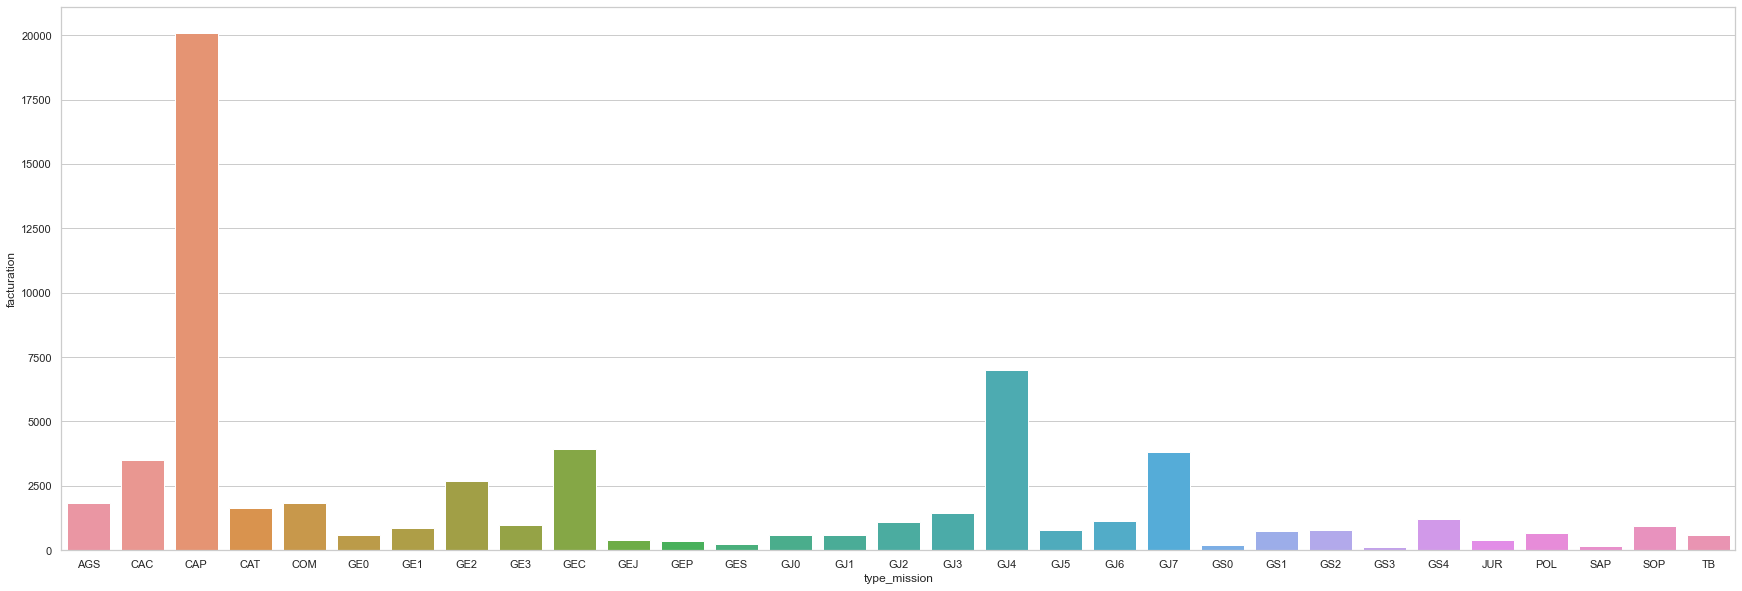

In [204]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='type_mission', y='facturation', data=df_facturation_med)

### Facturation et temps moyen selon la forme juridique du client

In [205]:
df_facturation_forme = df.groupby(['forme'])['temps','facturation'].mean()
df_facturation_forme.reset_index(inplace=True)

<ipython-input-205-9785675d52be>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_facturation_forme = df.groupby(['forme'])['temps','facturation'].mean()


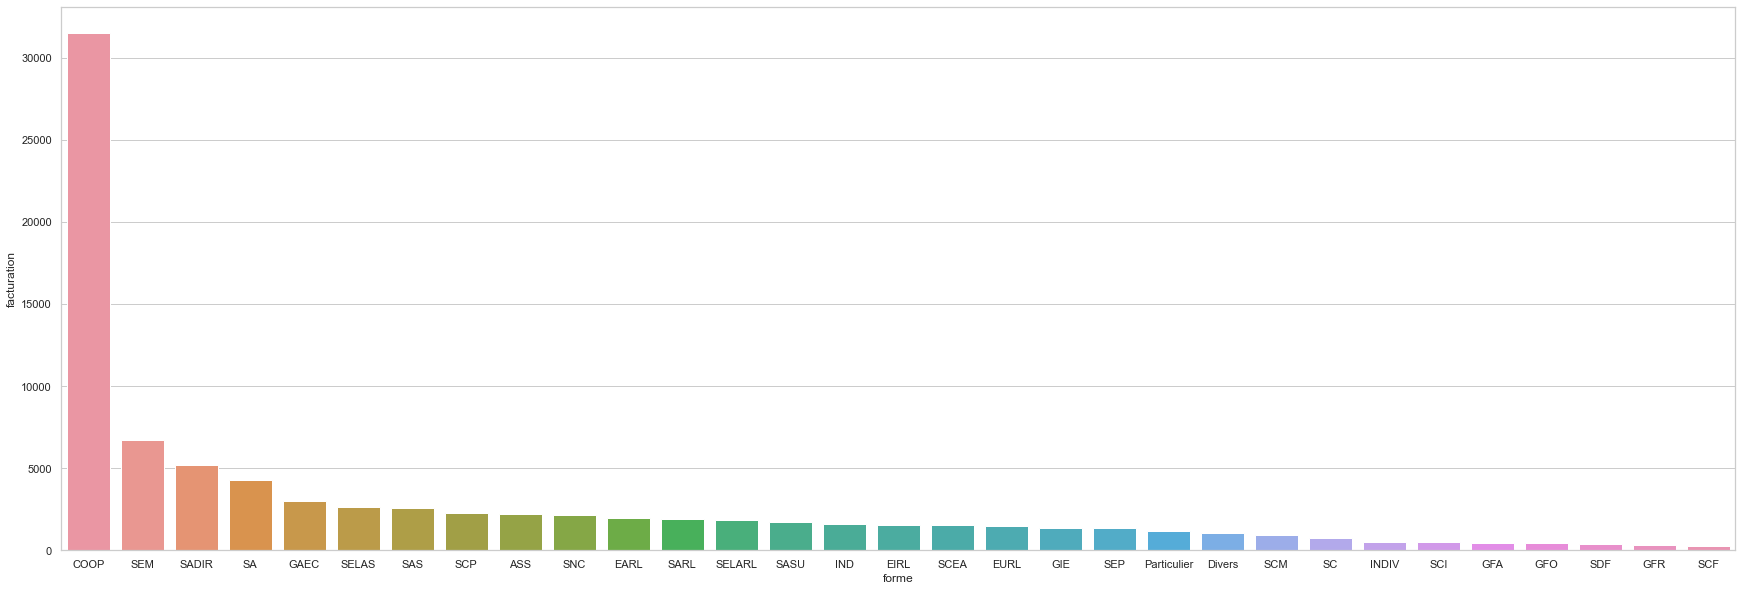

In [206]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='forme', y='facturation', data=df_facturation_forme.sort_values(by='facturation', ascending=False))

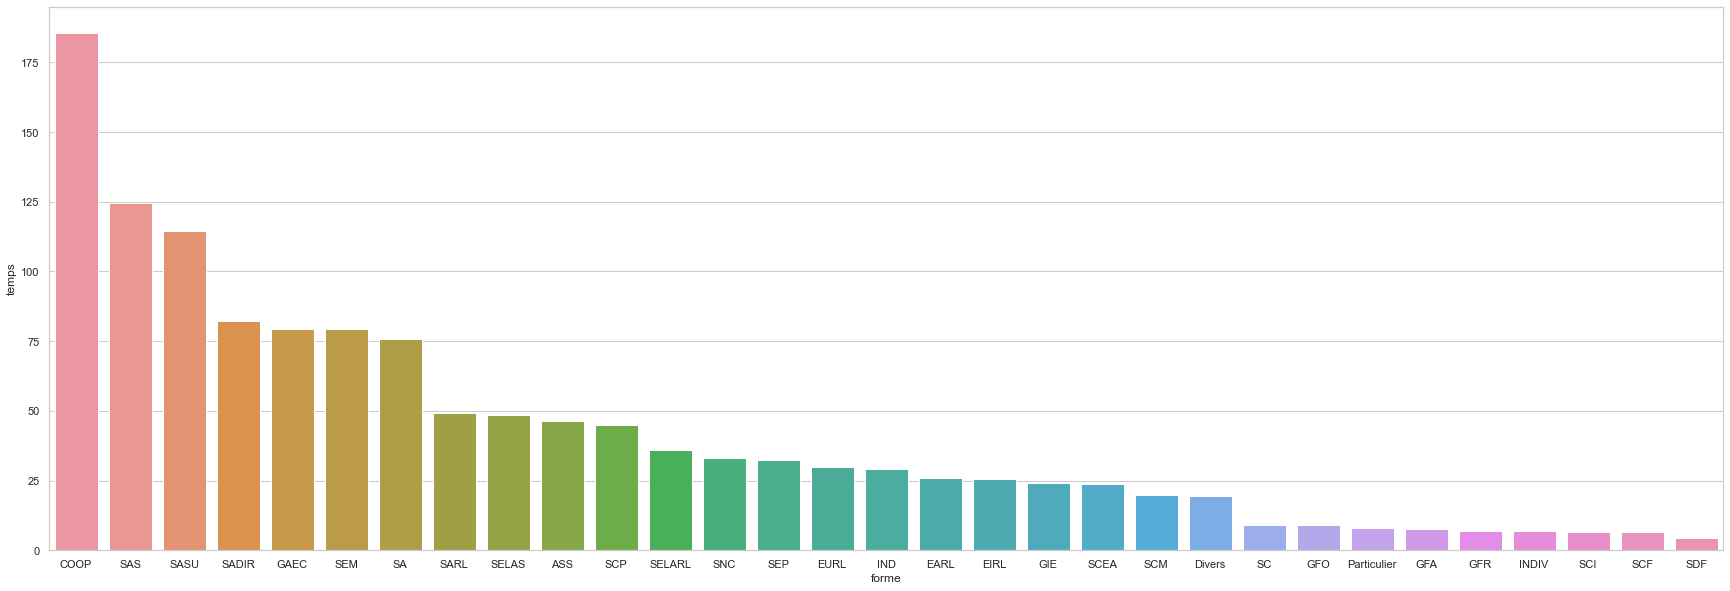

In [207]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='forme', y='temps', data=df_facturation_forme.sort_values(by='temps', ascending=False))

- SAS et SASU = ces formes juridiques prennent beaucoup de temps, mais rapportent peu en chiffre d'affaires
- COOP = c'est un outlier, une coopérative agricole, 1 seul client.

In [208]:
df[df['forme'] == "COOP"]

code_mission type_mission  exercice code_client  total_assistant  \
305    ACOM2017008226500          COM      2017       10425              5.0   
8199   ACOM2018008773500          COM      2018       10425              5.0   
17431  ACOM2019009779800          COM      2019       10425              5.0   
26324  ACOM2020011093400          COM      2020       10425              2.0   

      manager                                       code_article  \
305       JOP  ['011', '001', '019', '018', '016', '013', '060']   
8199      JOP  ['011', '001', '016', '019', '060', '013', '01...   
17431     JOP  ['001', '013', '011', '060', '018', '016', '01...   
26324     JOP  ['011', '001', '019', '060', '018', '049', '01...   

                                         libelle_article   temps  \
305    controle et revision, renseignements client, p...  200.75   
8199   controle et revision, renseignements client, a...  196.75   
17431  renseignements client, comptes annuels  et dec...  189.00   
26324  controle et revision, renseignements client, p...  156.25   

       valorisation_temps  ... scm  scp  sdf  selarl selas sem  sep  snc  \
305              20327.50  ...   0    0    0       0     0   0    0    0   
8199             20099.00  ...   0    0    0       0     0   0    0    0   
17431            21193.50  ...   0    0    0       0     0   0    0    0   
26324            22266.39  ...   0    0    0       0     0   0    0    0   

       Boni-Mali  coût_horaire  
305      9812.50    101.257783  
8199    10951.01    102.155019  
17431   10786.50    112.134921  
26324   10673.61    142.504896  

[4 rows x 199 columns]

### Analyser la facturation et le temps passé en fonction de la forme juridique du client et du type de mission

In [209]:
df_facturation_formetype = df.groupby(['type_mission','forme'])['temps','facturation'].mean()
df_facturation_formetype.reset_index(inplace=True)

<ipython-input-209-26e6319412fe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_facturation_formetype = df.groupby(['type_mission','forme'])['temps','facturation'].mean()


In [210]:
df_facturation_formetype

type_mission        forme      temps  facturation
0            AGS         EURL   6.125000   975.000000
1            AGS          SAS  27.500000  3100.000000
2            CAC          ASS  67.002182  2799.414909
3            CAC         EURL  63.825000  3561.880000
4            CAC  Particulier  96.625000  7805.825000
..           ...          ...        ...          ...
289           TB         EURL   4.350000   391.000000
290           TB         SARL  13.175000  1567.500000
291           TB          SAS   3.750000   595.833333
292           TB         SASU   5.450000  1011.658333
293           TB       SELARL  10.500000   660.000000

[294 rows x 4 columns]

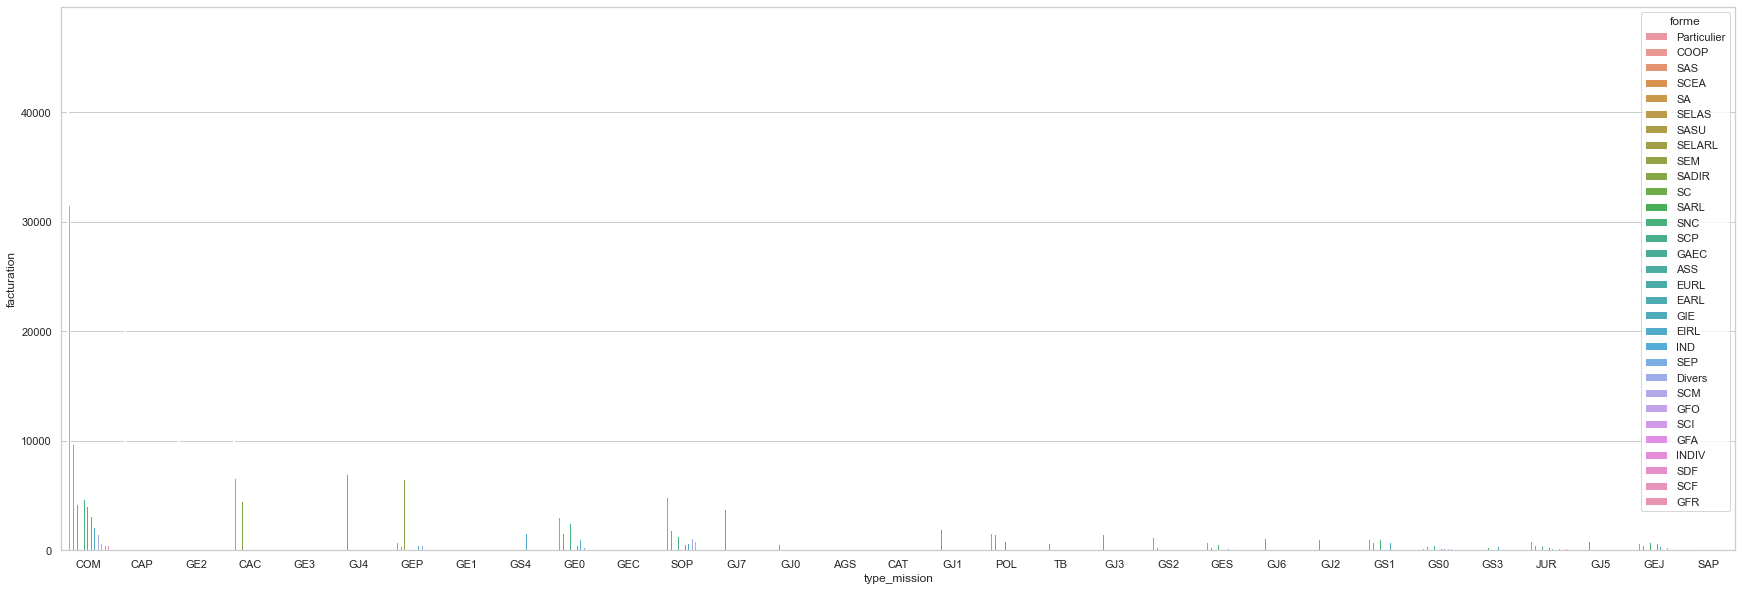

In [211]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='type_mission', y='facturation', hue='forme', data=df_facturation_formetype.sort_values(by='facturation', ascending=False))

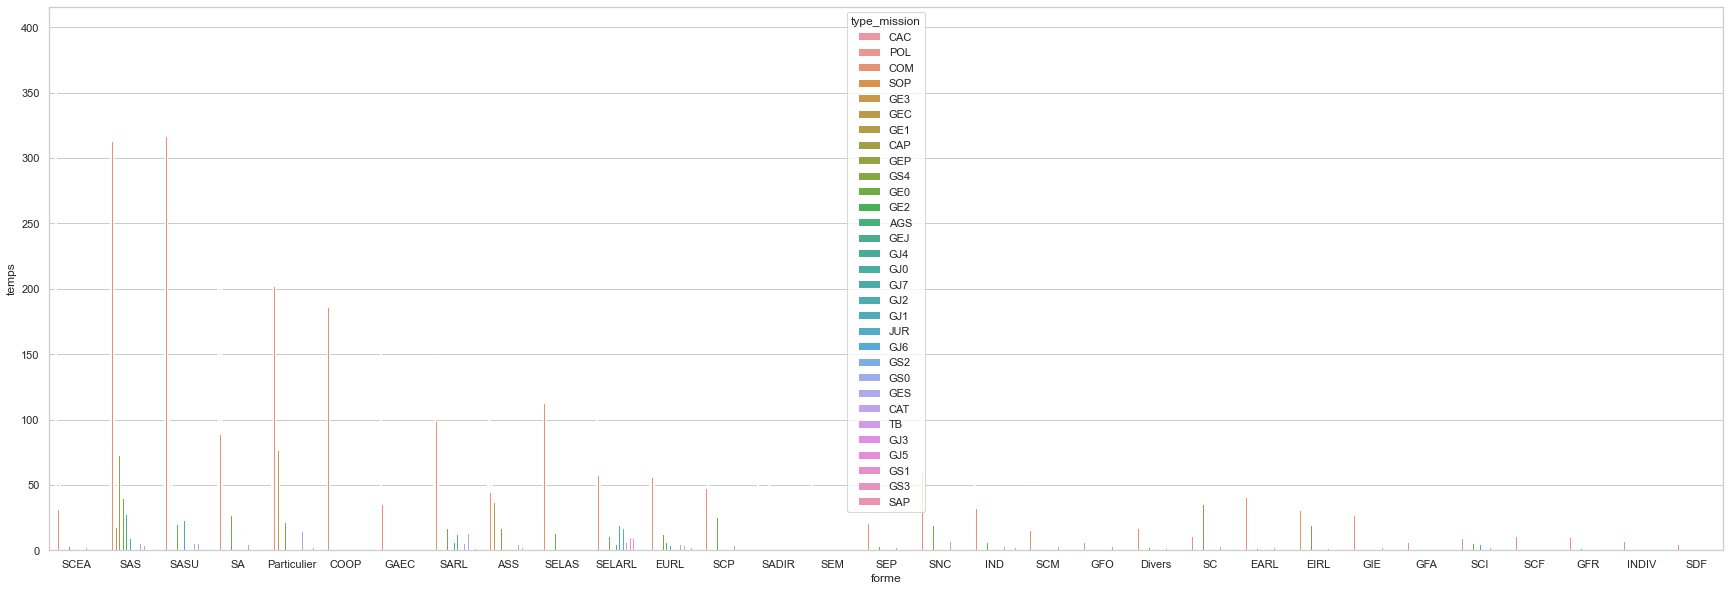

In [212]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='forme', y='temps', hue='type_mission', data=df_facturation_formetype.sort_values(by='temps', ascending=False))

### Analyse de la facturation et le temps passé moyens sur chaque site du cabinet

In [213]:
df_sites = df.groupby(['site'])['temps','facturation'].mean()
df_sites.reset_index(inplace=True)

<ipython-input-213-3d1505218aac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sites = df.groupby(['site'])['temps','facturation'].mean()


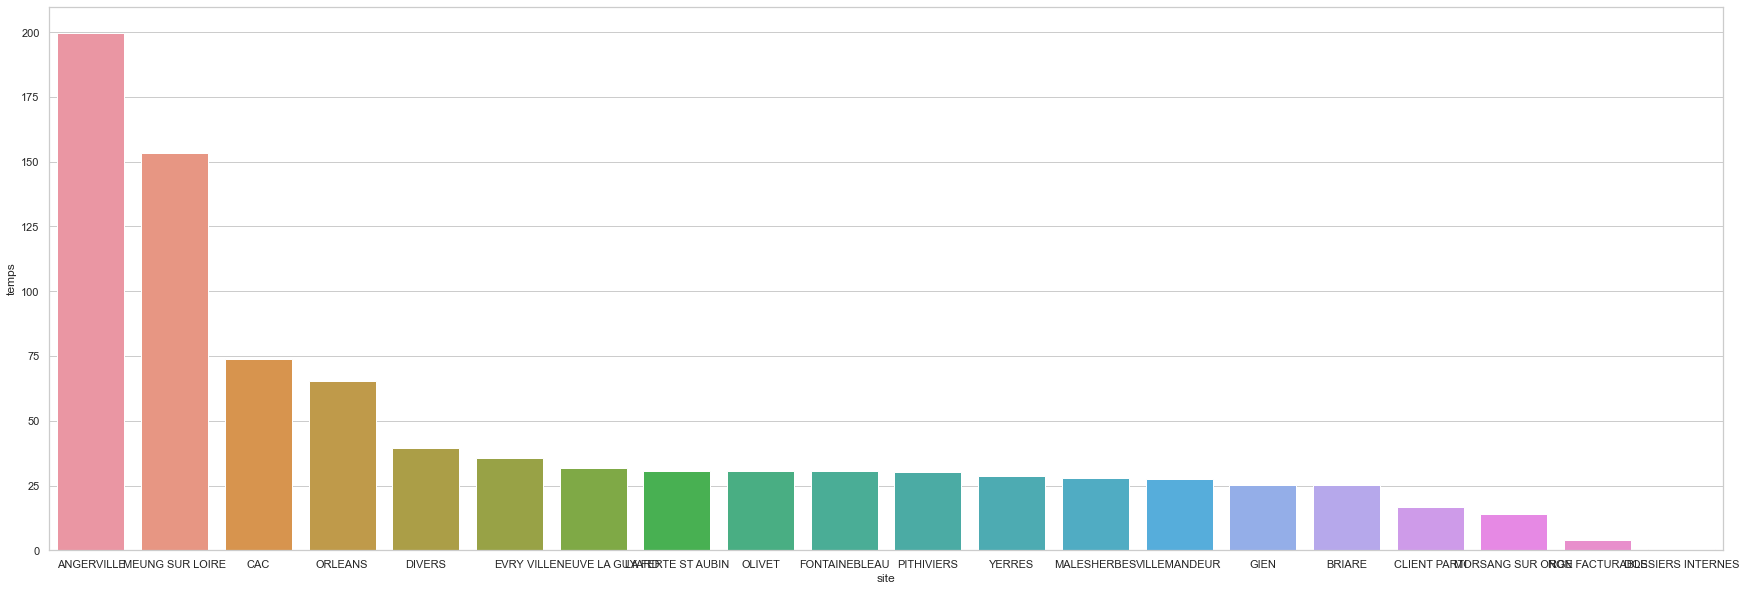

In [214]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='site', y='temps', data=df_sites.sort_values(by='temps', ascending=False))

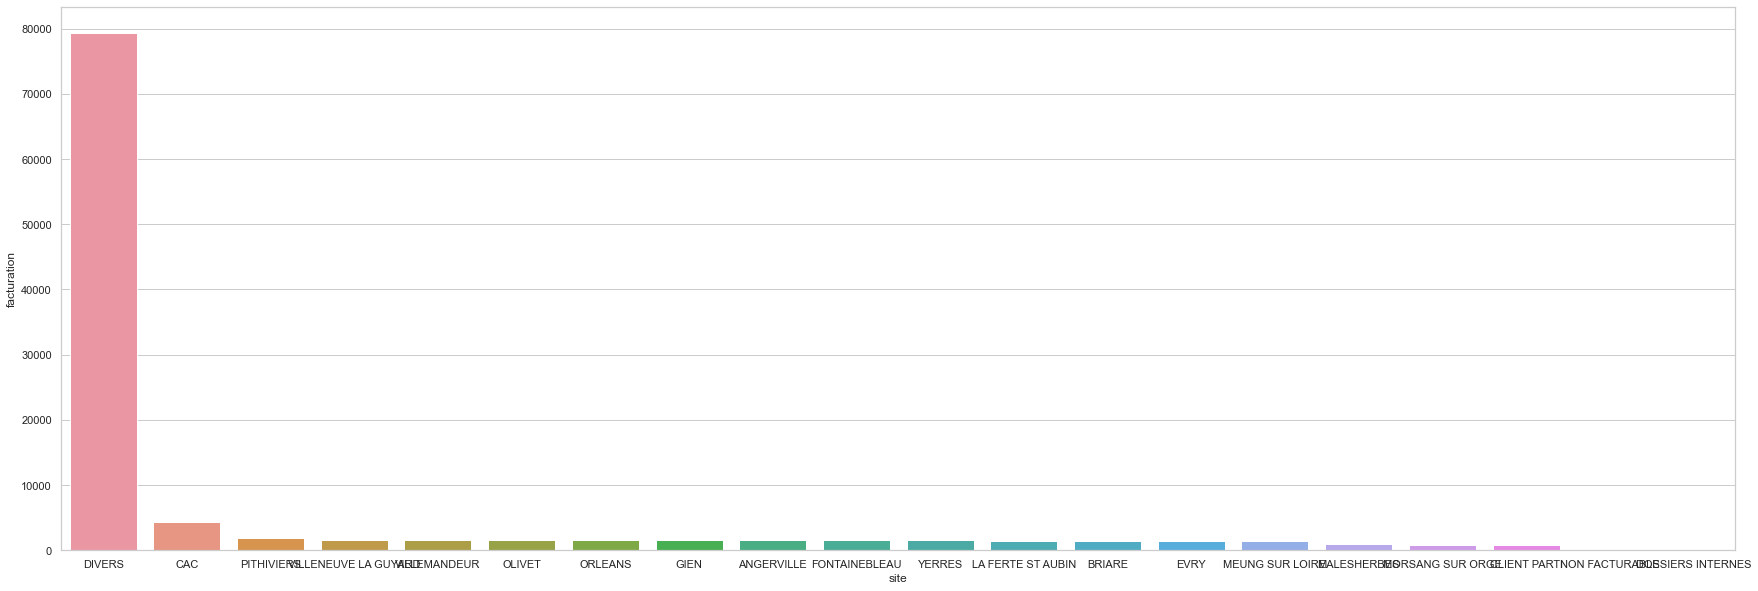

In [215]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='site', y='facturation', data=df_sites.sort_values(by='facturation', ascending=False))

In [216]:
df_sites[df_sites['site'] == 'DIVERS'].index

Int64Index([4], dtype='int64')

In [217]:
#Supprimer cet outlier
df_sites_sansdivers = df_sites.drop(4, axis=0)

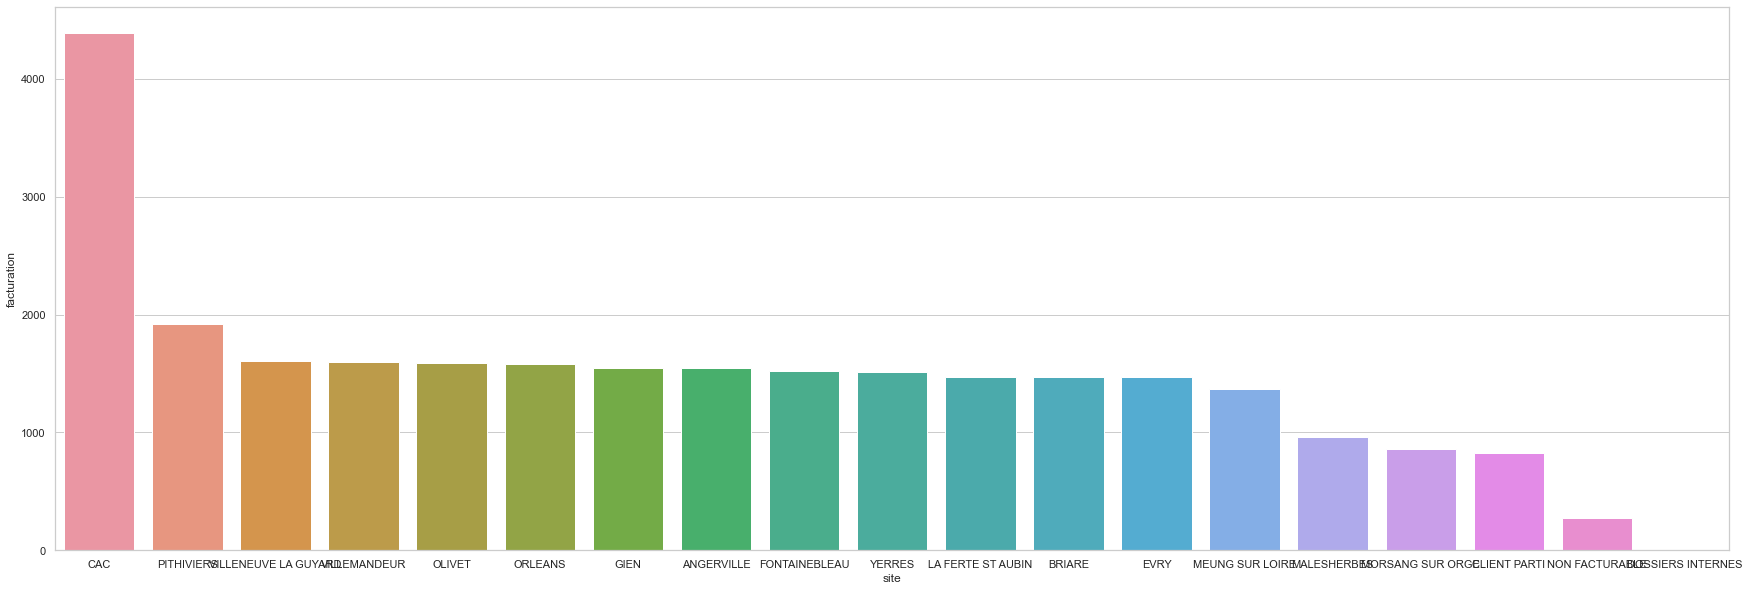

In [218]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='site', y='facturation', data=df_sites_sansdivers.sort_values(by='facturation', ascending=False))

Les sites ayant le chiffre d'affaires moyen le plus important depuis 2017 sont :
- Commissaires aux comptes
- Pithiviers
- Evry
- Olivet

In [219]:
df_sites_sum = df.groupby(['site'])['temps','facturation'].sum()
df_sites_sum.reset_index(inplace=True)

<ipython-input-219-f3047b5de9c6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sites_sum = df.groupby(['site'])['temps','facturation'].sum()


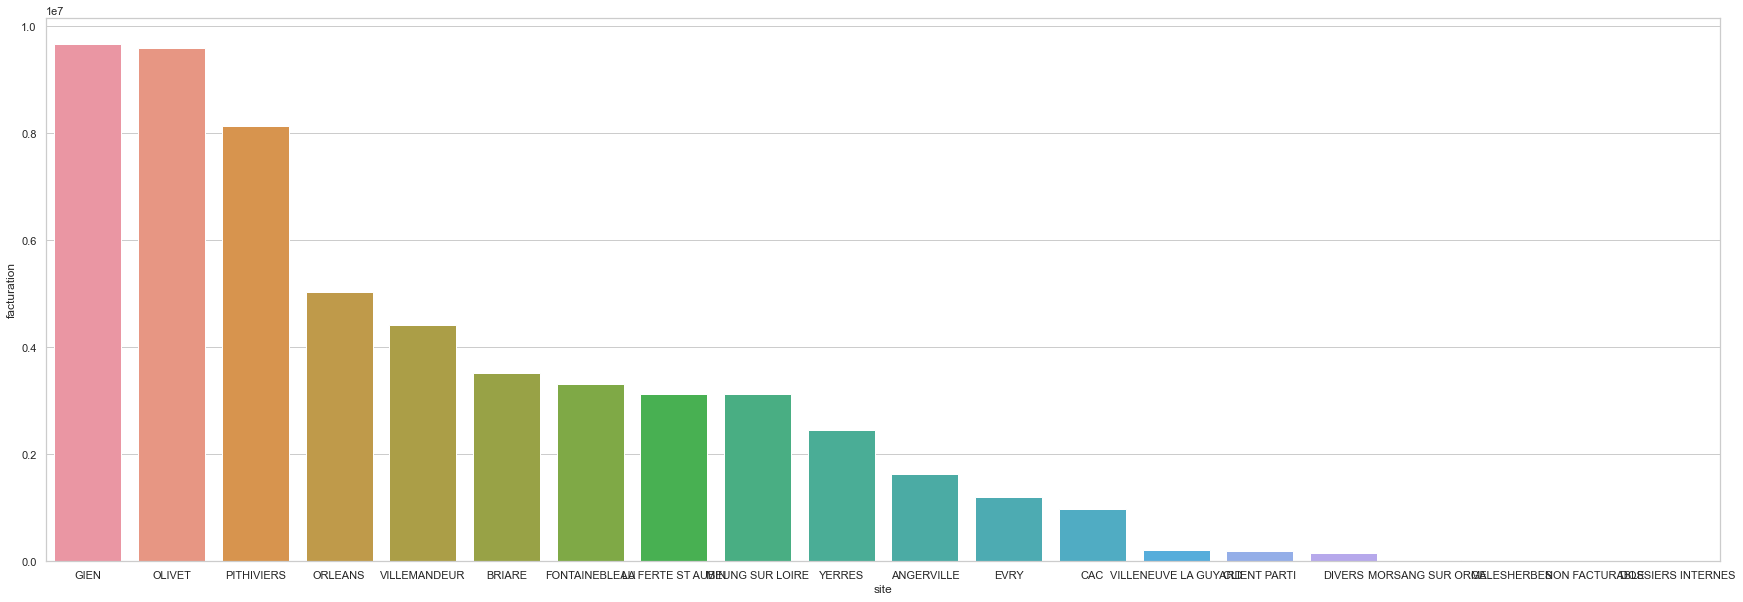

In [220]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='site', y='facturation', data=df_sites_sum.sort_values(by='facturation', ascending=False))

Les sites ayant le chiffre d'affaires total le plus important depuis 2017 sont :
- OLIVET
- GIEN
- PITHIVIERS
- ORLEANS

In [221]:
df_sites_annee = df.groupby(['exercice','site']).count()

In [222]:
df_sites_annee.reset_index(inplace=True)

In [223]:
def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

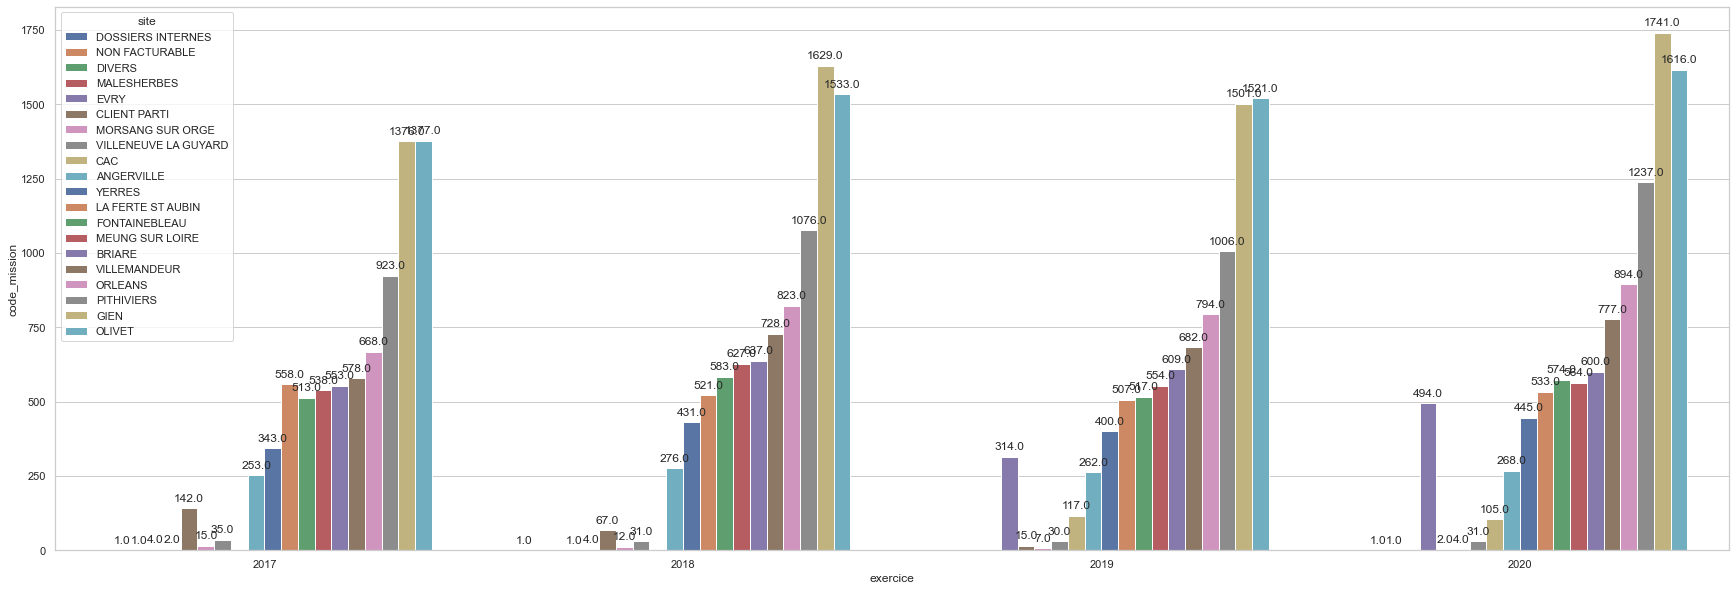

In [224]:
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='exercice', y='code_mission', hue='site', data=df_sites_annee.sort_values(by='code_mission'), palette='deep')
add_value_labels(ax)

En 2020, les sites qui ont eu le plus de missions sont :
- GIEN (vert)
- OLIVET (bleu)
- PITHIVIERS (gris)
- ORLEANS (rose)
- VILLEMANDEUR (marron)

### Analyse de la facturation et du temps par secteur de la clientèle

In [225]:
df_secteurs_sum = df.groupby(['secteur'])['temps','facturation'].sum()
df_secteurs_sum.reset_index(inplace=True)

<ipython-input-225-184af73e83df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_secteurs_sum = df.groupby(['secteur'])['temps','facturation'].sum()


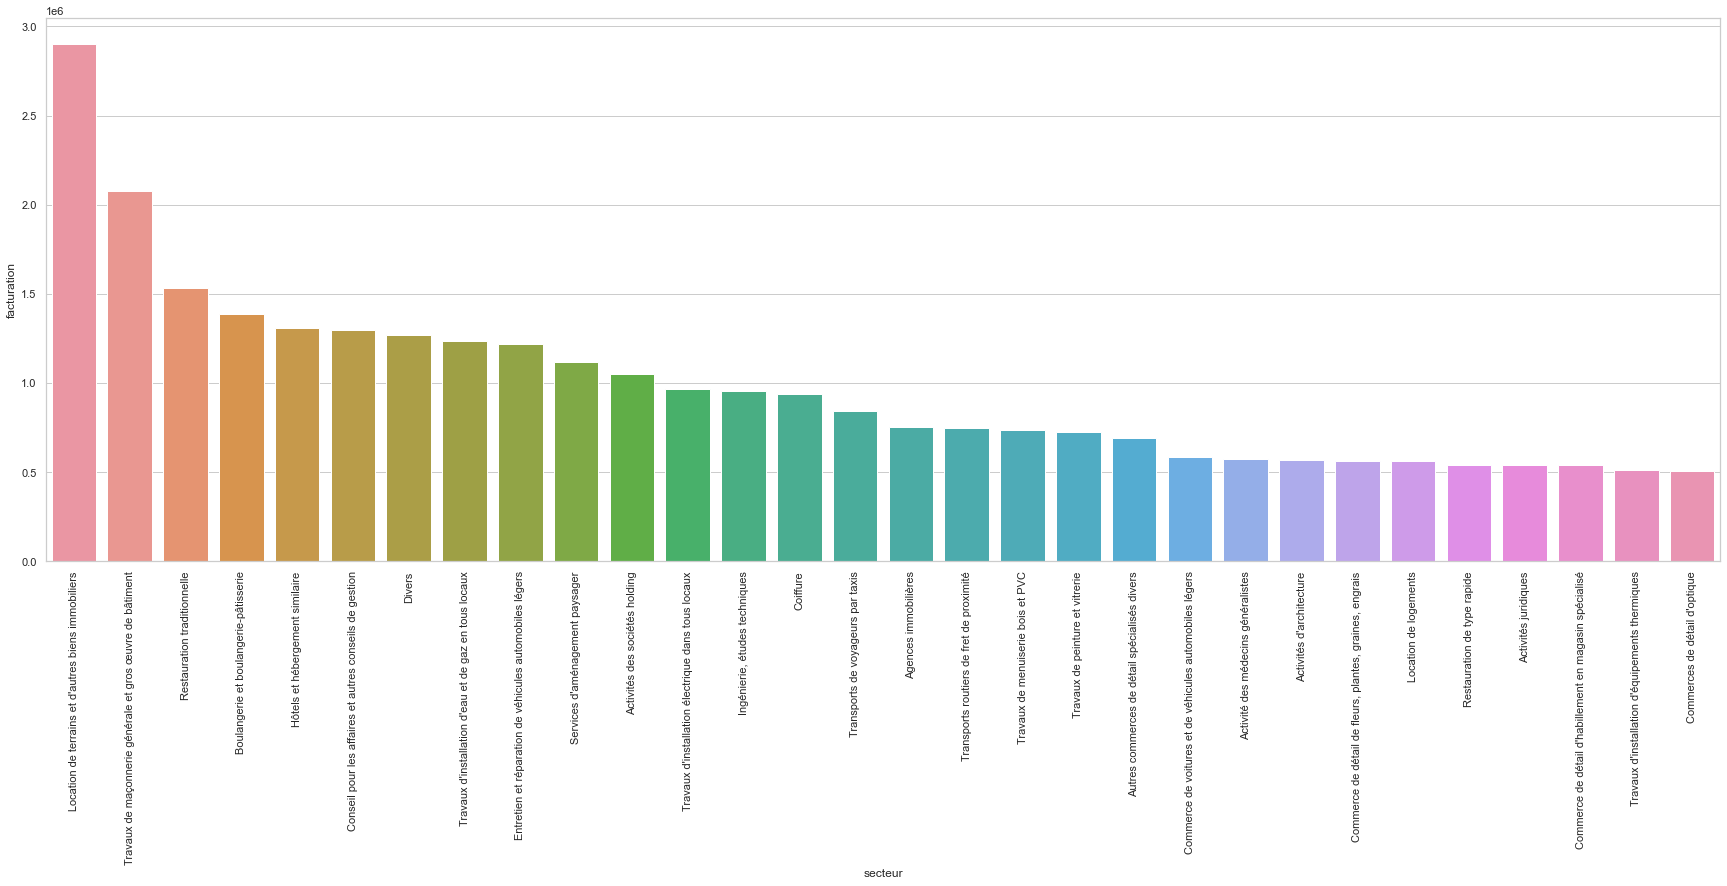

In [226]:
#les 30 secteurs qui rapportent le plus de chiffre d'affaires
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='secteur', y='facturation', data=df_secteurs_sum.sort_values(by='facturation', ascending=False).head(30))
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

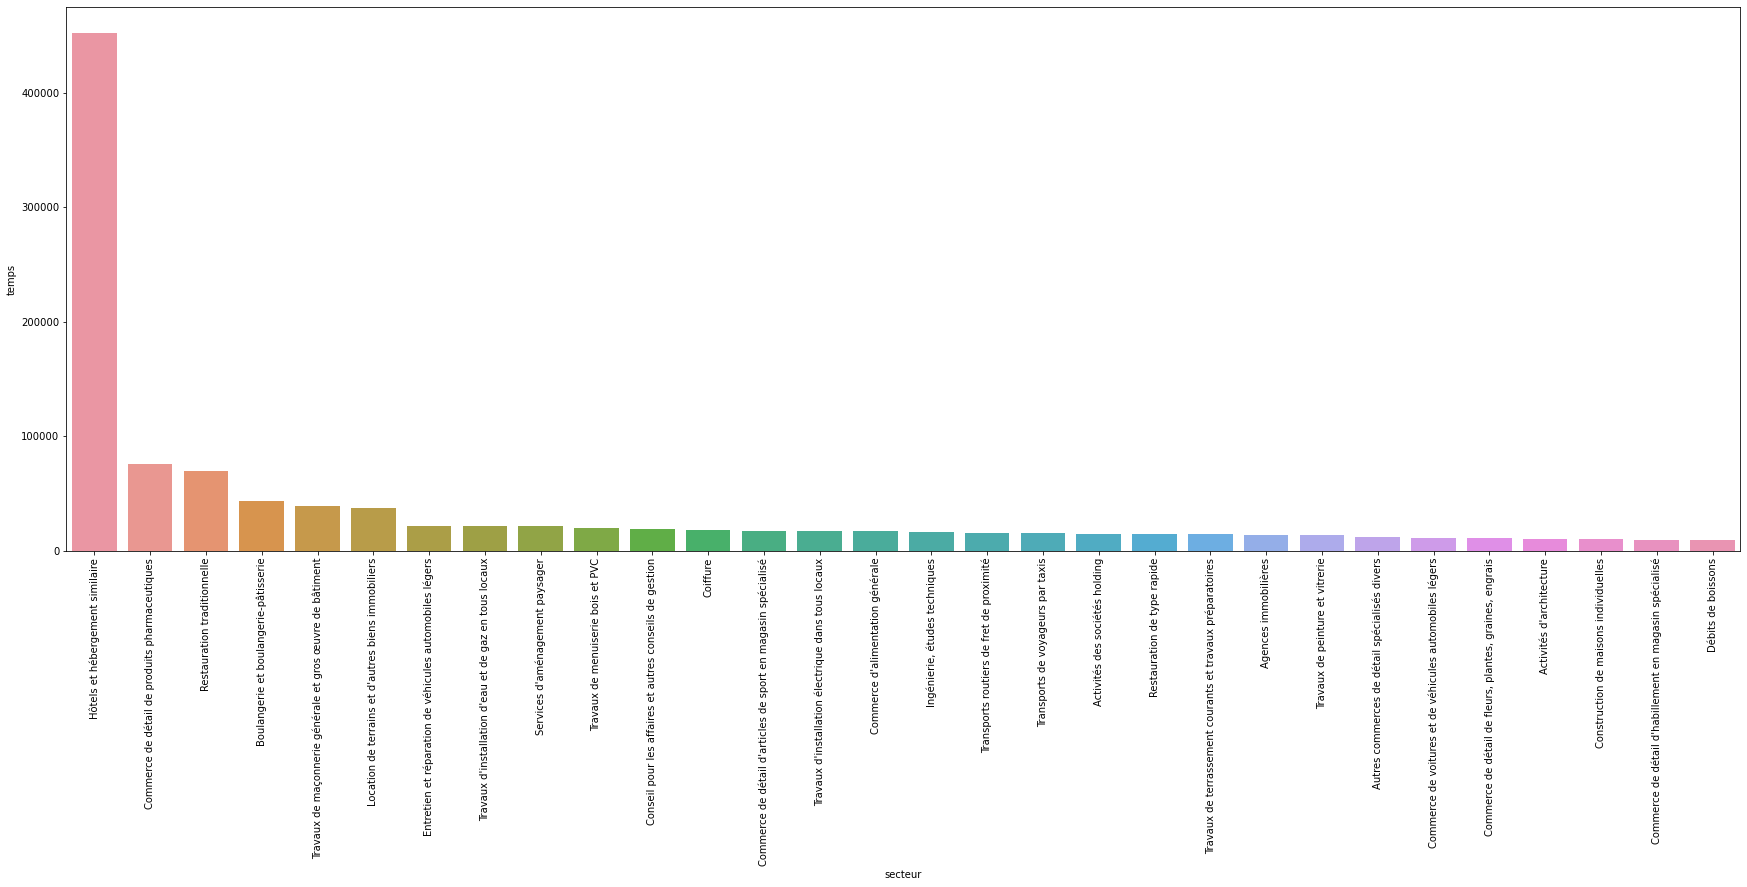

In [56]:
#les 30 secteurs qui ont coûté le plus de temps
fig=plt.figure(figsize=(30,10))
ax = sns.barplot(x='secteur', y='temps', data=df_secteurs_sum.sort_values(by='temps', ascending=False).head(30))
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)